## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['LN_GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,LN_GS_cub_m
0,3.78
1,5.54
2,5.25
3,5.63
4,4.96


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9664948693965014, 0.9719301140972785, 0.9773549986802951]
    Mean: 0.972
    Std: 0.004

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.12050364 0.13824405 0.16027335]
    Mean: 0.140
    Std: 0.016

 --------------------
Mean absolute error (MAE): 

    Scores: [0.08661024747194945, 0.08685489296079513, 0.08826865309999701]
    Mean: 0.087
    Std: 0.001

 --------------------


# Add optimal hyperparameters for XGBoost model

In [14]:
# Hyperparameters data for the next step/stage
p1 = 0.8821030853351247                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.011864622396297486               # gamma
print('Gamma: ' + str(p2))

p3 = 0.1209976158148326                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 178         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.5339951896800694                 # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8821030853351247
Gamma: 0.011864622396297486
Learning_rate: 0.1209976158148326
Max_depth: 4
N_estimators: 178
Subsample: 0.5339951896800694


# Estimation of predictive quality to basic XGBoost models using Loops

In [15]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [16]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.17717	validation_1-rmse:4.18507
[1]	validation_0-rmse:3.68140	validation_1-rmse:3.69277
[2]	validation_0-rmse:3.24436	validation_1-rmse:3.25516
[3]	validation_0-rmse:2.85973	validation_1-rmse:2.87036
[4]	validation_0-rmse:2.52254	validation_1-rmse:2.52990
[5]	validation_0-rmse:2.22430	validation_1-rmse:2.22952
[6]	validation_0-rmse:1.96119	validation_1-rmse:1.96563
[7]	validation_0-rmse:1.73090	validation_1-rmse:1.73573
[8]	validation_0-rmse:1.52731	validation_1-rmse:1.53377
[9]	validation_0-rmse:1.34759	validation_1-rmse:1.35425
[10]	validation_0-rmse:1.18957	validation_1-rmse:1.19442
[11]	validation_0-rmse:1.05097	validation_1-rmse:1.05569


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.92879	validation_1-rmse:0.93480
[13]	validation_0-rmse:0.82146	validation_1-rmse:0.82753
[14]	validation_0-rmse:0.72814	validation_1-rmse:0.73280
[15]	validation_0-rmse:0.64480	validation_1-rmse:0.64890
[16]	validation_0-rmse:0.57118	validation_1-rmse:0.57794
[17]	validation_0-rmse:0.50715	validation_1-rmse:0.51335
[18]	validation_0-rmse:0.45120	validation_1-rmse:0.45754
[19]	validation_0-rmse:0.40160	validation_1-rmse:0.40779
[20]	validation_0-rmse:0.35818	validation_1-rmse:0.36548
[21]	validation_0-rmse:0.32158	validation_1-rmse:0.32905
[22]	validation_0-rmse:0.28845	validation_1-rmse:0.29636
[23]	validation_0-rmse:0.26031	validation_1-rmse:0.26791
[24]	validation_0-rmse:0.23604	validation_1-rmse:0.24443
[25]	validation_0-rmse:0.21460	validation_1-rmse:0.22481
[26]	validation_0-rmse:0.19666	validation_1-rmse:0.20757
[27]	validation_0-rmse:0.18080	validation_1-rmse:0.19256
[28]	validation_0-rmse:0.16783	validation_1-rmse:0.18114
[29]	validation_0-rmse:0.15733	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18884	validation_1-rmse:4.12135
[1]	validation_0-rmse:3.68978	validation_1-rmse:3.62987


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24919	validation_1-rmse:3.19562
[3]	validation_0-rmse:2.86018	validation_1-rmse:2.81168
[4]	validation_0-rmse:2.52123	validation_1-rmse:2.47549
[5]	validation_0-rmse:2.22199	validation_1-rmse:2.18033
[6]	validation_0-rmse:1.95954	validation_1-rmse:1.91823
[7]	validation_0-rmse:1.72818	validation_1-rmse:1.68772
[8]	validation_0-rmse:1.52626	validation_1-rmse:1.48856
[9]	validation_0-rmse:1.34679	validation_1-rmse:1.30904
[10]	validation_0-rmse:1.18829	validation_1-rmse:1.15620
[11]	validation_0-rmse:1.04957	validation_1-rmse:1.02200
[12]	validation_0-rmse:0.92636	validation_1-rmse:0.90085
[13]	validation_0-rmse:0.81909	validation_1-rmse:0.79595
[14]	validation_0-rmse:0.72543	validation_1-rmse:0.70351
[15]	validation_0-rmse:0.64223	validation_1-rmse:0.62416
[16]	validation_0-rmse:0.57025	validation_1-rmse:0.55218
[17]	validation_0-rmse:0.50634	validation_1-rmse:0.49096
[18]	validation_0-rmse:0.45053	validation_1-rmse:0.43816
[19]	validation_0-rmse:0.40209	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17551	validation_1-rmse:4.19196
[1]	validation_0-rmse:3.67814	validation_1-rmse:3.69280
[2]	validation_0-rmse:3.24214	validation_1-rmse:3.25748
[3]	validation_0-rmse:2.85717	validation_1-rmse:2.87194
[4]	validation_0-rmse:2.51867	validation_1-rmse:2.53593
[5]	validation_0-rmse:2.21932	validation_1-rmse:2.23813
[6]	validation_0-rmse:1.95474	validation_1-rmse:1.97185
[7]	validation_0-rmse:1.72330	validation_1-rmse:1.73891


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51936	validation_1-rmse:1.53300
[9]	validation_0-rmse:1.34203	validation_1-rmse:1.35776
[10]	validation_0-rmse:1.18430	validation_1-rmse:1.20050
[11]	validation_0-rmse:1.04500	validation_1-rmse:1.06060
[12]	validation_0-rmse:0.92432	validation_1-rmse:0.93937
[13]	validation_0-rmse:0.81723	validation_1-rmse:0.83428
[14]	validation_0-rmse:0.72356	validation_1-rmse:0.74125
[15]	validation_0-rmse:0.64019	validation_1-rmse:0.65894
[16]	validation_0-rmse:0.56654	validation_1-rmse:0.58734
[17]	validation_0-rmse:0.50391	validation_1-rmse:0.52720
[18]	validation_0-rmse:0.44912	validation_1-rmse:0.47435
[19]	validation_0-rmse:0.40058	validation_1-rmse:0.42736
[20]	validation_0-rmse:0.35777	validation_1-rmse:0.38714
[21]	validation_0-rmse:0.32014	validation_1-rmse:0.35270
[22]	validation_0-rmse:0.28814	validation_1-rmse:0.32375
[23]	validation_0-rmse:0.26089	validation_1-rmse:0.29813
[24]	validation_0-rmse:0.23695	validation_1-rmse:0.27704
[25]	validation_0-rmse:0.21511	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18357	validation_1-rmse:4.13574
[1]	validation_0-rmse:3.68679	validation_1-rmse:3.64015
[2]	validation_0-rmse:3.24823	validation_1-rmse:3.20503
[3]	validation_0-rmse:2.86290	validation_1-rmse:2.81762
[4]	validation_0-rmse:2.52203	validation_1-rmse:2.48300
[5]	validation_0-rmse:2.22298	validation_1-rmse:2.18525
[6]	validation_0-rmse:1.95768	validation_1-rmse:1.92483
[7]	validation_0-rmse:1.72838	validation_1-rmse:1.69829
[8]	validation_0-rmse:1.52406	validation_1-rmse:1.49502
[9]	validation_0-rmse:1.34381	validation_1-rmse:1.31750
[10]	validation_0-rmse:1.18569	validation_1-rmse:1.16395
[11]	validation_0-rmse:1.04657	validation_1-rmse:1.02809
[12]	validation_0-rmse:0.92549	validation_1-rmse:0.90916
[13]	validation_0-rmse:0.81724	validation_1-rmse:0.80307
[14]	validation_0-rmse:0.72240	validation_1-rmse:0.71107
[15]	validation_0-rmse:0.63848	validation_1-rmse:0.63073
[16]	validation_0-rmse:0.56602	validation_1-rmse:0.56206
[17]	validation_0-rmse:0.50266	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24920	validation_1-rmse:3.20366
[3]	validation_0-rmse:2.85998	validation_1-rmse:2.81917
[4]	validation_0-rmse:2.51931	validation_1-rmse:2.47923
[5]	validation_0-rmse:2.22033	validation_1-rmse:2.18366
[6]	validation_0-rmse:1.95696	validation_1-rmse:1.91829
[7]	validation_0-rmse:1.72481	validation_1-rmse:1.69030
[8]	validation_0-rmse:1.52236	validation_1-rmse:1.49078
[9]	validation_0-rmse:1.34456	validation_1-rmse:1.31611
[10]	validation_0-rmse:1.18765	validation_1-rmse:1.16474
[11]	validation_0-rmse:1.04843	validation_1-rmse:1.02781
[12]	validation_0-rmse:0.92744	validation_1-rmse:0.91026
[13]	validation_0-rmse:0.81923	validation_1-rmse:0.80645
[14]	validation_0-rmse:0.72415	validation_1-rmse:0.71588
[15]	validation_0-rmse:0.64040	validation_1-rmse:0.63450
[16]	validation_0-rmse:0.56726	validation_1-rmse:0.56460
[17]	validation_0-rmse:0.50410	validation_1-rmse:0.50525
[18]	validation_0-rmse:0.44801	validation_1-rmse:0.45323
[19]	validation_0-rmse:0.39932	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19117	validation_1-rmse:4.12207
[1]	validation_0-rmse:3.69408	validation_1-rmse:3.62775
[2]	validation_0-rmse:3.25471	validation_1-rmse:3.19319
[3]	validation_0-rmse:2.86721	validation_1-rmse:2.81079
[4]	validation_0-rmse:2.52634	validation_1-rmse:2.47536
[5]	validation_0-rmse:2.22608	validation_1-rmse:2.17916
[6]	validation_0-rmse:1.96147	validation_1-rmse:1.91901
[7]	validation_0-rmse:1.73200	validation_1-rmse:1.69495
[8]	validation_0-rmse:1.52897	validation_1-rmse:1.49662
[9]	validation_0-rmse:1.34868	validation_1-rmse:1.31961
[10]	validation_0-rmse:1.19054	validation_1-rmse:1.16579
[11]	validation_0-rmse:1.05067	validation_1-rmse:1.02965


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.92823	validation_1-rmse:0.91058
[13]	validation_0-rmse:0.82010	validation_1-rmse:0.80407
[14]	validation_0-rmse:0.72566	validation_1-rmse:0.71261
[15]	validation_0-rmse:0.64280	validation_1-rmse:0.63158
[16]	validation_0-rmse:0.56991	validation_1-rmse:0.56062
[17]	validation_0-rmse:0.50561	validation_1-rmse:0.49848
[18]	validation_0-rmse:0.44981	validation_1-rmse:0.44379
[19]	validation_0-rmse:0.40110	validation_1-rmse:0.39704
[20]	validation_0-rmse:0.35808	validation_1-rmse:0.35559
[21]	validation_0-rmse:0.32034	validation_1-rmse:0.31947
[22]	validation_0-rmse:0.28778	validation_1-rmse:0.28850
[23]	validation_0-rmse:0.26051	validation_1-rmse:0.26313
[24]	validation_0-rmse:0.23647	validation_1-rmse:0.24081
[25]	validation_0-rmse:0.21507	validation_1-rmse:0.22100
[26]	validation_0-rmse:0.19684	validation_1-rmse:0.20450
[27]	validation_0-rmse:0.18086	validation_1-rmse:0.19028
[28]	validation_0-rmse:0.16820	validation_1-rmse:0.17890
[29]	validation_0-rmse:0.15691	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15809	validation_1-rmse:4.25799
[1]	validation_0-rmse:3.66250	validation_1-rmse:3.75507
[2]	validation_0-rmse:3.22646	validation_1-rmse:3.30721
[3]	validation_0-rmse:2.84138	validation_1-rmse:2.91382
[4]	validation_0-rmse:2.50238	validation_1-rmse:2.56709
[5]	validation_0-rmse:2.20492	validation_1-rmse:2.26454
[6]	validation_0-rmse:1.94476	validation_1-rmse:2.00136
[7]	validation_0-rmse:1.71709	validation_1-rmse:1.76654
[8]	validation_0-rmse:1.51327	validation_1-rmse:1.55754
[9]	validation_0-rmse:1.33366	validation_1-rmse:1.37379
[10]	validation_0-rmse:1.17783	validation_1-rmse:1.21635
[11]	validation_0-rmse:1.04075	validation_1-rmse:1.07680
[12]	validation_0-rmse:0.91988	validation_1-rmse:0.95353
[13]	validation_0-rmse:0.81403	validation_1-rmse:0.84642
[14]	validation_0-rmse:0.71985	validation_1-rmse:0.75042
[15]	validation_0-rmse:0.63730	validation_1-rmse:0.66754
[16]	validation_0-rmse:0.56527	validation_1-rmse:0.59496
[17]	validation_0-rmse:0.50268	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17009	validation_1-rmse:4.21038
[1]	validation_0-rmse:3.67440	validation_1-rmse:3.70880
[2]	validation_0-rmse:3.23710	validation_1-rmse:3.26624
[3]	validation_0-rmse:2.85034	validation_1-rmse:2.88004
[4]	validation_0-rmse:2.51190	validation_1-rmse:2.54160
[5]	validation_0-rmse:2.21455	validation_1-rmse:2.24511
[6]	validation_0-rmse:1.95452	validation_1-rmse:1.98239
[7]	validation_0-rmse:1.72232	validation_1-rmse:1.74742


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51863	validation_1-rmse:1.54188
[9]	validation_0-rmse:1.33876	validation_1-rmse:1.36397
[10]	validation_0-rmse:1.18233	validation_1-rmse:1.20631
[11]	validation_0-rmse:1.04524	validation_1-rmse:1.06988
[12]	validation_0-rmse:0.92429	validation_1-rmse:0.94749
[13]	validation_0-rmse:0.81750	validation_1-rmse:0.84118
[14]	validation_0-rmse:0.72378	validation_1-rmse:0.74854
[15]	validation_0-rmse:0.64156	validation_1-rmse:0.66712
[16]	validation_0-rmse:0.56812	validation_1-rmse:0.59496
[17]	validation_0-rmse:0.50470	validation_1-rmse:0.53203
[18]	validation_0-rmse:0.44832	validation_1-rmse:0.47643
[19]	validation_0-rmse:0.39845	validation_1-rmse:0.42719
[20]	validation_0-rmse:0.35508	validation_1-rmse:0.38494
[21]	validation_0-rmse:0.31753	validation_1-rmse:0.35044
[22]	validation_0-rmse:0.28487	validation_1-rmse:0.32110
[23]	validation_0-rmse:0.25746	validation_1-rmse:0.29609
[24]	validation_0-rmse:0.23293	validation_1-rmse:0.27399
[25]	validation_0-rmse:0.21157	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17902	validation_1-rmse:4.16937
[1]	validation_0-rmse:3.68295	validation_1-rmse:3.67210
[2]	validation_0-rmse:3.24656	validation_1-rmse:3.23137
[3]	validation_0-rmse:2.86051	validation_1-rmse:2.84253
[4]	validation_0-rmse:2.52224	validation_1-rmse:2.50154


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22256	validation_1-rmse:2.19997
[6]	validation_0-rmse:1.95918	validation_1-rmse:1.93540
[7]	validation_0-rmse:1.72887	validation_1-rmse:1.70613
[8]	validation_0-rmse:1.52555	validation_1-rmse:1.50521
[9]	validation_0-rmse:1.34600	validation_1-rmse:1.32430
[10]	validation_0-rmse:1.18816	validation_1-rmse:1.16656
[11]	validation_0-rmse:1.04861	validation_1-rmse:1.02733
[12]	validation_0-rmse:0.92650	validation_1-rmse:0.90582
[13]	validation_0-rmse:0.81971	validation_1-rmse:0.79883
[14]	validation_0-rmse:0.72472	validation_1-rmse:0.70474
[15]	validation_0-rmse:0.64346	validation_1-rmse:0.62482
[16]	validation_0-rmse:0.57162	validation_1-rmse:0.55356
[17]	validation_0-rmse:0.50897	validation_1-rmse:0.49413
[18]	validation_0-rmse:0.45303	validation_1-rmse:0.44017
[19]	validation_0-rmse:0.40496	validation_1-rmse:0.39313
[20]	validation_0-rmse:0.36236	validation_1-rmse:0.35066
[21]	validation_0-rmse:0.32379	validation_1-rmse:0.31364
[22]	validation_0-rmse:0.29144	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16537	validation_1-rmse:4.22659
[1]	validation_0-rmse:3.67439	validation_1-rmse:3.73293
[2]	validation_0-rmse:3.23633	validation_1-rmse:3.28942
[3]	validation_0-rmse:2.85027	validation_1-rmse:2.90001
[4]	validation_0-rmse:2.51191	validation_1-rmse:2.55872
[5]	validation_0-rmse:2.21504	validation_1-rmse:2.25951


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95253	validation_1-rmse:1.99385
[7]	validation_0-rmse:1.72077	validation_1-rmse:1.75818
[8]	validation_0-rmse:1.51910	validation_1-rmse:1.55690
[9]	validation_0-rmse:1.34060	validation_1-rmse:1.37479
[10]	validation_0-rmse:1.18420	validation_1-rmse:1.21479
[11]	validation_0-rmse:1.04506	validation_1-rmse:1.07297
[12]	validation_0-rmse:0.92459	validation_1-rmse:0.94988
[13]	validation_0-rmse:0.81730	validation_1-rmse:0.84122
[14]	validation_0-rmse:0.72387	validation_1-rmse:0.74469
[15]	validation_0-rmse:0.64050	validation_1-rmse:0.66023
[16]	validation_0-rmse:0.56705	validation_1-rmse:0.58620
[17]	validation_0-rmse:0.50377	validation_1-rmse:0.52187
[18]	validation_0-rmse:0.44789	validation_1-rmse:0.46593
[19]	validation_0-rmse:0.39920	validation_1-rmse:0.41845
[20]	validation_0-rmse:0.35676	validation_1-rmse:0.37713
[21]	validation_0-rmse:0.31967	validation_1-rmse:0.34268
[22]	validation_0-rmse:0.28776	validation_1-rmse:0.31363
[23]	validation_0-rmse:0.25967	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66202	validation_1-rmse:3.74773
[2]	validation_0-rmse:3.22437	validation_1-rmse:3.30369
[3]	validation_0-rmse:2.84161	validation_1-rmse:2.91202
[4]	validation_0-rmse:2.50416	validation_1-rmse:2.56998
[5]	validation_0-rmse:2.20735	validation_1-rmse:2.26695
[6]	validation_0-rmse:1.94567	validation_1-rmse:2.00183
[7]	validation_0-rmse:1.71674	validation_1-rmse:1.76878
[8]	validation_0-rmse:1.51600	validation_1-rmse:1.56468
[9]	validation_0-rmse:1.33723	validation_1-rmse:1.38332
[10]	validation_0-rmse:1.17940	validation_1-rmse:1.22389
[11]	validation_0-rmse:1.04068	validation_1-rmse:1.08401
[12]	validation_0-rmse:0.92008	validation_1-rmse:0.96234
[13]	validation_0-rmse:0.81279	validation_1-rmse:0.85155
[14]	validation_0-rmse:0.72002	validation_1-rmse:0.75833
[15]	validation_0-rmse:0.63772	validation_1-rmse:0.67314
[16]	validation_0-rmse:0.56515	validation_1-rmse:0.60001
[17]	validation_0-rmse:0.50073	validation_1-rmse:0.53633
[18]	validation_0-rmse:0.44662	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16315	validation_1-rmse:4.23140
[1]	validation_0-rmse:3.66824	validation_1-rmse:3.72962
[2]	validation_0-rmse:3.23225	validation_1-rmse:3.28596
[3]	validation_0-rmse:2.84687	validation_1-rmse:2.90212
[4]	validation_0-rmse:2.50775	validation_1-rmse:2.55654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20932	validation_1-rmse:2.25445
[6]	validation_0-rmse:1.94763	validation_1-rmse:1.98559
[7]	validation_0-rmse:1.71805	validation_1-rmse:1.75316
[8]	validation_0-rmse:1.51680	validation_1-rmse:1.54907
[9]	validation_0-rmse:1.33917	validation_1-rmse:1.36708
[10]	validation_0-rmse:1.18174	validation_1-rmse:1.20541
[11]	validation_0-rmse:1.04379	validation_1-rmse:1.06310
[12]	validation_0-rmse:0.92261	validation_1-rmse:0.93966
[13]	validation_0-rmse:0.81608	validation_1-rmse:0.82945
[14]	validation_0-rmse:0.72306	validation_1-rmse:0.73412
[15]	validation_0-rmse:0.64022	validation_1-rmse:0.65038
[16]	validation_0-rmse:0.56814	validation_1-rmse:0.57690
[17]	validation_0-rmse:0.50444	validation_1-rmse:0.51148
[18]	validation_0-rmse:0.44797	validation_1-rmse:0.45404
[19]	validation_0-rmse:0.40003	validation_1-rmse:0.40540
[20]	validation_0-rmse:0.35828	validation_1-rmse:0.36395
[21]	validation_0-rmse:0.32059	validation_1-rmse:0.32613
[22]	validation_0-rmse:0.28858	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18155	validation_1-rmse:4.14734
[1]	validation_0-rmse:3.68452	validation_1-rmse:3.64825
[2]	validation_0-rmse:3.24684	validation_1-rmse:3.21596


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85824	validation_1-rmse:2.83414
[4]	validation_0-rmse:2.51847	validation_1-rmse:2.49979
[5]	validation_0-rmse:2.21927	validation_1-rmse:2.20140
[6]	validation_0-rmse:1.95736	validation_1-rmse:1.94372
[7]	validation_0-rmse:1.72629	validation_1-rmse:1.71474
[8]	validation_0-rmse:1.52254	validation_1-rmse:1.51331
[9]	validation_0-rmse:1.34327	validation_1-rmse:1.33798
[10]	validation_0-rmse:1.18517	validation_1-rmse:1.18219
[11]	validation_0-rmse:1.04634	validation_1-rmse:1.04640
[12]	validation_0-rmse:0.92349	validation_1-rmse:0.92671
[13]	validation_0-rmse:0.81632	validation_1-rmse:0.82210
[14]	validation_0-rmse:0.72147	validation_1-rmse:0.73050
[15]	validation_0-rmse:0.63937	validation_1-rmse:0.65170
[16]	validation_0-rmse:0.56644	validation_1-rmse:0.58147
[17]	validation_0-rmse:0.50255	validation_1-rmse:0.51938
[18]	validation_0-rmse:0.44621	validation_1-rmse:0.46528
[19]	validation_0-rmse:0.39749	validation_1-rmse:0.41762
[20]	validation_0-rmse:0.35472	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17669	validation_1-rmse:4.16241
[1]	validation_0-rmse:3.68059	validation_1-rmse:3.67014
[2]	validation_0-rmse:3.24637	validation_1-rmse:3.23599
[3]	validation_0-rmse:2.86115	validation_1-rmse:2.85019
[4]	validation_0-rmse:2.52144	validation_1-rmse:2.50750
[5]	validation_0-rmse:2.22172	validation_1-rmse:2.20966


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95817	validation_1-rmse:1.94608
[7]	validation_0-rmse:1.72797	validation_1-rmse:1.71560
[8]	validation_0-rmse:1.52619	validation_1-rmse:1.51499
[9]	validation_0-rmse:1.34718	validation_1-rmse:1.33461
[10]	validation_0-rmse:1.18761	validation_1-rmse:1.17495
[11]	validation_0-rmse:1.04891	validation_1-rmse:1.03568
[12]	validation_0-rmse:0.92628	validation_1-rmse:0.91409
[13]	validation_0-rmse:0.82066	validation_1-rmse:0.80861
[14]	validation_0-rmse:0.72558	validation_1-rmse:0.71335
[15]	validation_0-rmse:0.64297	validation_1-rmse:0.63110
[16]	validation_0-rmse:0.56953	validation_1-rmse:0.55889
[17]	validation_0-rmse:0.50720	validation_1-rmse:0.49782
[18]	validation_0-rmse:0.45082	validation_1-rmse:0.44167
[19]	validation_0-rmse:0.40295	validation_1-rmse:0.39456
[20]	validation_0-rmse:0.35973	validation_1-rmse:0.35183
[21]	validation_0-rmse:0.32281	validation_1-rmse:0.31640
[22]	validation_0-rmse:0.28966	validation_1-rmse:0.28492
[23]	validation_0-rmse:0.26128	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18842	validation_1-rmse:4.12511
[1]	validation_0-rmse:3.69092	validation_1-rmse:3.63028
[2]	validation_0-rmse:3.25097	validation_1-rmse:3.19856
[3]	validation_0-rmse:2.86400	validation_1-rmse:2.81444
[4]	validation_0-rmse:2.52643	validation_1-rmse:2.48242
[5]	validation_0-rmse:2.22756	validation_1-rmse:2.18560
[6]	validation_0-rmse:1.96437	validation_1-rmse:1.92509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.73316	validation_1-rmse:1.69846
[8]	validation_0-rmse:1.52973	validation_1-rmse:1.49889
[9]	validation_0-rmse:1.34920	validation_1-rmse:1.32035
[10]	validation_0-rmse:1.19145	validation_1-rmse:1.16570
[11]	validation_0-rmse:1.05235	validation_1-rmse:1.03006
[12]	validation_0-rmse:0.93083	validation_1-rmse:0.91134
[13]	validation_0-rmse:0.82252	validation_1-rmse:0.80559
[14]	validation_0-rmse:0.72925	validation_1-rmse:0.71595
[15]	validation_0-rmse:0.64586	validation_1-rmse:0.63479
[16]	validation_0-rmse:0.57259	validation_1-rmse:0.56348
[17]	validation_0-rmse:0.50799	validation_1-rmse:0.50028
[18]	validation_0-rmse:0.45174	validation_1-rmse:0.44577
[19]	validation_0-rmse:0.40213	validation_1-rmse:0.39698
[20]	validation_0-rmse:0.35915	validation_1-rmse:0.35555
[21]	validation_0-rmse:0.32161	validation_1-rmse:0.31972
[22]	validation_0-rmse:0.28884	validation_1-rmse:0.28881
[23]	validation_0-rmse:0.26069	validation_1-rmse:0.26195
[24]	validation_0-rmse:0.23614	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19638	validation_1-rmse:4.08865
[1]	validation_0-rmse:3.69611	validation_1-rmse:3.59475
[2]	validation_0-rmse:3.25480	validation_1-rmse:3.16112
[3]	validation_0-rmse:2.86747	validation_1-rmse:2.78061
[4]	validation_0-rmse:2.52698	validation_1-rmse:2.44744


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22853	validation_1-rmse:2.15694
[6]	validation_0-rmse:1.96519	validation_1-rmse:1.90416
[7]	validation_0-rmse:1.73479	validation_1-rmse:1.67974
[8]	validation_0-rmse:1.52993	validation_1-rmse:1.48215
[9]	validation_0-rmse:1.34926	validation_1-rmse:1.30749
[10]	validation_0-rmse:1.19033	validation_1-rmse:1.15415
[11]	validation_0-rmse:1.05064	validation_1-rmse:1.01828
[12]	validation_0-rmse:0.92658	validation_1-rmse:0.89915
[13]	validation_0-rmse:0.81895	validation_1-rmse:0.79465
[14]	validation_0-rmse:0.72435	validation_1-rmse:0.70394
[15]	validation_0-rmse:0.64168	validation_1-rmse:0.62522
[16]	validation_0-rmse:0.56863	validation_1-rmse:0.55585
[17]	validation_0-rmse:0.50509	validation_1-rmse:0.49578
[18]	validation_0-rmse:0.44913	validation_1-rmse:0.44274
[19]	validation_0-rmse:0.40013	validation_1-rmse:0.39710
[20]	validation_0-rmse:0.35757	validation_1-rmse:0.35792
[21]	validation_0-rmse:0.31993	validation_1-rmse:0.32449
[22]	validation_0-rmse:0.28742	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15594	validation_1-rmse:4.26771
[1]	validation_0-rmse:3.66404	validation_1-rmse:3.76932
[2]	validation_0-rmse:3.22870	validation_1-rmse:3.32919
[3]	validation_0-rmse:2.84343	validation_1-rmse:2.93912
[4]	validation_0-rmse:2.50497	validation_1-rmse:2.59605
[5]	validation_0-rmse:2.20653	validation_1-rmse:2.29140
[6]	validation_0-rmse:1.94528	validation_1-rmse:2.02572
[7]	validation_0-rmse:1.71608	validation_1-rmse:1.79294
[8]	validation_0-rmse:1.51393	validation_1-rmse:1.58651
[9]	validation_0-rmse:1.33544	validation_1-rmse:1.40179
[10]	validation_0-rmse:1.17964	validation_1-rmse:1.24331
[11]	validation_0-rmse:1.03993	validation_1-rmse:1.10066
[12]	validation_0-rmse:0.92049	validation_1-rmse:0.97608
[13]	validation_0-rmse:0.81368	validation_1-rmse:0.86639
[14]	validation_0-rmse:0.71958	validation_1-rmse:0.76921
[15]	validation_0-rmse:0.63849	validation_1-rmse:0.68651
[16]	validation_0-rmse:0.56530	validation_1-rmse:0.61146
[17]	validation_0-rmse:0.50239	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17025	validation_1-rmse:4.20713
[1]	validation_0-rmse:3.67204	validation_1-rmse:3.70501
[2]	validation_0-rmse:3.23600	validation_1-rmse:3.26512
[3]	validation_0-rmse:2.84991	validation_1-rmse:2.87709
[4]	validation_0-rmse:2.51205	validation_1-rmse:2.53882
[5]	validation_0-rmse:2.21263	validation_1-rmse:2.23714


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95150	validation_1-rmse:1.97632
[7]	validation_0-rmse:1.72075	validation_1-rmse:1.74473
[8]	validation_0-rmse:1.51881	validation_1-rmse:1.54198
[9]	validation_0-rmse:1.33967	validation_1-rmse:1.36256
[10]	validation_0-rmse:1.18394	validation_1-rmse:1.20621
[11]	validation_0-rmse:1.04507	validation_1-rmse:1.06864
[12]	validation_0-rmse:0.92334	validation_1-rmse:0.94737
[13]	validation_0-rmse:0.81615	validation_1-rmse:0.84168
[14]	validation_0-rmse:0.72190	validation_1-rmse:0.74829
[15]	validation_0-rmse:0.63844	validation_1-rmse:0.66550
[16]	validation_0-rmse:0.56506	validation_1-rmse:0.59521
[17]	validation_0-rmse:0.50116	validation_1-rmse:0.53464
[18]	validation_0-rmse:0.44505	validation_1-rmse:0.48108
[19]	validation_0-rmse:0.39677	validation_1-rmse:0.43451
[20]	validation_0-rmse:0.35430	validation_1-rmse:0.39469
[21]	validation_0-rmse:0.31716	validation_1-rmse:0.36091
[22]	validation_0-rmse:0.28516	validation_1-rmse:0.33276
[23]	validation_0-rmse:0.25671	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18280	validation_1-rmse:4.14922
[1]	validation_0-rmse:3.68476	validation_1-rmse:3.65336
[2]	validation_0-rmse:3.24858	validation_1-rmse:3.21798
[3]	validation_0-rmse:2.86247	validation_1-rmse:2.83862
[4]	validation_0-rmse:2.52161	validation_1-rmse:2.50154
[5]	validation_0-rmse:2.22338	validation_1-rmse:2.20950
[6]	validation_0-rmse:1.96050	validation_1-rmse:1.95349
[7]	validation_0-rmse:1.72677	validation_1-rmse:1.71862
[8]	validation_0-rmse:1.52476	validation_1-rmse:1.51922
[9]	validation_0-rmse:1.34567	validation_1-rmse:1.33972
[10]	validation_0-rmse:1.18695	validation_1-rmse:1.18200


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.04922	validation_1-rmse:1.04588
[12]	validation_0-rmse:0.92660	validation_1-rmse:0.92502
[13]	validation_0-rmse:0.81909	validation_1-rmse:0.81936
[14]	validation_0-rmse:0.72545	validation_1-rmse:0.72681
[15]	validation_0-rmse:0.64347	validation_1-rmse:0.64747
[16]	validation_0-rmse:0.57052	validation_1-rmse:0.57521
[17]	validation_0-rmse:0.50586	validation_1-rmse:0.51238
[18]	validation_0-rmse:0.44961	validation_1-rmse:0.45669
[19]	validation_0-rmse:0.40122	validation_1-rmse:0.40925
[20]	validation_0-rmse:0.35891	validation_1-rmse:0.36911
[21]	validation_0-rmse:0.32256	validation_1-rmse:0.33293
[22]	validation_0-rmse:0.29023	validation_1-rmse:0.30168
[23]	validation_0-rmse:0.26258	validation_1-rmse:0.27541
[24]	validation_0-rmse:0.23867	validation_1-rmse:0.25314
[25]	validation_0-rmse:0.21818	validation_1-rmse:0.23367
[26]	validation_0-rmse:0.19986	validation_1-rmse:0.21664
[27]	validation_0-rmse:0.18454	validation_1-rmse:0.20224
[28]	validation_0-rmse:0.17071	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17721	validation_1-rmse:4.17338
[1]	validation_0-rmse:3.68262	validation_1-rmse:3.68787
[2]	validation_0-rmse:3.24617	validation_1-rmse:3.25056
[3]	validation_0-rmse:2.85919	validation_1-rmse:2.86844


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51813	validation_1-rmse:2.53309
[5]	validation_0-rmse:2.22108	validation_1-rmse:2.23700
[6]	validation_0-rmse:1.95669	validation_1-rmse:1.97578
[7]	validation_0-rmse:1.72505	validation_1-rmse:1.74860
[8]	validation_0-rmse:1.52187	validation_1-rmse:1.54829
[9]	validation_0-rmse:1.34436	validation_1-rmse:1.37044
[10]	validation_0-rmse:1.18649	validation_1-rmse:1.21200
[11]	validation_0-rmse:1.04721	validation_1-rmse:1.07475
[12]	validation_0-rmse:0.92665	validation_1-rmse:0.95568
[13]	validation_0-rmse:0.81854	validation_1-rmse:0.84766
[14]	validation_0-rmse:0.72479	validation_1-rmse:0.75538
[15]	validation_0-rmse:0.64070	validation_1-rmse:0.67414
[16]	validation_0-rmse:0.56799	validation_1-rmse:0.60277
[17]	validation_0-rmse:0.50342	validation_1-rmse:0.53859
[18]	validation_0-rmse:0.44954	validation_1-rmse:0.48516
[19]	validation_0-rmse:0.40097	validation_1-rmse:0.43708
[20]	validation_0-rmse:0.35737	validation_1-rmse:0.39400
[21]	validation_0-rmse:0.32009	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17630	validation_1-rmse:4.17565
[1]	validation_0-rmse:3.67872	validation_1-rmse:3.68276
[2]	validation_0-rmse:3.24146	validation_1-rmse:3.24530
[3]	validation_0-rmse:2.85551	validation_1-rmse:2.86196
[4]	validation_0-rmse:2.51608	validation_1-rmse:2.52174


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21817	validation_1-rmse:2.22318
[6]	validation_0-rmse:1.95623	validation_1-rmse:1.96212
[7]	validation_0-rmse:1.72683	validation_1-rmse:1.73244
[8]	validation_0-rmse:1.52223	validation_1-rmse:1.52741
[9]	validation_0-rmse:1.34451	validation_1-rmse:1.34932
[10]	validation_0-rmse:1.18512	validation_1-rmse:1.19009
[11]	validation_0-rmse:1.04761	validation_1-rmse:1.05188
[12]	validation_0-rmse:0.92552	validation_1-rmse:0.92897
[13]	validation_0-rmse:0.81831	validation_1-rmse:0.82142
[14]	validation_0-rmse:0.72331	validation_1-rmse:0.72657
[15]	validation_0-rmse:0.64068	validation_1-rmse:0.64327
[16]	validation_0-rmse:0.56956	validation_1-rmse:0.57160
[17]	validation_0-rmse:0.50637	validation_1-rmse:0.50801
[18]	validation_0-rmse:0.45093	validation_1-rmse:0.45469
[19]	validation_0-rmse:0.40284	validation_1-rmse:0.40701
[20]	validation_0-rmse:0.35999	validation_1-rmse:0.36421
[21]	validation_0-rmse:0.32312	validation_1-rmse:0.32764
[22]	validation_0-rmse:0.29049	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16405	validation_1-rmse:4.22820
[1]	validation_0-rmse:3.67015	validation_1-rmse:3.73179
[2]	validation_0-rmse:3.23400	validation_1-rmse:3.29092
[3]	validation_0-rmse:2.85094	validation_1-rmse:2.90164


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51063	validation_1-rmse:2.55747
[5]	validation_0-rmse:2.21045	validation_1-rmse:2.25408
[6]	validation_0-rmse:1.95067	validation_1-rmse:1.99255
[7]	validation_0-rmse:1.72084	validation_1-rmse:1.75871
[8]	validation_0-rmse:1.51816	validation_1-rmse:1.55106
[9]	validation_0-rmse:1.33937	validation_1-rmse:1.37105
[10]	validation_0-rmse:1.18184	validation_1-rmse:1.21147
[11]	validation_0-rmse:1.04406	validation_1-rmse:1.07061
[12]	validation_0-rmse:0.92325	validation_1-rmse:0.94796
[13]	validation_0-rmse:0.81514	validation_1-rmse:0.83766
[14]	validation_0-rmse:0.72027	validation_1-rmse:0.74352
[15]	validation_0-rmse:0.63737	validation_1-rmse:0.66134
[16]	validation_0-rmse:0.56355	validation_1-rmse:0.58818
[17]	validation_0-rmse:0.50057	validation_1-rmse:0.52693
[18]	validation_0-rmse:0.44502	validation_1-rmse:0.47339
[19]	validation_0-rmse:0.39518	validation_1-rmse:0.42608
[20]	validation_0-rmse:0.35144	validation_1-rmse:0.38508
[21]	validation_0-rmse:0.31489	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17642	validation_1-rmse:4.18355
[1]	validation_0-rmse:3.67847	validation_1-rmse:3.68462
[2]	validation_0-rmse:3.23945	validation_1-rmse:3.24348
[3]	validation_0-rmse:2.85537	validation_1-rmse:2.85305
[4]	validation_0-rmse:2.51763	validation_1-rmse:2.50921
[5]	validation_0-rmse:2.21913	validation_1-rmse:2.20954
[6]	validation_0-rmse:1.95604	validation_1-rmse:1.94623
[7]	validation_0-rmse:1.72402	validation_1-rmse:1.71453
[8]	validation_0-rmse:1.52156	validation_1-rmse:1.51269
[9]	validation_0-rmse:1.34273	validation_1-rmse:1.33121
[10]	validation_0-rmse:1.18703	validation_1-rmse:1.17519
[11]	validation_0-rmse:1.04913	validation_1-rmse:1.03716
[12]	validation_0-rmse:0.92832	validation_1-rmse:0.91666
[13]	validation_0-rmse:0.81947	validation_1-rmse:0.80713
[14]	validation_0-rmse:0.72597	validation_1-rmse:0.71420
[15]	validation_0-rmse:0.64317	validation_1-rmse:0.63097
[16]	validation_0-rmse:0.57155	validation_1-rmse:0.55894
[17]	validation_0-rmse:0.50780	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18009	validation_1-rmse:4.14916
[1]	validation_0-rmse:3.68294	validation_1-rmse:3.65372


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24786	validation_1-rmse:3.22351
[3]	validation_0-rmse:2.86320	validation_1-rmse:2.84482
[4]	validation_0-rmse:2.52382	validation_1-rmse:2.51302
[5]	validation_0-rmse:2.22460	validation_1-rmse:2.21613
[6]	validation_0-rmse:1.96089	validation_1-rmse:1.95584
[7]	validation_0-rmse:1.72833	validation_1-rmse:1.72641
[8]	validation_0-rmse:1.52353	validation_1-rmse:1.52526
[9]	validation_0-rmse:1.34307	validation_1-rmse:1.34813
[10]	validation_0-rmse:1.18556	validation_1-rmse:1.19156
[11]	validation_0-rmse:1.04768	validation_1-rmse:1.05854
[12]	validation_0-rmse:0.92588	validation_1-rmse:0.93939
[13]	validation_0-rmse:0.81889	validation_1-rmse:0.83357
[14]	validation_0-rmse:0.72598	validation_1-rmse:0.74362
[15]	validation_0-rmse:0.64212	validation_1-rmse:0.66228
[16]	validation_0-rmse:0.56895	validation_1-rmse:0.58970
[17]	validation_0-rmse:0.50453	validation_1-rmse:0.52700
[18]	validation_0-rmse:0.44921	validation_1-rmse:0.47376
[19]	validation_0-rmse:0.39982	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16613	validation_1-rmse:4.22123
[1]	validation_0-rmse:3.66543	validation_1-rmse:3.71618


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23157	validation_1-rmse:3.27914
[3]	validation_0-rmse:2.85020	validation_1-rmse:2.89304
[4]	validation_0-rmse:2.50999	validation_1-rmse:2.55115
[5]	validation_0-rmse:2.20939	validation_1-rmse:2.24678
[6]	validation_0-rmse:1.94823	validation_1-rmse:1.98721
[7]	validation_0-rmse:1.71843	validation_1-rmse:1.75315
[8]	validation_0-rmse:1.51447	validation_1-rmse:1.54824
[9]	validation_0-rmse:1.33588	validation_1-rmse:1.36787
[10]	validation_0-rmse:1.18006	validation_1-rmse:1.21085
[11]	validation_0-rmse:1.04236	validation_1-rmse:1.07188
[12]	validation_0-rmse:0.92055	validation_1-rmse:0.94802
[13]	validation_0-rmse:0.81336	validation_1-rmse:0.83885
[14]	validation_0-rmse:0.72027	validation_1-rmse:0.74420
[15]	validation_0-rmse:0.63788	validation_1-rmse:0.66149
[16]	validation_0-rmse:0.56445	validation_1-rmse:0.58914
[17]	validation_0-rmse:0.50115	validation_1-rmse:0.52685
[18]	validation_0-rmse:0.44605	validation_1-rmse:0.47368
[19]	validation_0-rmse:0.39704	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17271	validation_1-rmse:4.18530
[1]	validation_0-rmse:3.67867	validation_1-rmse:3.68719
[2]	validation_0-rmse:3.24341	validation_1-rmse:3.24990
[3]	validation_0-rmse:2.85902	validation_1-rmse:2.85899
[4]	validation_0-rmse:2.52026	validation_1-rmse:2.51812
[5]	validation_0-rmse:2.22061	validation_1-rmse:2.21856
[6]	validation_0-rmse:1.95586	validation_1-rmse:1.95116
[7]	validation_0-rmse:1.72546	validation_1-rmse:1.71641
[8]	validation_0-rmse:1.52285	validation_1-rmse:1.51462
[9]	validation_0-rmse:1.34296	validation_1-rmse:1.33519
[10]	validation_0-rmse:1.18411	validation_1-rmse:1.17782


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.04471	validation_1-rmse:1.04089
[12]	validation_0-rmse:0.92326	validation_1-rmse:0.91979
[13]	validation_0-rmse:0.81562	validation_1-rmse:0.81297
[14]	validation_0-rmse:0.72281	validation_1-rmse:0.72330
[15]	validation_0-rmse:0.64023	validation_1-rmse:0.64269
[16]	validation_0-rmse:0.56799	validation_1-rmse:0.57134
[17]	validation_0-rmse:0.50355	validation_1-rmse:0.50993
[18]	validation_0-rmse:0.44804	validation_1-rmse:0.45799
[19]	validation_0-rmse:0.39891	validation_1-rmse:0.41212
[20]	validation_0-rmse:0.35602	validation_1-rmse:0.37313
[21]	validation_0-rmse:0.31961	validation_1-rmse:0.34095
[22]	validation_0-rmse:0.28670	validation_1-rmse:0.31313
[23]	validation_0-rmse:0.25810	validation_1-rmse:0.28884
[24]	validation_0-rmse:0.23347	validation_1-rmse:0.26851
[25]	validation_0-rmse:0.21204	validation_1-rmse:0.25130
[26]	validation_0-rmse:0.19452	validation_1-rmse:0.24029
[27]	validation_0-rmse:0.17899	validation_1-rmse:0.22928
[28]	validation_0-rmse:0.16550	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18628	validation_1-rmse:4.14556
[1]	validation_0-rmse:3.68498	validation_1-rmse:3.64569
[2]	validation_0-rmse:3.24835	validation_1-rmse:3.20905
[3]	validation_0-rmse:2.86592	validation_1-rmse:2.82956
[4]	validation_0-rmse:2.52397	validation_1-rmse:2.48756
[5]	validation_0-rmse:2.22602	validation_1-rmse:2.19207
[6]	validation_0-rmse:1.96148	validation_1-rmse:1.93086
[7]	validation_0-rmse:1.72855	validation_1-rmse:1.69944
[8]	validation_0-rmse:1.52382	validation_1-rmse:1.49692
[9]	validation_0-rmse:1.34369	validation_1-rmse:1.31829
[10]	validation_0-rmse:1.18635	validation_1-rmse:1.16323


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.04845	validation_1-rmse:1.02887
[12]	validation_0-rmse:0.92629	validation_1-rmse:0.90855
[13]	validation_0-rmse:0.81795	validation_1-rmse:0.80209
[14]	validation_0-rmse:0.72376	validation_1-rmse:0.71100
[15]	validation_0-rmse:0.64095	validation_1-rmse:0.63094
[16]	validation_0-rmse:0.56906	validation_1-rmse:0.56229
[17]	validation_0-rmse:0.50592	validation_1-rmse:0.50297
[18]	validation_0-rmse:0.44953	validation_1-rmse:0.45122
[19]	validation_0-rmse:0.40116	validation_1-rmse:0.40705
[20]	validation_0-rmse:0.35761	validation_1-rmse:0.36774
[21]	validation_0-rmse:0.32010	validation_1-rmse:0.33553
[22]	validation_0-rmse:0.28786	validation_1-rmse:0.30791
[23]	validation_0-rmse:0.25937	validation_1-rmse:0.28468
[24]	validation_0-rmse:0.23437	validation_1-rmse:0.26511
[25]	validation_0-rmse:0.21315	validation_1-rmse:0.24867
[26]	validation_0-rmse:0.19471	validation_1-rmse:0.23539
[27]	validation_0-rmse:0.17916	validation_1-rmse:0.22521
[28]	validation_0-rmse:0.16601	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18959	validation_1-rmse:4.12121
[1]	validation_0-rmse:3.69151	validation_1-rmse:3.62628
[2]	validation_0-rmse:3.25078	validation_1-rmse:3.18811
[3]	validation_0-rmse:2.86496	validation_1-rmse:2.80510
[4]	validation_0-rmse:2.52448	validation_1-rmse:2.46556


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22750	validation_1-rmse:2.17096
[6]	validation_0-rmse:1.96458	validation_1-rmse:1.91484
[7]	validation_0-rmse:1.73291	validation_1-rmse:1.68524
[8]	validation_0-rmse:1.52718	validation_1-rmse:1.48259
[9]	validation_0-rmse:1.34780	validation_1-rmse:1.30471
[10]	validation_0-rmse:1.19038	validation_1-rmse:1.15053
[11]	validation_0-rmse:1.05055	validation_1-rmse:1.01299
[12]	validation_0-rmse:0.92803	validation_1-rmse:0.89311
[13]	validation_0-rmse:0.81958	validation_1-rmse:0.78738
[14]	validation_0-rmse:0.72450	validation_1-rmse:0.69432
[15]	validation_0-rmse:0.64035	validation_1-rmse:0.61195
[16]	validation_0-rmse:0.56804	validation_1-rmse:0.54219
[17]	validation_0-rmse:0.50475	validation_1-rmse:0.48181
[18]	validation_0-rmse:0.44904	validation_1-rmse:0.42810
[19]	validation_0-rmse:0.40188	validation_1-rmse:0.38305
[20]	validation_0-rmse:0.35953	validation_1-rmse:0.34352
[21]	validation_0-rmse:0.32285	validation_1-rmse:0.30824
[22]	validation_0-rmse:0.29045	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.14975	validation_1-rmse:4.28887
[1]	validation_0-rmse:3.65385	validation_1-rmse:3.78139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22117	validation_1-rmse:3.33165
[3]	validation_0-rmse:2.83750	validation_1-rmse:2.93561
[4]	validation_0-rmse:2.49992	validation_1-rmse:2.59026
[5]	validation_0-rmse:2.20394	validation_1-rmse:2.28446
[6]	validation_0-rmse:1.94319	validation_1-rmse:2.01669
[7]	validation_0-rmse:1.71315	validation_1-rmse:1.77789
[8]	validation_0-rmse:1.51051	validation_1-rmse:1.56939
[9]	validation_0-rmse:1.33302	validation_1-rmse:1.38519
[10]	validation_0-rmse:1.17727	validation_1-rmse:1.22383
[11]	validation_0-rmse:1.03846	validation_1-rmse:1.08046
[12]	validation_0-rmse:0.91864	validation_1-rmse:0.95765
[13]	validation_0-rmse:0.81290	validation_1-rmse:0.84772
[14]	validation_0-rmse:0.71846	validation_1-rmse:0.74950
[15]	validation_0-rmse:0.63627	validation_1-rmse:0.66474
[16]	validation_0-rmse:0.56297	validation_1-rmse:0.58923
[17]	validation_0-rmse:0.49858	validation_1-rmse:0.52319
[18]	validation_0-rmse:0.44363	validation_1-rmse:0.46624
[19]	validation_0-rmse:0.39588	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18354	validation_1-rmse:4.16552
[1]	validation_0-rmse:3.68754	validation_1-rmse:3.66585
[2]	validation_0-rmse:3.24918	validation_1-rmse:3.23477


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86092	validation_1-rmse:2.85607
[4]	validation_0-rmse:2.52020	validation_1-rmse:2.51572
[5]	validation_0-rmse:2.22025	validation_1-rmse:2.21329
[6]	validation_0-rmse:1.95859	validation_1-rmse:1.95526
[7]	validation_0-rmse:1.72888	validation_1-rmse:1.73056
[8]	validation_0-rmse:1.52326	validation_1-rmse:1.52463
[9]	validation_0-rmse:1.34425	validation_1-rmse:1.34982
[10]	validation_0-rmse:1.18639	validation_1-rmse:1.19441
[11]	validation_0-rmse:1.04771	validation_1-rmse:1.05659
[12]	validation_0-rmse:0.92526	validation_1-rmse:0.93439
[13]	validation_0-rmse:0.81896	validation_1-rmse:0.82953
[14]	validation_0-rmse:0.72383	validation_1-rmse:0.73508
[15]	validation_0-rmse:0.64045	validation_1-rmse:0.65294
[16]	validation_0-rmse:0.56848	validation_1-rmse:0.58195
[17]	validation_0-rmse:0.50591	validation_1-rmse:0.51934
[18]	validation_0-rmse:0.45011	validation_1-rmse:0.46471
[19]	validation_0-rmse:0.40042	validation_1-rmse:0.41460
[20]	validation_0-rmse:0.35726	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19279	validation_1-rmse:4.10399
[1]	validation_0-rmse:3.69361	validation_1-rmse:3.61119
[2]	validation_0-rmse:3.25036	validation_1-rmse:3.17522
[3]	validation_0-rmse:2.86533	validation_1-rmse:2.80130
[4]	validation_0-rmse:2.52615	validation_1-rmse:2.47289
[5]	validation_0-rmse:2.22760	validation_1-rmse:2.17944
[6]	validation_0-rmse:1.96398	validation_1-rmse:1.92291
[7]	validation_0-rmse:1.73176	validation_1-rmse:1.69383
[8]	validation_0-rmse:1.52851	validation_1-rmse:1.49191


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34832	validation_1-rmse:1.31558
[10]	validation_0-rmse:1.19001	validation_1-rmse:1.16345
[11]	validation_0-rmse:1.05078	validation_1-rmse:1.02796
[12]	validation_0-rmse:0.92748	validation_1-rmse:0.90752
[13]	validation_0-rmse:0.82054	validation_1-rmse:0.80398
[14]	validation_0-rmse:0.72631	validation_1-rmse:0.71338
[15]	validation_0-rmse:0.64254	validation_1-rmse:0.63204
[16]	validation_0-rmse:0.56938	validation_1-rmse:0.56291
[17]	validation_0-rmse:0.50542	validation_1-rmse:0.50153
[18]	validation_0-rmse:0.45072	validation_1-rmse:0.44978
[19]	validation_0-rmse:0.40246	validation_1-rmse:0.40496
[20]	validation_0-rmse:0.35931	validation_1-rmse:0.36451
[21]	validation_0-rmse:0.32198	validation_1-rmse:0.33041
[22]	validation_0-rmse:0.28907	validation_1-rmse:0.29841
[23]	validation_0-rmse:0.26061	validation_1-rmse:0.27443
[24]	validation_0-rmse:0.23613	validation_1-rmse:0.25175
[25]	validation_0-rmse:0.21386	validation_1-rmse:0.23151
[26]	validation_0-rmse:0.19536	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17715	validation_1-rmse:4.18266
[1]	validation_0-rmse:3.68316	validation_1-rmse:3.68832
[2]	validation_0-rmse:3.24473	validation_1-rmse:3.25006
[3]	validation_0-rmse:2.85857	validation_1-rmse:2.86225
[4]	validation_0-rmse:2.51967	validation_1-rmse:2.52201
[5]	validation_0-rmse:2.22028	validation_1-rmse:2.22313
[6]	validation_0-rmse:1.95640	validation_1-rmse:1.95880
[7]	validation_0-rmse:1.72441	validation_1-rmse:1.72700
[8]	validation_0-rmse:1.52190	validation_1-rmse:1.52504
[9]	validation_0-rmse:1.34406	validation_1-rmse:1.34628
[10]	validation_0-rmse:1.18609	validation_1-rmse:1.18956


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.04744	validation_1-rmse:1.04957
[12]	validation_0-rmse:0.92680	validation_1-rmse:0.92806
[13]	validation_0-rmse:0.81894	validation_1-rmse:0.81916
[14]	validation_0-rmse:0.72458	validation_1-rmse:0.72528
[15]	validation_0-rmse:0.64174	validation_1-rmse:0.64329
[16]	validation_0-rmse:0.56843	validation_1-rmse:0.57079
[17]	validation_0-rmse:0.50546	validation_1-rmse:0.50887
[18]	validation_0-rmse:0.44964	validation_1-rmse:0.45390
[19]	validation_0-rmse:0.40126	validation_1-rmse:0.40651
[20]	validation_0-rmse:0.35857	validation_1-rmse:0.36509
[21]	validation_0-rmse:0.32055	validation_1-rmse:0.32794
[22]	validation_0-rmse:0.28736	validation_1-rmse:0.29626
[23]	validation_0-rmse:0.25987	validation_1-rmse:0.26916
[24]	validation_0-rmse:0.23514	validation_1-rmse:0.24476
[25]	validation_0-rmse:0.21433	validation_1-rmse:0.22567
[26]	validation_0-rmse:0.19606	validation_1-rmse:0.20864
[27]	validation_0-rmse:0.18036	validation_1-rmse:0.19464
[28]	validation_0-rmse:0.16691	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18987	validation_1-rmse:4.10824
[1]	validation_0-rmse:3.69113	validation_1-rmse:3.60909
[2]	validation_0-rmse:3.25467	validation_1-rmse:3.18111
[3]	validation_0-rmse:2.86978	validation_1-rmse:2.80205
[4]	validation_0-rmse:2.52716	validation_1-rmse:2.46383
[5]	validation_0-rmse:2.22660	validation_1-rmse:2.16655


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96068	validation_1-rmse:1.91192
[7]	validation_0-rmse:1.72814	validation_1-rmse:1.68237
[8]	validation_0-rmse:1.52607	validation_1-rmse:1.48038
[9]	validation_0-rmse:1.34670	validation_1-rmse:1.30528
[10]	validation_0-rmse:1.18762	validation_1-rmse:1.14991
[11]	validation_0-rmse:1.04881	validation_1-rmse:1.01386
[12]	validation_0-rmse:0.92805	validation_1-rmse:0.89506
[13]	validation_0-rmse:0.81912	validation_1-rmse:0.79020
[14]	validation_0-rmse:0.72463	validation_1-rmse:0.69800
[15]	validation_0-rmse:0.64144	validation_1-rmse:0.61740
[16]	validation_0-rmse:0.56751	validation_1-rmse:0.54567
[17]	validation_0-rmse:0.50282	validation_1-rmse:0.48238
[18]	validation_0-rmse:0.44604	validation_1-rmse:0.42758
[19]	validation_0-rmse:0.39778	validation_1-rmse:0.38157
[20]	validation_0-rmse:0.35461	validation_1-rmse:0.34207
[21]	validation_0-rmse:0.31774	validation_1-rmse:0.30779
[22]	validation_0-rmse:0.28523	validation_1-rmse:0.27801
[23]	validation_0-rmse:0.25632	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15231	validation_1-rmse:4.25742
[1]	validation_0-rmse:3.65848	validation_1-rmse:3.74912
[2]	validation_0-rmse:3.22000	validation_1-rmse:3.30543
[3]	validation_0-rmse:2.83917	validation_1-rmse:2.91259
[4]	validation_0-rmse:2.50495	validation_1-rmse:2.56877


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20928	validation_1-rmse:2.26694
[6]	validation_0-rmse:1.94924	validation_1-rmse:2.00195
[7]	validation_0-rmse:1.72077	validation_1-rmse:1.76830
[8]	validation_0-rmse:1.51758	validation_1-rmse:1.56233
[9]	validation_0-rmse:1.33835	validation_1-rmse:1.37769
[10]	validation_0-rmse:1.18070	validation_1-rmse:1.21456
[11]	validation_0-rmse:1.04240	validation_1-rmse:1.07361
[12]	validation_0-rmse:0.92175	validation_1-rmse:0.94929
[13]	validation_0-rmse:0.81394	validation_1-rmse:0.83810
[14]	validation_0-rmse:0.72160	validation_1-rmse:0.74415
[15]	validation_0-rmse:0.63938	validation_1-rmse:0.65961
[16]	validation_0-rmse:0.56735	validation_1-rmse:0.58435
[17]	validation_0-rmse:0.50435	validation_1-rmse:0.51965
[18]	validation_0-rmse:0.44868	validation_1-rmse:0.46302
[19]	validation_0-rmse:0.40037	validation_1-rmse:0.41375
[20]	validation_0-rmse:0.35786	validation_1-rmse:0.37128
[21]	validation_0-rmse:0.32036	validation_1-rmse:0.33328
[22]	validation_0-rmse:0.28839	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19894	validation_1-rmse:4.08190
[1]	validation_0-rmse:3.69992	validation_1-rmse:3.59884
[2]	validation_0-rmse:3.25888	validation_1-rmse:3.16311
[3]	validation_0-rmse:2.87102	validation_1-rmse:2.77969
[4]	validation_0-rmse:2.52923	validation_1-rmse:2.44080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.23073	validation_1-rmse:2.15332
[6]	validation_0-rmse:1.96618	validation_1-rmse:1.89259
[7]	validation_0-rmse:1.73412	validation_1-rmse:1.66872
[8]	validation_0-rmse:1.53051	validation_1-rmse:1.47534
[9]	validation_0-rmse:1.34961	validation_1-rmse:1.29783
[10]	validation_0-rmse:1.19001	validation_1-rmse:1.14412
[11]	validation_0-rmse:1.05031	validation_1-rmse:1.00840
[12]	validation_0-rmse:0.92788	validation_1-rmse:0.88985
[13]	validation_0-rmse:0.82133	validation_1-rmse:0.78843
[14]	validation_0-rmse:0.72650	validation_1-rmse:0.69582
[15]	validation_0-rmse:0.64332	validation_1-rmse:0.61495
[16]	validation_0-rmse:0.56966	validation_1-rmse:0.54538
[17]	validation_0-rmse:0.50565	validation_1-rmse:0.48439
[18]	validation_0-rmse:0.44944	validation_1-rmse:0.43066
[19]	validation_0-rmse:0.39936	validation_1-rmse:0.38454
[20]	validation_0-rmse:0.35609	validation_1-rmse:0.34513
[21]	validation_0-rmse:0.31890	validation_1-rmse:0.31177
[22]	validation_0-rmse:0.28698	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17757	validation_1-rmse:4.16556
[1]	validation_0-rmse:3.67997	validation_1-rmse:3.67464
[2]	validation_0-rmse:3.24149	validation_1-rmse:3.23399
[3]	validation_0-rmse:2.85606	validation_1-rmse:2.84633
[4]	validation_0-rmse:2.51641	validation_1-rmse:2.50947


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21655	validation_1-rmse:2.21100
[6]	validation_0-rmse:1.95425	validation_1-rmse:1.95136
[7]	validation_0-rmse:1.72483	validation_1-rmse:1.72038
[8]	validation_0-rmse:1.52125	validation_1-rmse:1.52080
[9]	validation_0-rmse:1.34190	validation_1-rmse:1.34001
[10]	validation_0-rmse:1.18494	validation_1-rmse:1.18229
[11]	validation_0-rmse:1.04570	validation_1-rmse:1.04311
[12]	validation_0-rmse:0.92476	validation_1-rmse:0.92249
[13]	validation_0-rmse:0.81688	validation_1-rmse:0.81511
[14]	validation_0-rmse:0.72286	validation_1-rmse:0.72073
[15]	validation_0-rmse:0.64041	validation_1-rmse:0.63858
[16]	validation_0-rmse:0.56686	validation_1-rmse:0.56675
[17]	validation_0-rmse:0.50399	validation_1-rmse:0.50402
[18]	validation_0-rmse:0.44919	validation_1-rmse:0.45015
[19]	validation_0-rmse:0.40098	validation_1-rmse:0.40366
[20]	validation_0-rmse:0.35746	validation_1-rmse:0.36026
[21]	validation_0-rmse:0.32076	validation_1-rmse:0.32520
[22]	validation_0-rmse:0.28777	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18296	validation_1-rmse:4.14890
[1]	validation_0-rmse:3.68551	validation_1-rmse:3.65606
[2]	validation_0-rmse:3.24615	validation_1-rmse:3.22418
[3]	validation_0-rmse:2.86150	validation_1-rmse:2.84041


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52156	validation_1-rmse:2.51037
[5]	validation_0-rmse:2.22243	validation_1-rmse:2.21656
[6]	validation_0-rmse:1.95955	validation_1-rmse:1.95401
[7]	validation_0-rmse:1.72819	validation_1-rmse:1.72425
[8]	validation_0-rmse:1.52546	validation_1-rmse:1.52101
[9]	validation_0-rmse:1.34570	validation_1-rmse:1.34106
[10]	validation_0-rmse:1.18739	validation_1-rmse:1.18629
[11]	validation_0-rmse:1.04828	validation_1-rmse:1.04817
[12]	validation_0-rmse:0.92689	validation_1-rmse:0.92616
[13]	validation_0-rmse:0.81945	validation_1-rmse:0.81912
[14]	validation_0-rmse:0.72524	validation_1-rmse:0.72680
[15]	validation_0-rmse:0.64171	validation_1-rmse:0.64492
[16]	validation_0-rmse:0.56941	validation_1-rmse:0.57472
[17]	validation_0-rmse:0.50503	validation_1-rmse:0.51247
[18]	validation_0-rmse:0.44936	validation_1-rmse:0.45829
[19]	validation_0-rmse:0.39973	validation_1-rmse:0.40986
[20]	validation_0-rmse:0.35718	validation_1-rmse:0.36922
[21]	validation_0-rmse:0.32001	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17361	validation_1-rmse:4.19028
[1]	validation_0-rmse:3.67920	validation_1-rmse:3.69243
[2]	validation_0-rmse:3.24175	validation_1-rmse:3.25274


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85423	validation_1-rmse:2.86626
[4]	validation_0-rmse:2.51606	validation_1-rmse:2.52217
[5]	validation_0-rmse:2.21727	validation_1-rmse:2.22239
[6]	validation_0-rmse:1.95470	validation_1-rmse:1.95768
[7]	validation_0-rmse:1.72311	validation_1-rmse:1.72653
[8]	validation_0-rmse:1.51783	validation_1-rmse:1.52015
[9]	validation_0-rmse:1.33995	validation_1-rmse:1.34162
[10]	validation_0-rmse:1.18294	validation_1-rmse:1.18489
[11]	validation_0-rmse:1.04436	validation_1-rmse:1.04456
[12]	validation_0-rmse:0.92345	validation_1-rmse:0.92324
[13]	validation_0-rmse:0.81692	validation_1-rmse:0.81662
[14]	validation_0-rmse:0.72285	validation_1-rmse:0.72319
[15]	validation_0-rmse:0.64052	validation_1-rmse:0.64163
[16]	validation_0-rmse:0.56860	validation_1-rmse:0.56938
[17]	validation_0-rmse:0.50479	validation_1-rmse:0.50545
[18]	validation_0-rmse:0.44948	validation_1-rmse:0.45066
[19]	validation_0-rmse:0.40041	validation_1-rmse:0.40237
[20]	validation_0-rmse:0.35797	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15586	validation_1-rmse:4.25426
[1]	validation_0-rmse:3.66438	validation_1-rmse:3.75712
[2]	validation_0-rmse:3.22657	validation_1-rmse:3.30848
[3]	validation_0-rmse:2.84215	validation_1-rmse:2.91776
[4]	validation_0-rmse:2.50292	validation_1-rmse:2.56863


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20735	validation_1-rmse:2.26709
[6]	validation_0-rmse:1.94824	validation_1-rmse:2.00133
[7]	validation_0-rmse:1.71846	validation_1-rmse:1.76908
[8]	validation_0-rmse:1.51556	validation_1-rmse:1.56286
[9]	validation_0-rmse:1.33798	validation_1-rmse:1.37778
[10]	validation_0-rmse:1.18101	validation_1-rmse:1.21573
[11]	validation_0-rmse:1.04241	validation_1-rmse:1.07290
[12]	validation_0-rmse:0.92019	validation_1-rmse:0.94862
[13]	validation_0-rmse:0.81455	validation_1-rmse:0.83809
[14]	validation_0-rmse:0.72133	validation_1-rmse:0.74130
[15]	validation_0-rmse:0.63898	validation_1-rmse:0.65417
[16]	validation_0-rmse:0.56770	validation_1-rmse:0.58161
[17]	validation_0-rmse:0.50322	validation_1-rmse:0.51503
[18]	validation_0-rmse:0.44769	validation_1-rmse:0.45808
[19]	validation_0-rmse:0.39803	validation_1-rmse:0.40757
[20]	validation_0-rmse:0.35511	validation_1-rmse:0.36251
[21]	validation_0-rmse:0.31817	validation_1-rmse:0.32424
[22]	validation_0-rmse:0.28573	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17962	validation_1-rmse:4.15665
[1]	validation_0-rmse:3.67773	validation_1-rmse:3.65221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23951	validation_1-rmse:3.21755
[3]	validation_0-rmse:2.85446	validation_1-rmse:2.83277
[4]	validation_0-rmse:2.51662	validation_1-rmse:2.49699
[5]	validation_0-rmse:2.21710	validation_1-rmse:2.19603
[6]	validation_0-rmse:1.95457	validation_1-rmse:1.93281
[7]	validation_0-rmse:1.72389	validation_1-rmse:1.70134
[8]	validation_0-rmse:1.52066	validation_1-rmse:1.49731
[9]	validation_0-rmse:1.34136	validation_1-rmse:1.31776
[10]	validation_0-rmse:1.18497	validation_1-rmse:1.16152
[11]	validation_0-rmse:1.04864	validation_1-rmse:1.02752
[12]	validation_0-rmse:0.92634	validation_1-rmse:0.90558
[13]	validation_0-rmse:0.81969	validation_1-rmse:0.79940
[14]	validation_0-rmse:0.72635	validation_1-rmse:0.70750
[15]	validation_0-rmse:0.64392	validation_1-rmse:0.62577
[16]	validation_0-rmse:0.57155	validation_1-rmse:0.55472
[17]	validation_0-rmse:0.50781	validation_1-rmse:0.49273
[18]	validation_0-rmse:0.45150	validation_1-rmse:0.43733
[19]	validation_0-rmse:0.40271	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17830	validation_1-rmse:4.17713
[1]	validation_0-rmse:3.68238	validation_1-rmse:3.68420
[2]	validation_0-rmse:3.24402	validation_1-rmse:3.24578
[3]	validation_0-rmse:2.85911	validation_1-rmse:2.85836
[4]	validation_0-rmse:2.51781	validation_1-rmse:2.50807
[5]	validation_0-rmse:2.22000	validation_1-rmse:2.20835
[6]	validation_0-rmse:1.95599	validation_1-rmse:1.94791
[7]	validation_0-rmse:1.72534	validation_1-rmse:1.71533
[8]	validation_0-rmse:1.52366	validation_1-rmse:1.51656
[9]	validation_0-rmse:1.34348	validation_1-rmse:1.33428
[10]	validation_0-rmse:1.18569	validation_1-rmse:1.17690
[11]	validation_0-rmse:1.04701	validation_1-rmse:1.03823
[12]	validation_0-rmse:0.92542	validation_1-rmse:0.92110
[13]	validation_0-rmse:0.81811	validation_1-rmse:0.81371
[14]	validation_0-rmse:0.72516	validation_1-rmse:0.72329
[15]	validation_0-rmse:0.64194	validation_1-rmse:0.64286
[16]	validation_0-rmse:0.56893	validation_1-rmse:0.57185
[17]	validation_0-rmse:0.50516	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17595	validation_1-rmse:4.15720
[1]	validation_0-rmse:3.68056	validation_1-rmse:3.66026
[2]	validation_0-rmse:3.24268	validation_1-rmse:3.21973
[3]	validation_0-rmse:2.85705	validation_1-rmse:2.83667
[4]	validation_0-rmse:2.51695	validation_1-rmse:2.49828


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21740	validation_1-rmse:2.20182
[6]	validation_0-rmse:1.95408	validation_1-rmse:1.93740
[7]	validation_0-rmse:1.72227	validation_1-rmse:1.70820
[8]	validation_0-rmse:1.51850	validation_1-rmse:1.50387
[9]	validation_0-rmse:1.33987	validation_1-rmse:1.32619
[10]	validation_0-rmse:1.18192	validation_1-rmse:1.16785
[11]	validation_0-rmse:1.04419	validation_1-rmse:1.03174
[12]	validation_0-rmse:0.92381	validation_1-rmse:0.91201
[13]	validation_0-rmse:0.81567	validation_1-rmse:0.80517
[14]	validation_0-rmse:0.72098	validation_1-rmse:0.71524
[15]	validation_0-rmse:0.63858	validation_1-rmse:0.63523
[16]	validation_0-rmse:0.56586	validation_1-rmse:0.56239
[17]	validation_0-rmse:0.50222	validation_1-rmse:0.50137
[18]	validation_0-rmse:0.44593	validation_1-rmse:0.44858
[19]	validation_0-rmse:0.39724	validation_1-rmse:0.40191
[20]	validation_0-rmse:0.35493	validation_1-rmse:0.36385
[21]	validation_0-rmse:0.31767	validation_1-rmse:0.32906
[22]	validation_0-rmse:0.28492	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17172	validation_1-rmse:4.20626
[1]	validation_0-rmse:3.67833	validation_1-rmse:3.71112
[2]	validation_0-rmse:3.24053	validation_1-rmse:3.27244
[3]	validation_0-rmse:2.85761	validation_1-rmse:2.88860
[4]	validation_0-rmse:2.51757	validation_1-rmse:2.55017
[5]	validation_0-rmse:2.21752	validation_1-rmse:2.25072
[6]	validation_0-rmse:1.95374	validation_1-rmse:1.98506
[7]	validation_0-rmse:1.72259	validation_1-rmse:1.75158


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51915	validation_1-rmse:1.54861
[9]	validation_0-rmse:1.33799	validation_1-rmse:1.36864
[10]	validation_0-rmse:1.18130	validation_1-rmse:1.21034
[11]	validation_0-rmse:1.04178	validation_1-rmse:1.07161
[12]	validation_0-rmse:0.92020	validation_1-rmse:0.95120
[13]	validation_0-rmse:0.81202	validation_1-rmse:0.84435
[14]	validation_0-rmse:0.71782	validation_1-rmse:0.75116
[15]	validation_0-rmse:0.63547	validation_1-rmse:0.67055
[16]	validation_0-rmse:0.56307	validation_1-rmse:0.59830
[17]	validation_0-rmse:0.49991	validation_1-rmse:0.53640
[18]	validation_0-rmse:0.44465	validation_1-rmse:0.48322
[19]	validation_0-rmse:0.39644	validation_1-rmse:0.43875
[20]	validation_0-rmse:0.35410	validation_1-rmse:0.39920
[21]	validation_0-rmse:0.31677	validation_1-rmse:0.36551
[22]	validation_0-rmse:0.28483	validation_1-rmse:0.33767
[23]	validation_0-rmse:0.25636	validation_1-rmse:0.31317
[24]	validation_0-rmse:0.23167	validation_1-rmse:0.29323
[25]	validation_0-rmse:0.21063	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19130	validation_1-rmse:4.10990
[1]	validation_0-rmse:3.69106	validation_1-rmse:3.61917
[2]	validation_0-rmse:3.25419	validation_1-rmse:3.18730
[3]	validation_0-rmse:2.86706	validation_1-rmse:2.80184
[4]	validation_0-rmse:2.52581	validation_1-rmse:2.46172
[5]	validation_0-rmse:2.22580	validation_1-rmse:2.16367
[6]	validation_0-rmse:1.96352	validation_1-rmse:1.90483
[7]	validation_0-rmse:1.73184	validation_1-rmse:1.67746


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52813	validation_1-rmse:1.47981
[9]	validation_0-rmse:1.34870	validation_1-rmse:1.30218
[10]	validation_0-rmse:1.19010	validation_1-rmse:1.14683
[11]	validation_0-rmse:1.05123	validation_1-rmse:1.01004
[12]	validation_0-rmse:0.92862	validation_1-rmse:0.89191
[13]	validation_0-rmse:0.82057	validation_1-rmse:0.78618
[14]	validation_0-rmse:0.72567	validation_1-rmse:0.69446
[15]	validation_0-rmse:0.64140	validation_1-rmse:0.61361
[16]	validation_0-rmse:0.56824	validation_1-rmse:0.54487
[17]	validation_0-rmse:0.50437	validation_1-rmse:0.48494
[18]	validation_0-rmse:0.44866	validation_1-rmse:0.43250
[19]	validation_0-rmse:0.39867	validation_1-rmse:0.38796
[20]	validation_0-rmse:0.35628	validation_1-rmse:0.35056
[21]	validation_0-rmse:0.31897	validation_1-rmse:0.31810
[22]	validation_0-rmse:0.28608	validation_1-rmse:0.29139
[23]	validation_0-rmse:0.25867	validation_1-rmse:0.26918
[24]	validation_0-rmse:0.23418	validation_1-rmse:0.25043
[25]	validation_0-rmse:0.21348	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17948	validation_1-rmse:4.16317
[1]	validation_0-rmse:3.68110	validation_1-rmse:3.66429
[2]	validation_0-rmse:3.24086	validation_1-rmse:3.22424
[3]	validation_0-rmse:2.85757	validation_1-rmse:2.84204
[4]	validation_0-rmse:2.51961	validation_1-rmse:2.50409
[5]	validation_0-rmse:2.22051	validation_1-rmse:2.20749
[6]	validation_0-rmse:1.95901	validation_1-rmse:1.94834
[7]	validation_0-rmse:1.72657	validation_1-rmse:1.71547


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52262	validation_1-rmse:1.51283
[9]	validation_0-rmse:1.34366	validation_1-rmse:1.33447
[10]	validation_0-rmse:1.18645	validation_1-rmse:1.17846
[11]	validation_0-rmse:1.04845	validation_1-rmse:1.04021
[12]	validation_0-rmse:0.92769	validation_1-rmse:0.92170
[13]	validation_0-rmse:0.81948	validation_1-rmse:0.81490
[14]	validation_0-rmse:0.72413	validation_1-rmse:0.72017
[15]	validation_0-rmse:0.64100	validation_1-rmse:0.63874
[16]	validation_0-rmse:0.56798	validation_1-rmse:0.56760
[17]	validation_0-rmse:0.50336	validation_1-rmse:0.50445
[18]	validation_0-rmse:0.44741	validation_1-rmse:0.44900
[19]	validation_0-rmse:0.39880	validation_1-rmse:0.40142
[20]	validation_0-rmse:0.35586	validation_1-rmse:0.36006
[21]	validation_0-rmse:0.31794	validation_1-rmse:0.32261
[22]	validation_0-rmse:0.28565	validation_1-rmse:0.29170
[23]	validation_0-rmse:0.25822	validation_1-rmse:0.26539
[24]	validation_0-rmse:0.23388	validation_1-rmse:0.24312
[25]	validation_0-rmse:0.21224	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16995	validation_1-rmse:4.21539
[1]	validation_0-rmse:3.67234	validation_1-rmse:3.72099
[2]	validation_0-rmse:3.23505	validation_1-rmse:3.28097
[3]	validation_0-rmse:2.85028	validation_1-rmse:2.89624
[4]	validation_0-rmse:2.51397	validation_1-rmse:2.55854
[5]	validation_0-rmse:2.21282	validation_1-rmse:2.25897
[6]	validation_0-rmse:1.95084	validation_1-rmse:1.99495
[7]	validation_0-rmse:1.71998	validation_1-rmse:1.76257
[8]	validation_0-rmse:1.51711	validation_1-rmse:1.55974
[9]	validation_0-rmse:1.33841	validation_1-rmse:1.38005


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.18132	validation_1-rmse:1.22049
[11]	validation_0-rmse:1.04370	validation_1-rmse:1.08186
[12]	validation_0-rmse:0.92119	validation_1-rmse:0.95825
[13]	validation_0-rmse:0.81368	validation_1-rmse:0.85033
[14]	validation_0-rmse:0.71840	validation_1-rmse:0.75494
[15]	validation_0-rmse:0.63569	validation_1-rmse:0.67206
[16]	validation_0-rmse:0.56345	validation_1-rmse:0.59902
[17]	validation_0-rmse:0.49908	validation_1-rmse:0.53478
[18]	validation_0-rmse:0.44393	validation_1-rmse:0.47895
[19]	validation_0-rmse:0.39605	validation_1-rmse:0.43039
[20]	validation_0-rmse:0.35324	validation_1-rmse:0.38744
[21]	validation_0-rmse:0.31604	validation_1-rmse:0.35075
[22]	validation_0-rmse:0.28342	validation_1-rmse:0.31814
[23]	validation_0-rmse:0.25481	validation_1-rmse:0.28951
[24]	validation_0-rmse:0.22986	validation_1-rmse:0.26534
[25]	validation_0-rmse:0.20911	validation_1-rmse:0.24550
[26]	validation_0-rmse:0.19139	validation_1-rmse:0.22862
[27]	validation_0-rmse:0.17528	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18313	validation_1-rmse:4.16055
[1]	validation_0-rmse:3.68809	validation_1-rmse:3.67236
[2]	validation_0-rmse:3.24797	validation_1-rmse:3.23436
[3]	validation_0-rmse:2.86076	validation_1-rmse:2.85398
[4]	validation_0-rmse:2.51990	validation_1-rmse:2.51394


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22059	validation_1-rmse:2.21622
[6]	validation_0-rmse:1.95753	validation_1-rmse:1.95623
[7]	validation_0-rmse:1.72667	validation_1-rmse:1.72806
[8]	validation_0-rmse:1.52184	validation_1-rmse:1.52375
[9]	validation_0-rmse:1.34186	validation_1-rmse:1.34496
[10]	validation_0-rmse:1.18410	validation_1-rmse:1.18720
[11]	validation_0-rmse:1.04530	validation_1-rmse:1.05046
[12]	validation_0-rmse:0.92411	validation_1-rmse:0.93033
[13]	validation_0-rmse:0.81630	validation_1-rmse:0.82311
[14]	validation_0-rmse:0.72116	validation_1-rmse:0.73018
[15]	validation_0-rmse:0.63830	validation_1-rmse:0.64871
[16]	validation_0-rmse:0.56646	validation_1-rmse:0.57920
[17]	validation_0-rmse:0.50244	validation_1-rmse:0.51793
[18]	validation_0-rmse:0.44674	validation_1-rmse:0.46414
[19]	validation_0-rmse:0.39835	validation_1-rmse:0.41747
[20]	validation_0-rmse:0.35595	validation_1-rmse:0.37858
[21]	validation_0-rmse:0.31912	validation_1-rmse:0.34367
[22]	validation_0-rmse:0.28678	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17821	validation_1-rmse:4.17363
[1]	validation_0-rmse:3.67886	validation_1-rmse:3.66904


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24221	validation_1-rmse:3.23012
[3]	validation_0-rmse:2.85411	validation_1-rmse:2.84322
[4]	validation_0-rmse:2.51525	validation_1-rmse:2.50836
[5]	validation_0-rmse:2.21647	validation_1-rmse:2.20933
[6]	validation_0-rmse:1.95359	validation_1-rmse:1.94731
[7]	validation_0-rmse:1.72336	validation_1-rmse:1.71597
[8]	validation_0-rmse:1.52015	validation_1-rmse:1.51317
[9]	validation_0-rmse:1.34077	validation_1-rmse:1.33414
[10]	validation_0-rmse:1.18362	validation_1-rmse:1.17822
[11]	validation_0-rmse:1.04501	validation_1-rmse:1.04098
[12]	validation_0-rmse:0.92318	validation_1-rmse:0.91942
[13]	validation_0-rmse:0.81500	validation_1-rmse:0.81179
[14]	validation_0-rmse:0.72212	validation_1-rmse:0.71904
[15]	validation_0-rmse:0.63908	validation_1-rmse:0.63753
[16]	validation_0-rmse:0.56610	validation_1-rmse:0.56653
[17]	validation_0-rmse:0.50305	validation_1-rmse:0.50472
[18]	validation_0-rmse:0.44723	validation_1-rmse:0.44998
[19]	validation_0-rmse:0.39947	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17663	validation_1-rmse:4.16913
[1]	validation_0-rmse:3.67925	validation_1-rmse:3.67368
[2]	validation_0-rmse:3.24292	validation_1-rmse:3.23891


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85795	validation_1-rmse:2.85488
[4]	validation_0-rmse:2.51938	validation_1-rmse:2.51617
[5]	validation_0-rmse:2.22019	validation_1-rmse:2.21636
[6]	validation_0-rmse:1.95840	validation_1-rmse:1.95538
[7]	validation_0-rmse:1.72744	validation_1-rmse:1.72501
[8]	validation_0-rmse:1.52472	validation_1-rmse:1.52410
[9]	validation_0-rmse:1.34480	validation_1-rmse:1.34431
[10]	validation_0-rmse:1.18516	validation_1-rmse:1.18824
[11]	validation_0-rmse:1.04664	validation_1-rmse:1.04988
[12]	validation_0-rmse:0.92453	validation_1-rmse:0.93022
[13]	validation_0-rmse:0.81728	validation_1-rmse:0.82313
[14]	validation_0-rmse:0.72331	validation_1-rmse:0.72957
[15]	validation_0-rmse:0.64198	validation_1-rmse:0.64912
[16]	validation_0-rmse:0.56936	validation_1-rmse:0.57623
[17]	validation_0-rmse:0.50640	validation_1-rmse:0.51388
[18]	validation_0-rmse:0.45125	validation_1-rmse:0.45800
[19]	validation_0-rmse:0.40119	validation_1-rmse:0.40861
[20]	validation_0-rmse:0.35831	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15596	validation_1-rmse:4.26008
[1]	validation_0-rmse:3.66005	validation_1-rmse:3.75517


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22520	validation_1-rmse:3.31894
[3]	validation_0-rmse:2.83933	validation_1-rmse:2.92533
[4]	validation_0-rmse:2.50335	validation_1-rmse:2.58207
[5]	validation_0-rmse:2.20702	validation_1-rmse:2.28036
[6]	validation_0-rmse:1.94384	validation_1-rmse:2.01030
[7]	validation_0-rmse:1.71400	validation_1-rmse:1.77446
[8]	validation_0-rmse:1.51227	validation_1-rmse:1.56695
[9]	validation_0-rmse:1.33256	validation_1-rmse:1.38326
[10]	validation_0-rmse:1.17713	validation_1-rmse:1.22572
[11]	validation_0-rmse:1.03989	validation_1-rmse:1.08617
[12]	validation_0-rmse:0.92043	validation_1-rmse:0.96506
[13]	validation_0-rmse:0.81372	validation_1-rmse:0.85481
[14]	validation_0-rmse:0.71915	validation_1-rmse:0.75712
[15]	validation_0-rmse:0.63638	validation_1-rmse:0.67274
[16]	validation_0-rmse:0.56386	validation_1-rmse:0.59784
[17]	validation_0-rmse:0.50005	validation_1-rmse:0.53152
[18]	validation_0-rmse:0.44576	validation_1-rmse:0.47525
[19]	validation_0-rmse:0.39695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16461	validation_1-rmse:4.23541
[1]	validation_0-rmse:3.66908	validation_1-rmse:3.73421


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23450	validation_1-rmse:3.29116
[3]	validation_0-rmse:2.84907	validation_1-rmse:2.90458
[4]	validation_0-rmse:2.51305	validation_1-rmse:2.56825
[5]	validation_0-rmse:2.21613	validation_1-rmse:2.26739
[6]	validation_0-rmse:1.95278	validation_1-rmse:2.00308
[7]	validation_0-rmse:1.72409	validation_1-rmse:1.76933
[8]	validation_0-rmse:1.52187	validation_1-rmse:1.56436
[9]	validation_0-rmse:1.34239	validation_1-rmse:1.38212
[10]	validation_0-rmse:1.18483	validation_1-rmse:1.21904
[11]	validation_0-rmse:1.04523	validation_1-rmse:1.07648
[12]	validation_0-rmse:0.92360	validation_1-rmse:0.95194
[13]	validation_0-rmse:0.81806	validation_1-rmse:0.84544
[14]	validation_0-rmse:0.72277	validation_1-rmse:0.74948
[15]	validation_0-rmse:0.64059	validation_1-rmse:0.66632
[16]	validation_0-rmse:0.56898	validation_1-rmse:0.59418
[17]	validation_0-rmse:0.50523	validation_1-rmse:0.52965
[18]	validation_0-rmse:0.44921	validation_1-rmse:0.47331
[19]	validation_0-rmse:0.39975	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.20693	validation_1-rmse:4.06622
[1]	validation_0-rmse:3.70636	validation_1-rmse:3.58319
[2]	validation_0-rmse:3.26499	validation_1-rmse:3.16136
[3]	validation_0-rmse:2.87506	validation_1-rmse:2.78929


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.53391	validation_1-rmse:2.45948
[5]	validation_0-rmse:2.23329	validation_1-rmse:2.16831
[6]	validation_0-rmse:1.96986	validation_1-rmse:1.91526
[7]	validation_0-rmse:1.73749	validation_1-rmse:1.69169
[8]	validation_0-rmse:1.53210	validation_1-rmse:1.49223
[9]	validation_0-rmse:1.35172	validation_1-rmse:1.31813
[10]	validation_0-rmse:1.19483	validation_1-rmse:1.16884
[11]	validation_0-rmse:1.05549	validation_1-rmse:1.03543
[12]	validation_0-rmse:0.93231	validation_1-rmse:0.91538
[13]	validation_0-rmse:0.82282	validation_1-rmse:0.81257
[14]	validation_0-rmse:0.72695	validation_1-rmse:0.72200
[15]	validation_0-rmse:0.64277	validation_1-rmse:0.64184
[16]	validation_0-rmse:0.56893	validation_1-rmse:0.57254
[17]	validation_0-rmse:0.50506	validation_1-rmse:0.51311
[18]	validation_0-rmse:0.44890	validation_1-rmse:0.46162
[19]	validation_0-rmse:0.39951	validation_1-rmse:0.41502
[20]	validation_0-rmse:0.35700	validation_1-rmse:0.37561
[21]	validation_0-rmse:0.31891	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15222	validation_1-rmse:4.26325
[1]	validation_0-rmse:3.65649	validation_1-rmse:3.76228
[2]	validation_0-rmse:3.22108	validation_1-rmse:3.31894
[3]	validation_0-rmse:2.83952	validation_1-rmse:2.93085
[4]	validation_0-rmse:2.50268	validation_1-rmse:2.58601
[5]	validation_0-rmse:2.20650	validation_1-rmse:2.28427
[6]	validation_0-rmse:1.94476	validation_1-rmse:2.02062
[7]	validation_0-rmse:1.71632	validation_1-rmse:1.78582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51511	validation_1-rmse:1.57743
[9]	validation_0-rmse:1.33724	validation_1-rmse:1.39608
[10]	validation_0-rmse:1.18103	validation_1-rmse:1.23593
[11]	validation_0-rmse:1.04318	validation_1-rmse:1.09556
[12]	validation_0-rmse:0.92136	validation_1-rmse:0.96936
[13]	validation_0-rmse:0.81399	validation_1-rmse:0.85862
[14]	validation_0-rmse:0.71959	validation_1-rmse:0.76055
[15]	validation_0-rmse:0.63714	validation_1-rmse:0.67515
[16]	validation_0-rmse:0.56363	validation_1-rmse:0.60023
[17]	validation_0-rmse:0.50081	validation_1-rmse:0.53598
[18]	validation_0-rmse:0.44615	validation_1-rmse:0.47959
[19]	validation_0-rmse:0.39768	validation_1-rmse:0.42989
[20]	validation_0-rmse:0.35570	validation_1-rmse:0.38668
[21]	validation_0-rmse:0.31885	validation_1-rmse:0.34976
[22]	validation_0-rmse:0.28653	validation_1-rmse:0.31646
[23]	validation_0-rmse:0.25780	validation_1-rmse:0.28725
[24]	validation_0-rmse:0.23387	validation_1-rmse:0.26344
[25]	validation_0-rmse:0.21384	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16442	validation_1-rmse:4.22094
[1]	validation_0-rmse:3.66859	validation_1-rmse:3.71823
[2]	validation_0-rmse:3.22930	validation_1-rmse:3.27948


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84515	validation_1-rmse:2.89136
[4]	validation_0-rmse:2.50627	validation_1-rmse:2.54824
[5]	validation_0-rmse:2.20911	validation_1-rmse:2.24766
[6]	validation_0-rmse:1.94746	validation_1-rmse:1.98150
[7]	validation_0-rmse:1.71694	validation_1-rmse:1.75003
[8]	validation_0-rmse:1.51477	validation_1-rmse:1.54639
[9]	validation_0-rmse:1.33673	validation_1-rmse:1.36638
[10]	validation_0-rmse:1.17923	validation_1-rmse:1.20945
[11]	validation_0-rmse:1.04140	validation_1-rmse:1.07129
[12]	validation_0-rmse:0.92103	validation_1-rmse:0.95070
[13]	validation_0-rmse:0.81377	validation_1-rmse:0.84307
[14]	validation_0-rmse:0.71952	validation_1-rmse:0.74808
[15]	validation_0-rmse:0.63767	validation_1-rmse:0.66798
[16]	validation_0-rmse:0.56470	validation_1-rmse:0.59483
[17]	validation_0-rmse:0.50185	validation_1-rmse:0.53313
[18]	validation_0-rmse:0.44543	validation_1-rmse:0.47824
[19]	validation_0-rmse:0.39708	validation_1-rmse:0.43099
[20]	validation_0-rmse:0.35550	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18960	validation_1-rmse:4.10724
[1]	validation_0-rmse:3.69225	validation_1-rmse:3.61910
[2]	validation_0-rmse:3.24925	validation_1-rmse:3.18479
[3]	validation_0-rmse:2.86321	validation_1-rmse:2.80597


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52243	validation_1-rmse:2.47405
[5]	validation_0-rmse:2.22211	validation_1-rmse:2.17802
[6]	validation_0-rmse:1.95599	validation_1-rmse:1.92026
[7]	validation_0-rmse:1.72692	validation_1-rmse:1.69485
[8]	validation_0-rmse:1.52498	validation_1-rmse:1.49553
[9]	validation_0-rmse:1.34420	validation_1-rmse:1.32007
[10]	validation_0-rmse:1.18610	validation_1-rmse:1.16561
[11]	validation_0-rmse:1.04776	validation_1-rmse:1.03144
[12]	validation_0-rmse:0.92691	validation_1-rmse:0.91397
[13]	validation_0-rmse:0.81942	validation_1-rmse:0.81005
[14]	validation_0-rmse:0.72410	validation_1-rmse:0.71914
[15]	validation_0-rmse:0.64075	validation_1-rmse:0.63900
[16]	validation_0-rmse:0.56699	validation_1-rmse:0.56940
[17]	validation_0-rmse:0.50301	validation_1-rmse:0.50961
[18]	validation_0-rmse:0.44780	validation_1-rmse:0.45945
[19]	validation_0-rmse:0.39838	validation_1-rmse:0.41468
[20]	validation_0-rmse:0.35507	validation_1-rmse:0.37653
[21]	validation_0-rmse:0.31728	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17334	validation_1-rmse:4.19328
[1]	validation_0-rmse:3.67700	validation_1-rmse:3.69799
[2]	validation_0-rmse:3.23964	validation_1-rmse:3.26001
[3]	validation_0-rmse:2.85373	validation_1-rmse:2.87079
[4]	validation_0-rmse:2.51667	validation_1-rmse:2.53004


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21925	validation_1-rmse:2.22973
[6]	validation_0-rmse:1.95576	validation_1-rmse:1.96841
[7]	validation_0-rmse:1.72375	validation_1-rmse:1.73761
[8]	validation_0-rmse:1.52060	validation_1-rmse:1.53269
[9]	validation_0-rmse:1.34133	validation_1-rmse:1.35098
[10]	validation_0-rmse:1.18291	validation_1-rmse:1.19295
[11]	validation_0-rmse:1.04480	validation_1-rmse:1.05254
[12]	validation_0-rmse:0.92349	validation_1-rmse:0.93207
[13]	validation_0-rmse:0.81615	validation_1-rmse:0.82440
[14]	validation_0-rmse:0.72195	validation_1-rmse:0.72963
[15]	validation_0-rmse:0.63989	validation_1-rmse:0.64669
[16]	validation_0-rmse:0.56747	validation_1-rmse:0.57427
[17]	validation_0-rmse:0.50323	validation_1-rmse:0.50944
[18]	validation_0-rmse:0.44919	validation_1-rmse:0.45504
[19]	validation_0-rmse:0.39973	validation_1-rmse:0.40611
[20]	validation_0-rmse:0.35708	validation_1-rmse:0.36420
[21]	validation_0-rmse:0.31962	validation_1-rmse:0.32783
[22]	validation_0-rmse:0.28738	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16712	validation_1-rmse:4.21437
[1]	validation_0-rmse:3.67000	validation_1-rmse:3.71820
[2]	validation_0-rmse:3.23197	validation_1-rmse:3.27877


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84760	validation_1-rmse:2.89080
[4]	validation_0-rmse:2.51157	validation_1-rmse:2.55118
[5]	validation_0-rmse:2.21418	validation_1-rmse:2.25217
[6]	validation_0-rmse:1.95390	validation_1-rmse:1.98802
[7]	validation_0-rmse:1.72363	validation_1-rmse:1.75414
[8]	validation_0-rmse:1.52173	validation_1-rmse:1.55293
[9]	validation_0-rmse:1.34432	validation_1-rmse:1.37256
[10]	validation_0-rmse:1.18603	validation_1-rmse:1.21306
[11]	validation_0-rmse:1.04718	validation_1-rmse:1.07273
[12]	validation_0-rmse:0.92505	validation_1-rmse:0.95135
[13]	validation_0-rmse:0.81900	validation_1-rmse:0.84363
[14]	validation_0-rmse:0.72490	validation_1-rmse:0.74855
[15]	validation_0-rmse:0.64104	validation_1-rmse:0.66377
[16]	validation_0-rmse:0.56975	validation_1-rmse:0.59078
[17]	validation_0-rmse:0.50727	validation_1-rmse:0.52707
[18]	validation_0-rmse:0.45210	validation_1-rmse:0.47168
[19]	validation_0-rmse:0.40321	validation_1-rmse:0.42196
[20]	validation_0-rmse:0.36113	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16983	validation_1-rmse:4.19512


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67432	validation_1-rmse:3.69962
[2]	validation_0-rmse:3.23720	validation_1-rmse:3.25708
[3]	validation_0-rmse:2.85380	validation_1-rmse:2.86953
[4]	validation_0-rmse:2.51640	validation_1-rmse:2.52798
[5]	validation_0-rmse:2.21956	validation_1-rmse:2.22577
[6]	validation_0-rmse:1.95775	validation_1-rmse:1.96209
[7]	validation_0-rmse:1.72703	validation_1-rmse:1.73043
[8]	validation_0-rmse:1.52335	validation_1-rmse:1.52597
[9]	validation_0-rmse:1.34480	validation_1-rmse:1.34665
[10]	validation_0-rmse:1.18757	validation_1-rmse:1.18932
[11]	validation_0-rmse:1.04979	validation_1-rmse:1.04975
[12]	validation_0-rmse:0.92808	validation_1-rmse:0.92845
[13]	validation_0-rmse:0.82069	validation_1-rmse:0.82006
[14]	validation_0-rmse:0.72629	validation_1-rmse:0.72550
[15]	validation_0-rmse:0.64422	validation_1-rmse:0.64214
[16]	validation_0-rmse:0.57211	validation_1-rmse:0.56987
[17]	validation_0-rmse:0.50733	validation_1-rmse:0.50572
[18]	validation_0-rmse:0.45266	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18221	validation_1-rmse:4.16064
[1]	validation_0-rmse:3.68611	validation_1-rmse:3.66673
[2]	validation_0-rmse:3.24839	validation_1-rmse:3.23085


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86305	validation_1-rmse:2.84970
[4]	validation_0-rmse:2.52167	validation_1-rmse:2.51100
[5]	validation_0-rmse:2.22131	validation_1-rmse:2.21062
[6]	validation_0-rmse:1.95832	validation_1-rmse:1.95146
[7]	validation_0-rmse:1.72490	validation_1-rmse:1.72309
[8]	validation_0-rmse:1.52219	validation_1-rmse:1.52057
[9]	validation_0-rmse:1.34245	validation_1-rmse:1.34324
[10]	validation_0-rmse:1.18432	validation_1-rmse:1.18568
[11]	validation_0-rmse:1.04670	validation_1-rmse:1.05128
[12]	validation_0-rmse:0.92562	validation_1-rmse:0.92912
[13]	validation_0-rmse:0.81763	validation_1-rmse:0.82454
[14]	validation_0-rmse:0.72441	validation_1-rmse:0.73080
[15]	validation_0-rmse:0.64133	validation_1-rmse:0.64789
[16]	validation_0-rmse:0.56906	validation_1-rmse:0.57618
[17]	validation_0-rmse:0.50574	validation_1-rmse:0.51319
[18]	validation_0-rmse:0.45048	validation_1-rmse:0.46017
[19]	validation_0-rmse:0.40099	validation_1-rmse:0.41142
[20]	validation_0-rmse:0.35885	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16086	validation_1-rmse:4.23093
[1]	validation_0-rmse:3.66455	validation_1-rmse:3.72789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22861	validation_1-rmse:3.28534
[3]	validation_0-rmse:2.84349	validation_1-rmse:2.89763
[4]	validation_0-rmse:2.50779	validation_1-rmse:2.55783
[5]	validation_0-rmse:2.20994	validation_1-rmse:2.25279
[6]	validation_0-rmse:1.94557	validation_1-rmse:1.98097
[7]	validation_0-rmse:1.71760	validation_1-rmse:1.75187
[8]	validation_0-rmse:1.51659	validation_1-rmse:1.54609
[9]	validation_0-rmse:1.33677	validation_1-rmse:1.36292
[10]	validation_0-rmse:1.18019	validation_1-rmse:1.20362
[11]	validation_0-rmse:1.04289	validation_1-rmse:1.06425
[12]	validation_0-rmse:0.92142	validation_1-rmse:0.93983
[13]	validation_0-rmse:0.81439	validation_1-rmse:0.82986
[14]	validation_0-rmse:0.72012	validation_1-rmse:0.73583
[15]	validation_0-rmse:0.63817	validation_1-rmse:0.65331
[16]	validation_0-rmse:0.56617	validation_1-rmse:0.58012
[17]	validation_0-rmse:0.50253	validation_1-rmse:0.51573
[18]	validation_0-rmse:0.44710	validation_1-rmse:0.46177
[19]	validation_0-rmse:0.39798	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19808	validation_1-rmse:4.08779
[1]	validation_0-rmse:3.69655	validation_1-rmse:3.59680
[2]	validation_0-rmse:3.25489	validation_1-rmse:3.16155


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86728	validation_1-rmse:2.78385
[4]	validation_0-rmse:2.52747	validation_1-rmse:2.45310
[5]	validation_0-rmse:2.22788	validation_1-rmse:2.16524
[6]	validation_0-rmse:1.96317	validation_1-rmse:1.90473
[7]	validation_0-rmse:1.73344	validation_1-rmse:1.68042
[8]	validation_0-rmse:1.52770	validation_1-rmse:1.47722
[9]	validation_0-rmse:1.34935	validation_1-rmse:1.30491
[10]	validation_0-rmse:1.19169	validation_1-rmse:1.15118
[11]	validation_0-rmse:1.05220	validation_1-rmse:1.01691
[12]	validation_0-rmse:0.92996	validation_1-rmse:0.89976
[13]	validation_0-rmse:0.82197	validation_1-rmse:0.79549
[14]	validation_0-rmse:0.72750	validation_1-rmse:0.70414
[15]	validation_0-rmse:0.64452	validation_1-rmse:0.62292
[16]	validation_0-rmse:0.57109	validation_1-rmse:0.55313
[17]	validation_0-rmse:0.50754	validation_1-rmse:0.49197
[18]	validation_0-rmse:0.45183	validation_1-rmse:0.43903
[19]	validation_0-rmse:0.40349	validation_1-rmse:0.39263
[20]	validation_0-rmse:0.36132	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18219	validation_1-rmse:4.16050
[1]	validation_0-rmse:3.68228	validation_1-rmse:3.66559
[2]	validation_0-rmse:3.24295	validation_1-rmse:3.23181
[3]	validation_0-rmse:2.85783	validation_1-rmse:2.85337


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51755	validation_1-rmse:2.51663
[5]	validation_0-rmse:2.21963	validation_1-rmse:2.22350
[6]	validation_0-rmse:1.95566	validation_1-rmse:1.96600
[7]	validation_0-rmse:1.72510	validation_1-rmse:1.73650
[8]	validation_0-rmse:1.52134	validation_1-rmse:1.53556
[9]	validation_0-rmse:1.34208	validation_1-rmse:1.35832
[10]	validation_0-rmse:1.18391	validation_1-rmse:1.20274
[11]	validation_0-rmse:1.04703	validation_1-rmse:1.06618
[12]	validation_0-rmse:0.92543	validation_1-rmse:0.94676
[13]	validation_0-rmse:0.81864	validation_1-rmse:0.84441
[14]	validation_0-rmse:0.72287	validation_1-rmse:0.75137
[15]	validation_0-rmse:0.63952	validation_1-rmse:0.66886
[16]	validation_0-rmse:0.56761	validation_1-rmse:0.59768
[17]	validation_0-rmse:0.50385	validation_1-rmse:0.53549
[18]	validation_0-rmse:0.44839	validation_1-rmse:0.48253
[19]	validation_0-rmse:0.39932	validation_1-rmse:0.43444
[20]	validation_0-rmse:0.35680	validation_1-rmse:0.39386
[21]	validation_0-rmse:0.31874	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.15950	validation_1-rmse:4.24288
[1]	validation_0-rmse:3.66411	validation_1-rmse:3.73544
[2]	validation_0-rmse:3.22702	validation_1-rmse:3.28938
[3]	validation_0-rmse:2.84234	validation_1-rmse:2.89855
[4]	validation_0-rmse:2.50246	validation_1-rmse:2.55039
[5]	validation_0-rmse:2.20526	validation_1-rmse:2.24975
[6]	validation_0-rmse:1.94343	validation_1-rmse:1.98455
[7]	validation_0-rmse:1.71550	validation_1-rmse:1.75392
[8]	validation_0-rmse:1.51340	validation_1-rmse:1.54775
[9]	validation_0-rmse:1.33433	validation_1-rmse:1.36561


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.17837	validation_1-rmse:1.20603
[11]	validation_0-rmse:1.04101	validation_1-rmse:1.06479
[12]	validation_0-rmse:0.91993	validation_1-rmse:0.94206
[13]	validation_0-rmse:0.81381	validation_1-rmse:0.83511
[14]	validation_0-rmse:0.71986	validation_1-rmse:0.73953
[15]	validation_0-rmse:0.63821	validation_1-rmse:0.65548
[16]	validation_0-rmse:0.56587	validation_1-rmse:0.58232
[17]	validation_0-rmse:0.50264	validation_1-rmse:0.51809
[18]	validation_0-rmse:0.44767	validation_1-rmse:0.46218
[19]	validation_0-rmse:0.40057	validation_1-rmse:0.41590
[20]	validation_0-rmse:0.35867	validation_1-rmse:0.37383
[21]	validation_0-rmse:0.32117	validation_1-rmse:0.33482
[22]	validation_0-rmse:0.28928	validation_1-rmse:0.30222
[23]	validation_0-rmse:0.26101	validation_1-rmse:0.27415
[24]	validation_0-rmse:0.23621	validation_1-rmse:0.24977
[25]	validation_0-rmse:0.21521	validation_1-rmse:0.22866
[26]	validation_0-rmse:0.19745	validation_1-rmse:0.21217
[27]	validation_0-rmse:0.18245	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17937	validation_1-rmse:4.15928
[1]	validation_0-rmse:3.68031	validation_1-rmse:3.66447
[2]	validation_0-rmse:3.24352	validation_1-rmse:3.23397


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85873	validation_1-rmse:2.85435
[4]	validation_0-rmse:2.52038	validation_1-rmse:2.51662
[5]	validation_0-rmse:2.22192	validation_1-rmse:2.21880
[6]	validation_0-rmse:1.95899	validation_1-rmse:1.95556
[7]	validation_0-rmse:1.72733	validation_1-rmse:1.72590
[8]	validation_0-rmse:1.52327	validation_1-rmse:1.52246
[9]	validation_0-rmse:1.34332	validation_1-rmse:1.34297
[10]	validation_0-rmse:1.18658	validation_1-rmse:1.18773
[11]	validation_0-rmse:1.04850	validation_1-rmse:1.04985
[12]	validation_0-rmse:0.92625	validation_1-rmse:0.92844
[13]	validation_0-rmse:0.81918	validation_1-rmse:0.82171
[14]	validation_0-rmse:0.72501	validation_1-rmse:0.72742
[15]	validation_0-rmse:0.64295	validation_1-rmse:0.64486
[16]	validation_0-rmse:0.56998	validation_1-rmse:0.57232
[17]	validation_0-rmse:0.50572	validation_1-rmse:0.50770
[18]	validation_0-rmse:0.45031	validation_1-rmse:0.45244
[19]	validation_0-rmse:0.40069	validation_1-rmse:0.40349
[20]	validation_0-rmse:0.35746	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18359	validation_1-rmse:4.15765
[1]	validation_0-rmse:3.68891	validation_1-rmse:3.66893


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25011	validation_1-rmse:3.23204
[3]	validation_0-rmse:2.86359	validation_1-rmse:2.84845
[4]	validation_0-rmse:2.52417	validation_1-rmse:2.51173
[5]	validation_0-rmse:2.22572	validation_1-rmse:2.21698
[6]	validation_0-rmse:1.96153	validation_1-rmse:1.95459
[7]	validation_0-rmse:1.72910	validation_1-rmse:1.72341
[8]	validation_0-rmse:1.52389	validation_1-rmse:1.52040
[9]	validation_0-rmse:1.34398	validation_1-rmse:1.34123
[10]	validation_0-rmse:1.18687	validation_1-rmse:1.18378
[11]	validation_0-rmse:1.04813	validation_1-rmse:1.04618
[12]	validation_0-rmse:0.92511	validation_1-rmse:0.92522
[13]	validation_0-rmse:0.81811	validation_1-rmse:0.81923
[14]	validation_0-rmse:0.72340	validation_1-rmse:0.72581
[15]	validation_0-rmse:0.64030	validation_1-rmse:0.64358
[16]	validation_0-rmse:0.56720	validation_1-rmse:0.57127
[17]	validation_0-rmse:0.50398	validation_1-rmse:0.50851
[18]	validation_0-rmse:0.44948	validation_1-rmse:0.45569
[19]	validation_0-rmse:0.40046	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18795	validation_1-rmse:4.11956
[1]	validation_0-rmse:3.68711	validation_1-rmse:3.63021


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25170	validation_1-rmse:3.20594
[3]	validation_0-rmse:2.86471	validation_1-rmse:2.82224
[4]	validation_0-rmse:2.52459	validation_1-rmse:2.48449
[5]	validation_0-rmse:2.22272	validation_1-rmse:2.18771
[6]	validation_0-rmse:1.95962	validation_1-rmse:1.92854
[7]	validation_0-rmse:1.72681	validation_1-rmse:1.69897
[8]	validation_0-rmse:1.52235	validation_1-rmse:1.49935
[9]	validation_0-rmse:1.34370	validation_1-rmse:1.32348
[10]	validation_0-rmse:1.18616	validation_1-rmse:1.16958
[11]	validation_0-rmse:1.04516	validation_1-rmse:1.03105
[12]	validation_0-rmse:0.92273	validation_1-rmse:0.91257
[13]	validation_0-rmse:0.81489	validation_1-rmse:0.80619
[14]	validation_0-rmse:0.72133	validation_1-rmse:0.71526
[15]	validation_0-rmse:0.63753	validation_1-rmse:0.63254
[16]	validation_0-rmse:0.56475	validation_1-rmse:0.56301
[17]	validation_0-rmse:0.50117	validation_1-rmse:0.50385
[18]	validation_0-rmse:0.44670	validation_1-rmse:0.45146
[19]	validation_0-rmse:0.39801	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18048	validation_1-rmse:4.16374
[1]	validation_0-rmse:3.68534	validation_1-rmse:3.67623


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24566	validation_1-rmse:3.24062
[3]	validation_0-rmse:2.86133	validation_1-rmse:2.85571
[4]	validation_0-rmse:2.52071	validation_1-rmse:2.51557
[5]	validation_0-rmse:2.22252	validation_1-rmse:2.22004
[6]	validation_0-rmse:1.96042	validation_1-rmse:1.96018
[7]	validation_0-rmse:1.73024	validation_1-rmse:1.73125
[8]	validation_0-rmse:1.52786	validation_1-rmse:1.53125
[9]	validation_0-rmse:1.34778	validation_1-rmse:1.35136
[10]	validation_0-rmse:1.18933	validation_1-rmse:1.19331
[11]	validation_0-rmse:1.04942	validation_1-rmse:1.05221
[12]	validation_0-rmse:0.92689	validation_1-rmse:0.93123
[13]	validation_0-rmse:0.82037	validation_1-rmse:0.82404
[14]	validation_0-rmse:0.72584	validation_1-rmse:0.73207
[15]	validation_0-rmse:0.64259	validation_1-rmse:0.64755
[16]	validation_0-rmse:0.56914	validation_1-rmse:0.57445
[17]	validation_0-rmse:0.50480	validation_1-rmse:0.51080
[18]	validation_0-rmse:0.44906	validation_1-rmse:0.45534
[19]	validation_0-rmse:0.40101	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17871	validation_1-rmse:4.15347
[1]	validation_0-rmse:3.68366	validation_1-rmse:3.65853
[2]	validation_0-rmse:3.24420	validation_1-rmse:3.22342
[3]	validation_0-rmse:2.85643	validation_1-rmse:2.83275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51516	validation_1-rmse:2.49170
[5]	validation_0-rmse:2.21729	validation_1-rmse:2.19970
[6]	validation_0-rmse:1.95392	validation_1-rmse:1.93723
[7]	validation_0-rmse:1.72381	validation_1-rmse:1.70899
[8]	validation_0-rmse:1.52059	validation_1-rmse:1.50755
[9]	validation_0-rmse:1.34097	validation_1-rmse:1.32995
[10]	validation_0-rmse:1.18311	validation_1-rmse:1.17397
[11]	validation_0-rmse:1.04460	validation_1-rmse:1.03501
[12]	validation_0-rmse:0.92315	validation_1-rmse:0.91476
[13]	validation_0-rmse:0.81521	validation_1-rmse:0.80826
[14]	validation_0-rmse:0.72112	validation_1-rmse:0.71560
[15]	validation_0-rmse:0.63938	validation_1-rmse:0.63470
[16]	validation_0-rmse:0.56674	validation_1-rmse:0.56259
[17]	validation_0-rmse:0.50296	validation_1-rmse:0.49907
[18]	validation_0-rmse:0.44796	validation_1-rmse:0.44489
[19]	validation_0-rmse:0.39913	validation_1-rmse:0.39631
[20]	validation_0-rmse:0.35634	validation_1-rmse:0.35492
[21]	validation_0-rmse:0.31942	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18546	validation_1-rmse:4.13961


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68793	validation_1-rmse:3.64598
[2]	validation_0-rmse:3.24880	validation_1-rmse:3.21729
[3]	validation_0-rmse:2.86165	validation_1-rmse:2.83839
[4]	validation_0-rmse:2.52027	validation_1-rmse:2.50024
[5]	validation_0-rmse:2.21854	validation_1-rmse:2.19996
[6]	validation_0-rmse:1.95588	validation_1-rmse:1.94335
[7]	validation_0-rmse:1.72575	validation_1-rmse:1.71715
[8]	validation_0-rmse:1.52284	validation_1-rmse:1.51594
[9]	validation_0-rmse:1.34459	validation_1-rmse:1.33934
[10]	validation_0-rmse:1.18777	validation_1-rmse:1.18357
[11]	validation_0-rmse:1.04956	validation_1-rmse:1.04611
[12]	validation_0-rmse:0.92800	validation_1-rmse:0.92544
[13]	validation_0-rmse:0.81890	validation_1-rmse:0.81886
[14]	validation_0-rmse:0.72483	validation_1-rmse:0.72712
[15]	validation_0-rmse:0.64212	validation_1-rmse:0.64767
[16]	validation_0-rmse:0.56953	validation_1-rmse:0.57651
[17]	validation_0-rmse:0.50594	validation_1-rmse:0.51421
[18]	validation_0-rmse:0.45076	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20514	validation_1-rmse:4.04614


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.70366	validation_1-rmse:3.56327
[2]	validation_0-rmse:3.26048	validation_1-rmse:3.13751
[3]	validation_0-rmse:2.87361	validation_1-rmse:2.76114
[4]	validation_0-rmse:2.53206	validation_1-rmse:2.43142
[5]	validation_0-rmse:2.23277	validation_1-rmse:2.14301
[6]	validation_0-rmse:1.96723	validation_1-rmse:1.88492
[7]	validation_0-rmse:1.73291	validation_1-rmse:1.66180
[8]	validation_0-rmse:1.52744	validation_1-rmse:1.46769
[9]	validation_0-rmse:1.34765	validation_1-rmse:1.29448
[10]	validation_0-rmse:1.18934	validation_1-rmse:1.14438
[11]	validation_0-rmse:1.05117	validation_1-rmse:1.01299
[12]	validation_0-rmse:0.92998	validation_1-rmse:0.89755
[13]	validation_0-rmse:0.82116	validation_1-rmse:0.79355
[14]	validation_0-rmse:0.72607	validation_1-rmse:0.70368
[15]	validation_0-rmse:0.64235	validation_1-rmse:0.62402
[16]	validation_0-rmse:0.56970	validation_1-rmse:0.55375
[17]	validation_0-rmse:0.50567	validation_1-rmse:0.49211
[18]	validation_0-rmse:0.44965	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17548	validation_1-rmse:4.18360
[1]	validation_0-rmse:3.67738	validation_1-rmse:3.68908
[2]	validation_0-rmse:3.24078	validation_1-rmse:3.25314


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85444	validation_1-rmse:2.86808
[4]	validation_0-rmse:2.51777	validation_1-rmse:2.52876
[5]	validation_0-rmse:2.21823	validation_1-rmse:2.23109
[6]	validation_0-rmse:1.95547	validation_1-rmse:1.96593
[7]	validation_0-rmse:1.72385	validation_1-rmse:1.73692
[8]	validation_0-rmse:1.51941	validation_1-rmse:1.53462
[9]	validation_0-rmse:1.34052	validation_1-rmse:1.35703
[10]	validation_0-rmse:1.18390	validation_1-rmse:1.20008
[11]	validation_0-rmse:1.04515	validation_1-rmse:1.06240
[12]	validation_0-rmse:0.92264	validation_1-rmse:0.94169
[13]	validation_0-rmse:0.81601	validation_1-rmse:0.83735
[14]	validation_0-rmse:0.72286	validation_1-rmse:0.74618
[15]	validation_0-rmse:0.63941	validation_1-rmse:0.66281
[16]	validation_0-rmse:0.56644	validation_1-rmse:0.58948
[17]	validation_0-rmse:0.50444	validation_1-rmse:0.52715
[18]	validation_0-rmse:0.44803	validation_1-rmse:0.46976
[19]	validation_0-rmse:0.39866	validation_1-rmse:0.42127
[20]	validation_0-rmse:0.35511	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17130	validation_1-rmse:4.19488
[1]	validation_0-rmse:3.67725	validation_1-rmse:3.69401
[2]	validation_0-rmse:3.24215	validation_1-rmse:3.25010
[3]	validation_0-rmse:2.85425	validation_1-rmse:2.85917
[4]	validation_0-rmse:2.51538	validation_1-rmse:2.51696
[5]	validation_0-rmse:2.21957	validation_1-rmse:2.21984
[6]	validation_0-rmse:1.95780	validation_1-rmse:1.96043
[7]	validation_0-rmse:1.72613	validation_1-rmse:1.72519


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52384	validation_1-rmse:1.52046
[9]	validation_0-rmse:1.34437	validation_1-rmse:1.33781
[10]	validation_0-rmse:1.18618	validation_1-rmse:1.17901
[11]	validation_0-rmse:1.04562	validation_1-rmse:1.03578
[12]	validation_0-rmse:0.92427	validation_1-rmse:0.91268
[13]	validation_0-rmse:0.81735	validation_1-rmse:0.80435
[14]	validation_0-rmse:0.72296	validation_1-rmse:0.71038
[15]	validation_0-rmse:0.64040	validation_1-rmse:0.62726
[16]	validation_0-rmse:0.56710	validation_1-rmse:0.55502
[17]	validation_0-rmse:0.50377	validation_1-rmse:0.49276
[18]	validation_0-rmse:0.44787	validation_1-rmse:0.43850
[19]	validation_0-rmse:0.39954	validation_1-rmse:0.39025
[20]	validation_0-rmse:0.35671	validation_1-rmse:0.34842
[21]	validation_0-rmse:0.31830	validation_1-rmse:0.31177
[22]	validation_0-rmse:0.28602	validation_1-rmse:0.28058
[23]	validation_0-rmse:0.25770	validation_1-rmse:0.25357
[24]	validation_0-rmse:0.23253	validation_1-rmse:0.23019
[25]	validation_0-rmse:0.21177	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17253	validation_1-rmse:4.18797
[1]	validation_0-rmse:3.67514	validation_1-rmse:3.69011
[2]	validation_0-rmse:3.23922	validation_1-rmse:3.25223


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85518	validation_1-rmse:2.86712
[4]	validation_0-rmse:2.51647	validation_1-rmse:2.53189
[5]	validation_0-rmse:2.21673	validation_1-rmse:2.23420
[6]	validation_0-rmse:1.95370	validation_1-rmse:1.96901
[7]	validation_0-rmse:1.72319	validation_1-rmse:1.73892
[8]	validation_0-rmse:1.51971	validation_1-rmse:1.53493
[9]	validation_0-rmse:1.34016	validation_1-rmse:1.35841
[10]	validation_0-rmse:1.18201	validation_1-rmse:1.20091
[11]	validation_0-rmse:1.04320	validation_1-rmse:1.06118
[12]	validation_0-rmse:0.92149	validation_1-rmse:0.93869
[13]	validation_0-rmse:0.81477	validation_1-rmse:0.83165
[14]	validation_0-rmse:0.72055	validation_1-rmse:0.73770
[15]	validation_0-rmse:0.63870	validation_1-rmse:0.65729
[16]	validation_0-rmse:0.56718	validation_1-rmse:0.58521
[17]	validation_0-rmse:0.50342	validation_1-rmse:0.52245
[18]	validation_0-rmse:0.44786	validation_1-rmse:0.46792
[19]	validation_0-rmse:0.39928	validation_1-rmse:0.42003
[20]	validation_0-rmse:0.35664	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18317	validation_1-rmse:4.14586
[1]	validation_0-rmse:3.68957	validation_1-rmse:3.66088
[2]	validation_0-rmse:3.25098	validation_1-rmse:3.22559
[3]	validation_0-rmse:2.86430	validation_1-rmse:2.84253


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52710	validation_1-rmse:2.50952
[5]	validation_0-rmse:2.22739	validation_1-rmse:2.21589
[6]	validation_0-rmse:1.96401	validation_1-rmse:1.95351
[7]	validation_0-rmse:1.73382	validation_1-rmse:1.72374
[8]	validation_0-rmse:1.52950	validation_1-rmse:1.52284
[9]	validation_0-rmse:1.34896	validation_1-rmse:1.34216
[10]	validation_0-rmse:1.19175	validation_1-rmse:1.18738
[11]	validation_0-rmse:1.05232	validation_1-rmse:1.04712
[12]	validation_0-rmse:0.93065	validation_1-rmse:0.92749
[13]	validation_0-rmse:0.82277	validation_1-rmse:0.82127
[14]	validation_0-rmse:0.72830	validation_1-rmse:0.72780
[15]	validation_0-rmse:0.64444	validation_1-rmse:0.64564
[16]	validation_0-rmse:0.57210	validation_1-rmse:0.57339
[17]	validation_0-rmse:0.50837	validation_1-rmse:0.51020
[18]	validation_0-rmse:0.45260	validation_1-rmse:0.45453
[19]	validation_0-rmse:0.40379	validation_1-rmse:0.40684
[20]	validation_0-rmse:0.36086	validation_1-rmse:0.36496
[21]	validation_0-rmse:0.32365	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16992	validation_1-rmse:4.19245
[1]	validation_0-rmse:3.67446	validation_1-rmse:3.69315
[2]	validation_0-rmse:3.23654	validation_1-rmse:3.25122
[3]	validation_0-rmse:2.85022	validation_1-rmse:2.86315


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51318	validation_1-rmse:2.52071
[5]	validation_0-rmse:2.21635	validation_1-rmse:2.22312
[6]	validation_0-rmse:1.95255	validation_1-rmse:1.95713
[7]	validation_0-rmse:1.72199	validation_1-rmse:1.72503
[8]	validation_0-rmse:1.51939	validation_1-rmse:1.52247
[9]	validation_0-rmse:1.33918	validation_1-rmse:1.34137
[10]	validation_0-rmse:1.18021	validation_1-rmse:1.18072
[11]	validation_0-rmse:1.04351	validation_1-rmse:1.04098
[12]	validation_0-rmse:0.92222	validation_1-rmse:0.92011
[13]	validation_0-rmse:0.81534	validation_1-rmse:0.81194
[14]	validation_0-rmse:0.72154	validation_1-rmse:0.71809
[15]	validation_0-rmse:0.63861	validation_1-rmse:0.63401
[16]	validation_0-rmse:0.56740	validation_1-rmse:0.56288
[17]	validation_0-rmse:0.50403	validation_1-rmse:0.49932
[18]	validation_0-rmse:0.44784	validation_1-rmse:0.44290
[19]	validation_0-rmse:0.39898	validation_1-rmse:0.39413
[20]	validation_0-rmse:0.35606	validation_1-rmse:0.35119
[21]	validation_0-rmse:0.31902	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19603	validation_1-rmse:4.07540


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69814	validation_1-rmse:3.59237
[2]	validation_0-rmse:3.25982	validation_1-rmse:3.16202
[3]	validation_0-rmse:2.87093	validation_1-rmse:2.78521
[4]	validation_0-rmse:2.53082	validation_1-rmse:2.44746
[5]	validation_0-rmse:2.23131	validation_1-rmse:2.15651
[6]	validation_0-rmse:1.96821	validation_1-rmse:1.90320
[7]	validation_0-rmse:1.73599	validation_1-rmse:1.67948
[8]	validation_0-rmse:1.53189	validation_1-rmse:1.48396
[9]	validation_0-rmse:1.35110	validation_1-rmse:1.30506
[10]	validation_0-rmse:1.19305	validation_1-rmse:1.15152
[11]	validation_0-rmse:1.05529	validation_1-rmse:1.01679
[12]	validation_0-rmse:0.93084	validation_1-rmse:0.89797
[13]	validation_0-rmse:0.82252	validation_1-rmse:0.79437
[14]	validation_0-rmse:0.72828	validation_1-rmse:0.70366
[15]	validation_0-rmse:0.64563	validation_1-rmse:0.62384
[16]	validation_0-rmse:0.57134	validation_1-rmse:0.55229
[17]	validation_0-rmse:0.50674	validation_1-rmse:0.49150
[18]	validation_0-rmse:0.45162	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17714	validation_1-rmse:4.15519


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68042	validation_1-rmse:3.65973
[2]	validation_0-rmse:3.24046	validation_1-rmse:3.22015
[3]	validation_0-rmse:2.85437	validation_1-rmse:2.83434
[4]	validation_0-rmse:2.51572	validation_1-rmse:2.49608
[5]	validation_0-rmse:2.21810	validation_1-rmse:2.19913
[6]	validation_0-rmse:1.95420	validation_1-rmse:1.93414
[7]	validation_0-rmse:1.72408	validation_1-rmse:1.70572
[8]	validation_0-rmse:1.52046	validation_1-rmse:1.50358
[9]	validation_0-rmse:1.34171	validation_1-rmse:1.32621
[10]	validation_0-rmse:1.18427	validation_1-rmse:1.16852
[11]	validation_0-rmse:1.04380	validation_1-rmse:1.02921
[12]	validation_0-rmse:0.92089	validation_1-rmse:0.90752
[13]	validation_0-rmse:0.81502	validation_1-rmse:0.80353
[14]	validation_0-rmse:0.72073	validation_1-rmse:0.71085
[15]	validation_0-rmse:0.63844	validation_1-rmse:0.63057
[16]	validation_0-rmse:0.56588	validation_1-rmse:0.55969
[17]	validation_0-rmse:0.50223	validation_1-rmse:0.49831
[18]	validation_0-rmse:0.44572	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16926	validation_1-rmse:4.19407
[1]	validation_0-rmse:3.67179	validation_1-rmse:3.69442
[2]	validation_0-rmse:3.23536	validation_1-rmse:3.25486
[3]	validation_0-rmse:2.85005	validation_1-rmse:2.87195
[4]	validation_0-rmse:2.51319	validation_1-rmse:2.52988
[5]	validation_0-rmse:2.21457	validation_1-rmse:2.23125
[6]	validation_0-rmse:1.95210	validation_1-rmse:1.97002
[7]	validation_0-rmse:1.72060	validation_1-rmse:1.73464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52021	validation_1-rmse:1.53207
[9]	validation_0-rmse:1.34100	validation_1-rmse:1.35080
[10]	validation_0-rmse:1.18569	validation_1-rmse:1.19408
[11]	validation_0-rmse:1.04620	validation_1-rmse:1.05300
[12]	validation_0-rmse:0.92440	validation_1-rmse:0.93029
[13]	validation_0-rmse:0.81666	validation_1-rmse:0.82218
[14]	validation_0-rmse:0.72224	validation_1-rmse:0.72613
[15]	validation_0-rmse:0.63970	validation_1-rmse:0.64360
[16]	validation_0-rmse:0.56711	validation_1-rmse:0.57152
[17]	validation_0-rmse:0.50311	validation_1-rmse:0.50700
[18]	validation_0-rmse:0.44794	validation_1-rmse:0.45149
[19]	validation_0-rmse:0.39932	validation_1-rmse:0.40276
[20]	validation_0-rmse:0.35749	validation_1-rmse:0.36135
[21]	validation_0-rmse:0.32126	validation_1-rmse:0.32541
[22]	validation_0-rmse:0.28834	validation_1-rmse:0.29357
[23]	validation_0-rmse:0.26052	validation_1-rmse:0.26528
[24]	validation_0-rmse:0.23648	validation_1-rmse:0.24172
[25]	validation_0-rmse:0.21643	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19056	validation_1-rmse:4.11221
[1]	validation_0-rmse:3.68745	validation_1-rmse:3.61698
[2]	validation_0-rmse:3.24736	validation_1-rmse:3.18120
[3]	validation_0-rmse:2.86345	validation_1-rmse:2.80525
[4]	validation_0-rmse:2.52434	validation_1-rmse:2.47469
[5]	validation_0-rmse:2.22612	validation_1-rmse:2.18229
[6]	validation_0-rmse:1.96282	validation_1-rmse:1.92625
[7]	validation_0-rmse:1.73162	validation_1-rmse:1.70059
[8]	validation_0-rmse:1.52752	validation_1-rmse:1.50057
[9]	validation_0-rmse:1.34723	validation_1-rmse:1.32401
[10]	validation_0-rmse:1.19020	validation_1-rmse:1.17031
[11]	validation_0-rmse:1.05205	validation_1-rmse:1.03351
[12]	validation_0-rmse:0.92848	validation_1-rmse:0.91413
[13]	validation_0-rmse:0.82149	validation_1-rmse:0.80815
[14]	validation_0-rmse:0.72808	validation_1-rmse:0.71542
[15]	validation_0-rmse:0.64596	validation_1-rmse:0.63525
[16]	validation_0-rmse:0.57264	validation_1-rmse:0.56234
[17]	validation_0-rmse:0.50827	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19022	validation_1-rmse:4.13378
[1]	validation_0-rmse:3.69127	validation_1-rmse:3.64091


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25370	validation_1-rmse:3.20877
[3]	validation_0-rmse:2.86547	validation_1-rmse:2.82858
[4]	validation_0-rmse:2.52568	validation_1-rmse:2.49253
[5]	validation_0-rmse:2.22596	validation_1-rmse:2.19550
[6]	validation_0-rmse:1.96222	validation_1-rmse:1.93627
[7]	validation_0-rmse:1.73019	validation_1-rmse:1.70726
[8]	validation_0-rmse:1.52619	validation_1-rmse:1.50575
[9]	validation_0-rmse:1.34734	validation_1-rmse:1.32860
[10]	validation_0-rmse:1.19025	validation_1-rmse:1.17442
[11]	validation_0-rmse:1.05135	validation_1-rmse:1.03815
[12]	validation_0-rmse:0.92994	validation_1-rmse:0.91953
[13]	validation_0-rmse:0.82194	validation_1-rmse:0.81413
[14]	validation_0-rmse:0.72713	validation_1-rmse:0.72092
[15]	validation_0-rmse:0.64350	validation_1-rmse:0.63960
[16]	validation_0-rmse:0.57000	validation_1-rmse:0.56688
[17]	validation_0-rmse:0.50540	validation_1-rmse:0.50321
[18]	validation_0-rmse:0.45067	validation_1-rmse:0.45036
[19]	validation_0-rmse:0.40071	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16141	validation_1-rmse:4.23102
[1]	validation_0-rmse:3.66929	validation_1-rmse:3.73000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23363	validation_1-rmse:3.28536
[3]	validation_0-rmse:2.84764	validation_1-rmse:2.89066
[4]	validation_0-rmse:2.50815	validation_1-rmse:2.55314
[5]	validation_0-rmse:2.21028	validation_1-rmse:2.25535
[6]	validation_0-rmse:1.94798	validation_1-rmse:1.99188
[7]	validation_0-rmse:1.71871	validation_1-rmse:1.75968
[8]	validation_0-rmse:1.51807	validation_1-rmse:1.55656
[9]	validation_0-rmse:1.33872	validation_1-rmse:1.37507
[10]	validation_0-rmse:1.18104	validation_1-rmse:1.21498
[11]	validation_0-rmse:1.04317	validation_1-rmse:1.07550
[12]	validation_0-rmse:0.92209	validation_1-rmse:0.95344
[13]	validation_0-rmse:0.81537	validation_1-rmse:0.84471
[14]	validation_0-rmse:0.72042	validation_1-rmse:0.75046
[15]	validation_0-rmse:0.63692	validation_1-rmse:0.66861
[16]	validation_0-rmse:0.56445	validation_1-rmse:0.59796
[17]	validation_0-rmse:0.50092	validation_1-rmse:0.53524
[18]	validation_0-rmse:0.44556	validation_1-rmse:0.48093
[19]	validation_0-rmse:0.39695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16356	validation_1-rmse:4.22638
[1]	validation_0-rmse:3.67045	validation_1-rmse:3.72841
[2]	validation_0-rmse:3.23431	validation_1-rmse:3.28883
[3]	validation_0-rmse:2.85155	validation_1-rmse:2.90203
[4]	validation_0-rmse:2.51294	validation_1-rmse:2.56089
[5]	validation_0-rmse:2.21469	validation_1-rmse:2.26339


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95145	validation_1-rmse:1.99533
[7]	validation_0-rmse:1.72097	validation_1-rmse:1.76203
[8]	validation_0-rmse:1.51779	validation_1-rmse:1.55698
[9]	validation_0-rmse:1.33881	validation_1-rmse:1.37732
[10]	validation_0-rmse:1.18174	validation_1-rmse:1.21835
[11]	validation_0-rmse:1.04404	validation_1-rmse:1.08010
[12]	validation_0-rmse:0.92141	validation_1-rmse:0.95734
[13]	validation_0-rmse:0.81442	validation_1-rmse:0.85113
[14]	validation_0-rmse:0.72046	validation_1-rmse:0.75653
[15]	validation_0-rmse:0.63885	validation_1-rmse:0.67456
[16]	validation_0-rmse:0.56491	validation_1-rmse:0.60049
[17]	validation_0-rmse:0.50104	validation_1-rmse:0.53610
[18]	validation_0-rmse:0.44479	validation_1-rmse:0.48009
[19]	validation_0-rmse:0.39624	validation_1-rmse:0.43151
[20]	validation_0-rmse:0.35301	validation_1-rmse:0.38870
[21]	validation_0-rmse:0.31516	validation_1-rmse:0.35142
[22]	validation_0-rmse:0.28240	validation_1-rmse:0.32009
[23]	validation_0-rmse:0.25359	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17544	validation_1-rmse:4.17905
[1]	validation_0-rmse:3.68125	validation_1-rmse:3.68041


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24419	validation_1-rmse:3.24142
[3]	validation_0-rmse:2.86150	validation_1-rmse:2.85500
[4]	validation_0-rmse:2.52238	validation_1-rmse:2.51654
[5]	validation_0-rmse:2.22268	validation_1-rmse:2.21950
[6]	validation_0-rmse:1.95853	validation_1-rmse:1.95494
[7]	validation_0-rmse:1.72785	validation_1-rmse:1.72330
[8]	validation_0-rmse:1.52485	validation_1-rmse:1.51922
[9]	validation_0-rmse:1.34490	validation_1-rmse:1.33840
[10]	validation_0-rmse:1.18817	validation_1-rmse:1.18203
[11]	validation_0-rmse:1.04781	validation_1-rmse:1.04225
[12]	validation_0-rmse:0.92607	validation_1-rmse:0.91913
[13]	validation_0-rmse:0.81885	validation_1-rmse:0.81166
[14]	validation_0-rmse:0.72500	validation_1-rmse:0.71676
[15]	validation_0-rmse:0.64093	validation_1-rmse:0.63329
[16]	validation_0-rmse:0.56955	validation_1-rmse:0.56337
[17]	validation_0-rmse:0.50571	validation_1-rmse:0.50029
[18]	validation_0-rmse:0.45063	validation_1-rmse:0.44592
[19]	validation_0-rmse:0.40157	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19814	validation_1-rmse:4.08274


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69943	validation_1-rmse:3.59462
[2]	validation_0-rmse:3.26133	validation_1-rmse:3.16565
[3]	validation_0-rmse:2.87246	validation_1-rmse:2.78298
[4]	validation_0-rmse:2.53144	validation_1-rmse:2.44993
[5]	validation_0-rmse:2.23021	validation_1-rmse:2.15402
[6]	validation_0-rmse:1.96436	validation_1-rmse:1.89152
[7]	validation_0-rmse:1.73237	validation_1-rmse:1.66482
[8]	validation_0-rmse:1.52703	validation_1-rmse:1.46238
[9]	validation_0-rmse:1.34594	validation_1-rmse:1.28665
[10]	validation_0-rmse:1.18816	validation_1-rmse:1.13420
[11]	validation_0-rmse:1.04698	validation_1-rmse:0.99771
[12]	validation_0-rmse:0.92476	validation_1-rmse:0.87956
[13]	validation_0-rmse:0.81795	validation_1-rmse:0.77662
[14]	validation_0-rmse:0.72338	validation_1-rmse:0.68634
[15]	validation_0-rmse:0.64073	validation_1-rmse:0.60664
[16]	validation_0-rmse:0.56827	validation_1-rmse:0.53702
[17]	validation_0-rmse:0.50483	validation_1-rmse:0.47694
[18]	validation_0-rmse:0.44966	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18432	validation_1-rmse:4.14171
[1]	validation_0-rmse:3.68504	validation_1-rmse:3.64087
[2]	validation_0-rmse:3.24458	validation_1-rmse:3.20674
[3]	validation_0-rmse:2.85980	validation_1-rmse:2.82419
[4]	validation_0-rmse:2.52341	validation_1-rmse:2.48948


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22182	validation_1-rmse:2.19011
[6]	validation_0-rmse:1.95887	validation_1-rmse:1.92913
[7]	validation_0-rmse:1.72859	validation_1-rmse:1.70208
[8]	validation_0-rmse:1.52479	validation_1-rmse:1.49890
[9]	validation_0-rmse:1.34455	validation_1-rmse:1.32169
[10]	validation_0-rmse:1.18548	validation_1-rmse:1.16582
[11]	validation_0-rmse:1.04765	validation_1-rmse:1.03128
[12]	validation_0-rmse:0.92608	validation_1-rmse:0.91105
[13]	validation_0-rmse:0.81811	validation_1-rmse:0.80459
[14]	validation_0-rmse:0.72348	validation_1-rmse:0.71237
[15]	validation_0-rmse:0.64087	validation_1-rmse:0.63078
[16]	validation_0-rmse:0.56841	validation_1-rmse:0.56017
[17]	validation_0-rmse:0.50411	validation_1-rmse:0.49691
[18]	validation_0-rmse:0.44930	validation_1-rmse:0.44242
[19]	validation_0-rmse:0.40160	validation_1-rmse:0.39647
[20]	validation_0-rmse:0.35818	validation_1-rmse:0.35419
[21]	validation_0-rmse:0.32064	validation_1-rmse:0.31905
[22]	validation_0-rmse:0.28783	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18364	validation_1-rmse:4.13885
[1]	validation_0-rmse:3.68604	validation_1-rmse:3.64478
[2]	validation_0-rmse:3.25061	validation_1-rmse:3.20956
[3]	validation_0-rmse:2.86492	validation_1-rmse:2.82146
[4]	validation_0-rmse:2.52328	validation_1-rmse:2.47935
[5]	validation_0-rmse:2.22236	validation_1-rmse:2.17869
[6]	validation_0-rmse:1.95994	validation_1-rmse:1.91807
[7]	validation_0-rmse:1.72629	validation_1-rmse:1.68546
[8]	validation_0-rmse:1.52214	validation_1-rmse:1.48348
[9]	validation_0-rmse:1.34299	validation_1-rmse:1.30652
[10]	validation_0-rmse:1.18566	validation_1-rmse:1.15017
[11]	validation_0-rmse:1.04826	validation_1-rmse:1.01283
[12]	validation_0-rmse:0.92634	validation_1-rmse:0.89313
[13]	validation_0-rmse:0.81962	validation_1-rmse:0.78756
[14]	validation_0-rmse:0.72591	validation_1-rmse:0.69565
[15]	validation_0-rmse:0.64231	validation_1-rmse:0.61328
[16]	validation_0-rmse:0.56870	validation_1-rmse:0.54268
[17]	validation_0-rmse:0.50400	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18382	validation_1-rmse:4.12841
[1]	validation_0-rmse:3.68700	validation_1-rmse:3.63556
[2]	validation_0-rmse:3.24919	validation_1-rmse:3.20018
[3]	validation_0-rmse:2.86124	validation_1-rmse:2.81442
[4]	validation_0-rmse:2.52296	validation_1-rmse:2.47961
[5]	validation_0-rmse:2.22211	validation_1-rmse:2.18006


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95887	validation_1-rmse:1.91978
[7]	validation_0-rmse:1.72632	validation_1-rmse:1.68804
[8]	validation_0-rmse:1.52130	validation_1-rmse:1.48349
[9]	validation_0-rmse:1.34224	validation_1-rmse:1.30551
[10]	validation_0-rmse:1.18417	validation_1-rmse:1.15161
[11]	validation_0-rmse:1.04450	validation_1-rmse:1.01379
[12]	validation_0-rmse:0.92236	validation_1-rmse:0.89278
[13]	validation_0-rmse:0.81592	validation_1-rmse:0.78819
[14]	validation_0-rmse:0.72239	validation_1-rmse:0.69764
[15]	validation_0-rmse:0.63943	validation_1-rmse:0.61729
[16]	validation_0-rmse:0.56638	validation_1-rmse:0.54649
[17]	validation_0-rmse:0.50223	validation_1-rmse:0.48409
[18]	validation_0-rmse:0.44619	validation_1-rmse:0.43001
[19]	validation_0-rmse:0.39839	validation_1-rmse:0.38419
[20]	validation_0-rmse:0.35670	validation_1-rmse:0.34375
[21]	validation_0-rmse:0.31876	validation_1-rmse:0.30779
[22]	validation_0-rmse:0.28622	validation_1-rmse:0.27677
[23]	validation_0-rmse:0.25818	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19485	validation_1-rmse:4.09538
[1]	validation_0-rmse:3.69575	validation_1-rmse:3.61155
[2]	validation_0-rmse:3.25650	validation_1-rmse:3.17881
[3]	validation_0-rmse:2.86877	validation_1-rmse:2.79322


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52860	validation_1-rmse:2.45804
[5]	validation_0-rmse:2.22930	validation_1-rmse:2.16991
[6]	validation_0-rmse:1.96654	validation_1-rmse:1.91262
[7]	validation_0-rmse:1.73453	validation_1-rmse:1.68704
[8]	validation_0-rmse:1.53019	validation_1-rmse:1.49093
[9]	validation_0-rmse:1.34852	validation_1-rmse:1.31396
[10]	validation_0-rmse:1.19054	validation_1-rmse:1.15983
[11]	validation_0-rmse:1.05037	validation_1-rmse:1.02588
[12]	validation_0-rmse:0.92912	validation_1-rmse:0.91090
[13]	validation_0-rmse:0.82142	validation_1-rmse:0.80731
[14]	validation_0-rmse:0.72616	validation_1-rmse:0.71589
[15]	validation_0-rmse:0.64385	validation_1-rmse:0.63795
[16]	validation_0-rmse:0.57080	validation_1-rmse:0.56914
[17]	validation_0-rmse:0.50660	validation_1-rmse:0.50902
[18]	validation_0-rmse:0.45021	validation_1-rmse:0.45780
[19]	validation_0-rmse:0.40007	validation_1-rmse:0.41169
[20]	validation_0-rmse:0.35738	validation_1-rmse:0.37331
[21]	validation_0-rmse:0.31918	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15048	validation_1-rmse:4.26976
[1]	validation_0-rmse:3.66001	validation_1-rmse:3.77086
[2]	validation_0-rmse:3.22547	validation_1-rmse:3.32578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84104	validation_1-rmse:2.93390
[4]	validation_0-rmse:2.50632	validation_1-rmse:2.59157
[5]	validation_0-rmse:2.20831	validation_1-rmse:2.28768
[6]	validation_0-rmse:1.94696	validation_1-rmse:2.01889
[7]	validation_0-rmse:1.71834	validation_1-rmse:1.78597
[8]	validation_0-rmse:1.51625	validation_1-rmse:1.58016
[9]	validation_0-rmse:1.33799	validation_1-rmse:1.39932
[10]	validation_0-rmse:1.18123	validation_1-rmse:1.23783
[11]	validation_0-rmse:1.04396	validation_1-rmse:1.09937
[12]	validation_0-rmse:0.92297	validation_1-rmse:0.97472
[13]	validation_0-rmse:0.81486	validation_1-rmse:0.86582
[14]	validation_0-rmse:0.72164	validation_1-rmse:0.77113
[15]	validation_0-rmse:0.63704	validation_1-rmse:0.68588
[16]	validation_0-rmse:0.56436	validation_1-rmse:0.61328
[17]	validation_0-rmse:0.50132	validation_1-rmse:0.54939
[18]	validation_0-rmse:0.44619	validation_1-rmse:0.49335
[19]	validation_0-rmse:0.39828	validation_1-rmse:0.44465
[20]	validation_0-rmse:0.35586	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18034	validation_1-rmse:4.16170
[1]	validation_0-rmse:3.68410	validation_1-rmse:3.66855
[2]	validation_0-rmse:3.24327	validation_1-rmse:3.23033


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85764	validation_1-rmse:2.84096
[4]	validation_0-rmse:2.51924	validation_1-rmse:2.50439
[5]	validation_0-rmse:2.22380	validation_1-rmse:2.20900
[6]	validation_0-rmse:1.95967	validation_1-rmse:1.94470
[7]	validation_0-rmse:1.72854	validation_1-rmse:1.71339
[8]	validation_0-rmse:1.52571	validation_1-rmse:1.51191
[9]	validation_0-rmse:1.34604	validation_1-rmse:1.33327
[10]	validation_0-rmse:1.18759	validation_1-rmse:1.17606
[11]	validation_0-rmse:1.04876	validation_1-rmse:1.03818
[12]	validation_0-rmse:0.92759	validation_1-rmse:0.92051
[13]	validation_0-rmse:0.82071	validation_1-rmse:0.81426
[14]	validation_0-rmse:0.72582	validation_1-rmse:0.72102
[15]	validation_0-rmse:0.64301	validation_1-rmse:0.63881
[16]	validation_0-rmse:0.57048	validation_1-rmse:0.56669
[17]	validation_0-rmse:0.50653	validation_1-rmse:0.50496
[18]	validation_0-rmse:0.45107	validation_1-rmse:0.44985
[19]	validation_0-rmse:0.40219	validation_1-rmse:0.40184
[20]	validation_0-rmse:0.35899	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18132	validation_1-rmse:4.15947
[1]	validation_0-rmse:3.68388	validation_1-rmse:3.65968
[2]	validation_0-rmse:3.24556	validation_1-rmse:3.22456


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85844	validation_1-rmse:2.84201
[4]	validation_0-rmse:2.51789	validation_1-rmse:2.50611
[5]	validation_0-rmse:2.22048	validation_1-rmse:2.21039
[6]	validation_0-rmse:1.95617	validation_1-rmse:1.94479
[7]	validation_0-rmse:1.72608	validation_1-rmse:1.71863
[8]	validation_0-rmse:1.52376	validation_1-rmse:1.51686
[9]	validation_0-rmse:1.34408	validation_1-rmse:1.33849
[10]	validation_0-rmse:1.18641	validation_1-rmse:1.18405
[11]	validation_0-rmse:1.04851	validation_1-rmse:1.04658
[12]	validation_0-rmse:0.92696	validation_1-rmse:0.92521
[13]	validation_0-rmse:0.81838	validation_1-rmse:0.81939
[14]	validation_0-rmse:0.72453	validation_1-rmse:0.72821
[15]	validation_0-rmse:0.64140	validation_1-rmse:0.64766
[16]	validation_0-rmse:0.56808	validation_1-rmse:0.57758
[17]	validation_0-rmse:0.50323	validation_1-rmse:0.51379
[18]	validation_0-rmse:0.44757	validation_1-rmse:0.46035
[19]	validation_0-rmse:0.39958	validation_1-rmse:0.41514
[20]	validation_0-rmse:0.35723	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16642	validation_1-rmse:4.21730
[1]	validation_0-rmse:3.67079	validation_1-rmse:3.71529
[2]	validation_0-rmse:3.23696	validation_1-rmse:3.27714
[3]	validation_0-rmse:2.85270	validation_1-rmse:2.88727
[4]	validation_0-rmse:2.51376	validation_1-rmse:2.54272
[5]	validation_0-rmse:2.21769	validation_1-rmse:2.24240
[6]	validation_0-rmse:1.95353	validation_1-rmse:1.97626
[7]	validation_0-rmse:1.72252	validation_1-rmse:1.74368
[8]	validation_0-rmse:1.52013	validation_1-rmse:1.53941


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34038	validation_1-rmse:1.35791
[10]	validation_0-rmse:1.18341	validation_1-rmse:1.19867
[11]	validation_0-rmse:1.04474	validation_1-rmse:1.05953
[12]	validation_0-rmse:0.92398	validation_1-rmse:0.93797
[13]	validation_0-rmse:0.81732	validation_1-rmse:0.83073
[14]	validation_0-rmse:0.72284	validation_1-rmse:0.73580
[15]	validation_0-rmse:0.64049	validation_1-rmse:0.65292
[16]	validation_0-rmse:0.56752	validation_1-rmse:0.57925
[17]	validation_0-rmse:0.50247	validation_1-rmse:0.51452
[18]	validation_0-rmse:0.44764	validation_1-rmse:0.45962
[19]	validation_0-rmse:0.39825	validation_1-rmse:0.41100
[20]	validation_0-rmse:0.35486	validation_1-rmse:0.36734
[21]	validation_0-rmse:0.31793	validation_1-rmse:0.33118
[22]	validation_0-rmse:0.28510	validation_1-rmse:0.29903
[23]	validation_0-rmse:0.25724	validation_1-rmse:0.27279
[24]	validation_0-rmse:0.23348	validation_1-rmse:0.25016
[25]	validation_0-rmse:0.21250	validation_1-rmse:0.23082
[26]	validation_0-rmse:0.19439	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18333	validation_1-rmse:4.16752
[1]	validation_0-rmse:3.68711	validation_1-rmse:3.67233
[2]	validation_0-rmse:3.24708	validation_1-rmse:3.23009


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86032	validation_1-rmse:2.84500
[4]	validation_0-rmse:2.52010	validation_1-rmse:2.50693
[5]	validation_0-rmse:2.22290	validation_1-rmse:2.21125
[6]	validation_0-rmse:1.96052	validation_1-rmse:1.94868
[7]	validation_0-rmse:1.72901	validation_1-rmse:1.71621
[8]	validation_0-rmse:1.52441	validation_1-rmse:1.51072
[9]	validation_0-rmse:1.34501	validation_1-rmse:1.33309
[10]	validation_0-rmse:1.18678	validation_1-rmse:1.17433
[11]	validation_0-rmse:1.04932	validation_1-rmse:1.03842
[12]	validation_0-rmse:0.92611	validation_1-rmse:0.91584
[13]	validation_0-rmse:0.81834	validation_1-rmse:0.80857
[14]	validation_0-rmse:0.72617	validation_1-rmse:0.71764
[15]	validation_0-rmse:0.64434	validation_1-rmse:0.63628
[16]	validation_0-rmse:0.57117	validation_1-rmse:0.56349
[17]	validation_0-rmse:0.50861	validation_1-rmse:0.50203
[18]	validation_0-rmse:0.45211	validation_1-rmse:0.44673
[19]	validation_0-rmse:0.40260	validation_1-rmse:0.39885
[20]	validation_0-rmse:0.35945	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17824	validation_1-rmse:4.16622


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67957	validation_1-rmse:3.66727
[2]	validation_0-rmse:3.24254	validation_1-rmse:3.23306
[3]	validation_0-rmse:2.85796	validation_1-rmse:2.84634
[4]	validation_0-rmse:2.51816	validation_1-rmse:2.50289
[5]	validation_0-rmse:2.21896	validation_1-rmse:2.20096
[6]	validation_0-rmse:1.95720	validation_1-rmse:1.93943
[7]	validation_0-rmse:1.72715	validation_1-rmse:1.70798
[8]	validation_0-rmse:1.52398	validation_1-rmse:1.50673
[9]	validation_0-rmse:1.34362	validation_1-rmse:1.32604
[10]	validation_0-rmse:1.18658	validation_1-rmse:1.16946
[11]	validation_0-rmse:1.04782	validation_1-rmse:1.02931
[12]	validation_0-rmse:0.92550	validation_1-rmse:0.91028
[13]	validation_0-rmse:0.81838	validation_1-rmse:0.80349
[14]	validation_0-rmse:0.72407	validation_1-rmse:0.71111
[15]	validation_0-rmse:0.64022	validation_1-rmse:0.62699
[16]	validation_0-rmse:0.56806	validation_1-rmse:0.55579
[17]	validation_0-rmse:0.50371	validation_1-rmse:0.49272
[18]	validation_0-rmse:0.44785	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16853	validation_1-rmse:4.21660
[1]	validation_0-rmse:3.67215	validation_1-rmse:3.71302
[2]	validation_0-rmse:3.23627	validation_1-rmse:3.27743
[3]	validation_0-rmse:2.84879	validation_1-rmse:2.88567
[4]	validation_0-rmse:2.51094	validation_1-rmse:2.54271
[5]	validation_0-rmse:2.21325	validation_1-rmse:2.24004
[6]	validation_0-rmse:1.94988	validation_1-rmse:1.97544
[7]	validation_0-rmse:1.71932	validation_1-rmse:1.74152
[8]	validation_0-rmse:1.51602	validation_1-rmse:1.53604
[9]	validation_0-rmse:1.33656	validation_1-rmse:1.35164
[10]	validation_0-rmse:1.17939	validation_1-rmse:1.19357
[11]	validation_0-rmse:1.04103	validation_1-rmse:1.05138
[12]	validation_0-rmse:0.91979	validation_1-rmse:0.93052
[13]	validation_0-rmse:0.81308	validation_1-rmse:0.82374
[14]	validation_0-rmse:0.71911	validation_1-rmse:0.72862
[15]	validation_0-rmse:0.63716	validation_1-rmse:0.64647
[16]	validation_0-rmse:0.56409	validation_1-rmse:0.57306
[17]	validation_0-rmse:0.50091	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.20434	validation_1-rmse:4.04775
[1]	validation_0-rmse:3.70313	validation_1-rmse:3.56196
[2]	validation_0-rmse:3.26281	validation_1-rmse:3.13670
[3]	validation_0-rmse:2.87365	validation_1-rmse:2.76451
[4]	validation_0-rmse:2.53181	validation_1-rmse:2.43722
[5]	validation_0-rmse:2.23211	validation_1-rmse:2.14902
[6]	validation_0-rmse:1.96775	validation_1-rmse:1.89265
[7]	validation_0-rmse:1.73503	validation_1-rmse:1.67216
[8]	validation_0-rmse:1.52994	validation_1-rmse:1.47542
[9]	validation_0-rmse:1.35071	validation_1-rmse:1.30399
[10]	validation_0-rmse:1.19148	validation_1-rmse:1.15167
[11]	validation_0-rmse:1.05098	validation_1-rmse:1.01745
[12]	validation_0-rmse:0.92896	validation_1-rmse:0.89987
[13]	validation_0-rmse:0.82032	validation_1-rmse:0.79597
[14]	validation_0-rmse:0.72548	validation_1-rmse:0.70570
[15]	validation_0-rmse:0.64164	validation_1-rmse:0.62677
[16]	validation_0-rmse:0.56852	validation_1-rmse:0.55714
[17]	validation_0-rmse:0.50404	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19269	validation_1-rmse:4.12765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69401	validation_1-rmse:3.63508
[2]	validation_0-rmse:3.25528	validation_1-rmse:3.20324
[3]	validation_0-rmse:2.86791	validation_1-rmse:2.82207
[4]	validation_0-rmse:2.52654	validation_1-rmse:2.47844
[5]	validation_0-rmse:2.22738	validation_1-rmse:2.18645
[6]	validation_0-rmse:1.96324	validation_1-rmse:1.92741
[7]	validation_0-rmse:1.73224	validation_1-rmse:1.69930
[8]	validation_0-rmse:1.52764	validation_1-rmse:1.50075
[9]	validation_0-rmse:1.34804	validation_1-rmse:1.32484
[10]	validation_0-rmse:1.18959	validation_1-rmse:1.17184
[11]	validation_0-rmse:1.05003	validation_1-rmse:1.03267
[12]	validation_0-rmse:0.92808	validation_1-rmse:0.91374
[13]	validation_0-rmse:0.82080	validation_1-rmse:0.80901
[14]	validation_0-rmse:0.72777	validation_1-rmse:0.71898
[15]	validation_0-rmse:0.64584	validation_1-rmse:0.63920
[16]	validation_0-rmse:0.57236	validation_1-rmse:0.56806
[17]	validation_0-rmse:0.50851	validation_1-rmse:0.50548
[18]	validation_0-rmse:0.45292	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17199	validation_1-rmse:4.20204
[1]	validation_0-rmse:3.67293	validation_1-rmse:3.69472


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23396	validation_1-rmse:3.25151
[3]	validation_0-rmse:2.85161	validation_1-rmse:2.86542
[4]	validation_0-rmse:2.51407	validation_1-rmse:2.52456
[5]	validation_0-rmse:2.21478	validation_1-rmse:2.21862
[6]	validation_0-rmse:1.95135	validation_1-rmse:1.95322
[7]	validation_0-rmse:1.72156	validation_1-rmse:1.72161
[8]	validation_0-rmse:1.51920	validation_1-rmse:1.51679
[9]	validation_0-rmse:1.33921	validation_1-rmse:1.33581
[10]	validation_0-rmse:1.18119	validation_1-rmse:1.17737
[11]	validation_0-rmse:1.04347	validation_1-rmse:1.03962
[12]	validation_0-rmse:0.92252	validation_1-rmse:0.91703
[13]	validation_0-rmse:0.81546	validation_1-rmse:0.80922
[14]	validation_0-rmse:0.72154	validation_1-rmse:0.71568
[15]	validation_0-rmse:0.63785	validation_1-rmse:0.63241
[16]	validation_0-rmse:0.56652	validation_1-rmse:0.56041
[17]	validation_0-rmse:0.50294	validation_1-rmse:0.49771
[18]	validation_0-rmse:0.44767	validation_1-rmse:0.44148
[19]	validation_0-rmse:0.39885	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18087	validation_1-rmse:4.15722
[1]	validation_0-rmse:3.68440	validation_1-rmse:3.66423
[2]	validation_0-rmse:3.24688	validation_1-rmse:3.23080
[3]	validation_0-rmse:2.86097	validation_1-rmse:2.84726
[4]	validation_0-rmse:2.52070	validation_1-rmse:2.51420
[5]	validation_0-rmse:2.22143	validation_1-rmse:2.21581
[6]	validation_0-rmse:1.95827	validation_1-rmse:1.95449


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72661	validation_1-rmse:1.72218
[8]	validation_0-rmse:1.52329	validation_1-rmse:1.51992
[9]	validation_0-rmse:1.34088	validation_1-rmse:1.34340
[10]	validation_0-rmse:1.18413	validation_1-rmse:1.18960
[11]	validation_0-rmse:1.04529	validation_1-rmse:1.05450
[12]	validation_0-rmse:0.92345	validation_1-rmse:0.93440
[13]	validation_0-rmse:0.81589	validation_1-rmse:0.82909
[14]	validation_0-rmse:0.72128	validation_1-rmse:0.73813
[15]	validation_0-rmse:0.63864	validation_1-rmse:0.65926
[16]	validation_0-rmse:0.56624	validation_1-rmse:0.58834
[17]	validation_0-rmse:0.50262	validation_1-rmse:0.52852
[18]	validation_0-rmse:0.44741	validation_1-rmse:0.47620
[19]	validation_0-rmse:0.39810	validation_1-rmse:0.43169
[20]	validation_0-rmse:0.35501	validation_1-rmse:0.39185
[21]	validation_0-rmse:0.31738	validation_1-rmse:0.35786
[22]	validation_0-rmse:0.28498	validation_1-rmse:0.32934
[23]	validation_0-rmse:0.25645	validation_1-rmse:0.30587
[24]	validation_0-rmse:0.23181	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16645	validation_1-rmse:4.22114
[1]	validation_0-rmse:3.67043	validation_1-rmse:3.71945
[2]	validation_0-rmse:3.23134	validation_1-rmse:3.27592


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84889	validation_1-rmse:2.89378
[4]	validation_0-rmse:2.51107	validation_1-rmse:2.54849
[5]	validation_0-rmse:2.21400	validation_1-rmse:2.24671
[6]	validation_0-rmse:1.95325	validation_1-rmse:1.97955
[7]	validation_0-rmse:1.72441	validation_1-rmse:1.74829
[8]	validation_0-rmse:1.51971	validation_1-rmse:1.54239
[9]	validation_0-rmse:1.33952	validation_1-rmse:1.36184
[10]	validation_0-rmse:1.18094	validation_1-rmse:1.20224
[11]	validation_0-rmse:1.04319	validation_1-rmse:1.06210
[12]	validation_0-rmse:0.92176	validation_1-rmse:0.93761
[13]	validation_0-rmse:0.81501	validation_1-rmse:0.83110
[14]	validation_0-rmse:0.72267	validation_1-rmse:0.73909
[15]	validation_0-rmse:0.64072	validation_1-rmse:0.65681
[16]	validation_0-rmse:0.56918	validation_1-rmse:0.58437
[17]	validation_0-rmse:0.50487	validation_1-rmse:0.52050
[18]	validation_0-rmse:0.45017	validation_1-rmse:0.46482
[19]	validation_0-rmse:0.40115	validation_1-rmse:0.41649
[20]	validation_0-rmse:0.35945	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18200	validation_1-rmse:4.14927
[1]	validation_0-rmse:3.68253	validation_1-rmse:3.65544
[2]	validation_0-rmse:3.24404	validation_1-rmse:3.21612
[3]	validation_0-rmse:2.85920	validation_1-rmse:2.83286
[4]	validation_0-rmse:2.51889	validation_1-rmse:2.48933
[5]	validation_0-rmse:2.21978	validation_1-rmse:2.19193
[6]	validation_0-rmse:1.95731	validation_1-rmse:1.93070
[7]	validation_0-rmse:1.72670	validation_1-rmse:1.70177
[8]	validation_0-rmse:1.52311	validation_1-rmse:1.50207
[9]	validation_0-rmse:1.34193	validation_1-rmse:1.32453
[10]	validation_0-rmse:1.18514	validation_1-rmse:1.16895
[11]	validation_0-rmse:1.04781	validation_1-rmse:1.03245
[12]	validation_0-rmse:0.92674	validation_1-rmse:0.91272
[13]	validation_0-rmse:0.81933	validation_1-rmse:0.80661
[14]	validation_0-rmse:0.72572	validation_1-rmse:0.71275
[15]	validation_0-rmse:0.64321	validation_1-rmse:0.63212
[16]	validation_0-rmse:0.57014	validation_1-rmse:0.56190
[17]	validation_0-rmse:0.50570	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18487	validation_1-rmse:4.14771


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68827	validation_1-rmse:3.65558
[2]	validation_0-rmse:3.24980	validation_1-rmse:3.22235
[3]	validation_0-rmse:2.86538	validation_1-rmse:2.84212
[4]	validation_0-rmse:2.52431	validation_1-rmse:2.50576
[5]	validation_0-rmse:2.22609	validation_1-rmse:2.21066
[6]	validation_0-rmse:1.96209	validation_1-rmse:1.95048
[7]	validation_0-rmse:1.72834	validation_1-rmse:1.71876
[8]	validation_0-rmse:1.52481	validation_1-rmse:1.51844
[9]	validation_0-rmse:1.34529	validation_1-rmse:1.34172
[10]	validation_0-rmse:1.18507	validation_1-rmse:1.18268
[11]	validation_0-rmse:1.04661	validation_1-rmse:1.04723
[12]	validation_0-rmse:0.92506	validation_1-rmse:0.92726
[13]	validation_0-rmse:0.81793	validation_1-rmse:0.82137
[14]	validation_0-rmse:0.72447	validation_1-rmse:0.73150
[15]	validation_0-rmse:0.64171	validation_1-rmse:0.65012
[16]	validation_0-rmse:0.56963	validation_1-rmse:0.57992
[17]	validation_0-rmse:0.50503	validation_1-rmse:0.51755
[18]	validation_0-rmse:0.44902	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17161	validation_1-rmse:4.18770


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67306	validation_1-rmse:3.69377
[2]	validation_0-rmse:3.23752	validation_1-rmse:3.25375
[3]	validation_0-rmse:2.85008	validation_1-rmse:2.86817
[4]	validation_0-rmse:2.51162	validation_1-rmse:2.52259
[5]	validation_0-rmse:2.21474	validation_1-rmse:2.22596
[6]	validation_0-rmse:1.95298	validation_1-rmse:1.96318
[7]	validation_0-rmse:1.72206	validation_1-rmse:1.73271
[8]	validation_0-rmse:1.51982	validation_1-rmse:1.53102
[9]	validation_0-rmse:1.33999	validation_1-rmse:1.34902
[10]	validation_0-rmse:1.18272	validation_1-rmse:1.19150
[11]	validation_0-rmse:1.04559	validation_1-rmse:1.05254
[12]	validation_0-rmse:0.92350	validation_1-rmse:0.93124
[13]	validation_0-rmse:0.81638	validation_1-rmse:0.82372
[14]	validation_0-rmse:0.72252	validation_1-rmse:0.73002
[15]	validation_0-rmse:0.63960	validation_1-rmse:0.64776
[16]	validation_0-rmse:0.56649	validation_1-rmse:0.57509
[17]	validation_0-rmse:0.50345	validation_1-rmse:0.51219
[18]	validation_0-rmse:0.44794	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17800	validation_1-rmse:4.15802
[1]	validation_0-rmse:3.68035	validation_1-rmse:3.66147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24183	validation_1-rmse:3.22087
[3]	validation_0-rmse:2.85608	validation_1-rmse:2.83583
[4]	validation_0-rmse:2.51639	validation_1-rmse:2.49648
[5]	validation_0-rmse:2.21827	validation_1-rmse:2.19587
[6]	validation_0-rmse:1.95610	validation_1-rmse:1.93275
[7]	validation_0-rmse:1.72466	validation_1-rmse:1.70182
[8]	validation_0-rmse:1.52141	validation_1-rmse:1.49763
[9]	validation_0-rmse:1.34239	validation_1-rmse:1.32060
[10]	validation_0-rmse:1.18412	validation_1-rmse:1.16478
[11]	validation_0-rmse:1.04599	validation_1-rmse:1.02779
[12]	validation_0-rmse:0.92344	validation_1-rmse:0.90551
[13]	validation_0-rmse:0.81506	validation_1-rmse:0.79905
[14]	validation_0-rmse:0.72220	validation_1-rmse:0.70625
[15]	validation_0-rmse:0.64031	validation_1-rmse:0.62441
[16]	validation_0-rmse:0.56770	validation_1-rmse:0.55246
[17]	validation_0-rmse:0.50531	validation_1-rmse:0.49023
[18]	validation_0-rmse:0.44946	validation_1-rmse:0.43512
[19]	validation_0-rmse:0.40063	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16320	validation_1-rmse:4.22413
[1]	validation_0-rmse:3.66881	validation_1-rmse:3.72534
[2]	validation_0-rmse:3.22866	validation_1-rmse:3.28329


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84582	validation_1-rmse:2.89520
[4]	validation_0-rmse:2.50854	validation_1-rmse:2.55151
[5]	validation_0-rmse:2.21060	validation_1-rmse:2.25272
[6]	validation_0-rmse:1.94834	validation_1-rmse:1.98596
[7]	validation_0-rmse:1.71889	validation_1-rmse:1.75629
[8]	validation_0-rmse:1.51619	validation_1-rmse:1.55342
[9]	validation_0-rmse:1.33693	validation_1-rmse:1.37238
[10]	validation_0-rmse:1.17870	validation_1-rmse:1.21339
[11]	validation_0-rmse:1.04281	validation_1-rmse:1.07592
[12]	validation_0-rmse:0.92139	validation_1-rmse:0.95461
[13]	validation_0-rmse:0.81381	validation_1-rmse:0.84534
[14]	validation_0-rmse:0.71969	validation_1-rmse:0.75105
[15]	validation_0-rmse:0.63713	validation_1-rmse:0.66899
[16]	validation_0-rmse:0.56386	validation_1-rmse:0.59509
[17]	validation_0-rmse:0.50114	validation_1-rmse:0.53305
[18]	validation_0-rmse:0.44604	validation_1-rmse:0.47806
[19]	validation_0-rmse:0.39652	validation_1-rmse:0.43119
[20]	validation_0-rmse:0.35413	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18617	validation_1-rmse:4.13122
[1]	validation_0-rmse:3.68756	validation_1-rmse:3.63847
[2]	validation_0-rmse:3.24703	validation_1-rmse:3.19990
[3]	validation_0-rmse:2.86141	validation_1-rmse:2.81678


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52062	validation_1-rmse:2.47996
[5]	validation_0-rmse:2.21985	validation_1-rmse:2.18245
[6]	validation_0-rmse:1.95551	validation_1-rmse:1.92072
[7]	validation_0-rmse:1.72460	validation_1-rmse:1.69246
[8]	validation_0-rmse:1.52077	validation_1-rmse:1.49202
[9]	validation_0-rmse:1.34196	validation_1-rmse:1.31644
[10]	validation_0-rmse:1.18374	validation_1-rmse:1.15977
[11]	validation_0-rmse:1.04427	validation_1-rmse:1.02372
[12]	validation_0-rmse:0.92222	validation_1-rmse:0.90373
[13]	validation_0-rmse:0.81459	validation_1-rmse:0.79926
[14]	validation_0-rmse:0.72019	validation_1-rmse:0.70785
[15]	validation_0-rmse:0.63696	validation_1-rmse:0.62671
[16]	validation_0-rmse:0.56577	validation_1-rmse:0.55668
[17]	validation_0-rmse:0.50159	validation_1-rmse:0.49475
[18]	validation_0-rmse:0.44618	validation_1-rmse:0.44109
[19]	validation_0-rmse:0.39756	validation_1-rmse:0.39464
[20]	validation_0-rmse:0.35490	validation_1-rmse:0.35401
[21]	validation_0-rmse:0.31820	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16686	validation_1-rmse:4.19866
[1]	validation_0-rmse:3.66933	validation_1-rmse:3.69900
[2]	validation_0-rmse:3.23350	validation_1-rmse:3.26440
[3]	validation_0-rmse:2.85056	validation_1-rmse:2.87948
[4]	validation_0-rmse:2.51168	validation_1-rmse:2.53679
[5]	validation_0-rmse:2.21607	validation_1-rmse:2.23848
[6]	validation_0-rmse:1.95367	validation_1-rmse:1.97295
[7]	validation_0-rmse:1.72258	validation_1-rmse:1.74205
[8]	validation_0-rmse:1.52025	validation_1-rmse:1.53910
[9]	validation_0-rmse:1.34065	validation_1-rmse:1.35780
[10]	validation_0-rmse:1.18349	validation_1-rmse:1.19887
[11]	validation_0-rmse:1.04502	validation_1-rmse:1.06026
[12]	validation_0-rmse:0.92344	validation_1-rmse:0.93806
[13]	validation_0-rmse:0.81598	validation_1-rmse:0.82980
[14]	validation_0-rmse:0.72202	validation_1-rmse:0.73420
[15]	validation_0-rmse:0.63951	validation_1-rmse:0.65077
[16]	validation_0-rmse:0.56697	validation_1-rmse:0.57861
[17]	validation_0-rmse:0.50298	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17538	validation_1-rmse:4.18427
[1]	validation_0-rmse:3.68212	validation_1-rmse:3.69067
[2]	validation_0-rmse:3.24420	validation_1-rmse:3.25449
[3]	validation_0-rmse:2.85773	validation_1-rmse:2.87202
[4]	validation_0-rmse:2.51840	validation_1-rmse:2.52952
[5]	validation_0-rmse:2.22153	validation_1-rmse:2.23489
[6]	validation_0-rmse:1.95693	validation_1-rmse:1.97470
[7]	validation_0-rmse:1.72512	validation_1-rmse:1.74287
[8]	validation_0-rmse:1.52309	validation_1-rmse:1.54255
[9]	validation_0-rmse:1.34573	validation_1-rmse:1.36520
[10]	validation_0-rmse:1.18683	validation_1-rmse:1.21003
[11]	validation_0-rmse:1.04884	validation_1-rmse:1.07468
[12]	validation_0-rmse:0.92747	validation_1-rmse:0.95456
[13]	validation_0-rmse:0.81966	validation_1-rmse:0.84689
[14]	validation_0-rmse:0.72372	validation_1-rmse:0.75255
[15]	validation_0-rmse:0.64142	validation_1-rmse:0.67249
[16]	validation_0-rmse:0.56897	validation_1-rmse:0.60063
[17]	validation_0-rmse:0.50494	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17494	validation_1-rmse:4.17954
[1]	validation_0-rmse:3.67943	validation_1-rmse:3.68404
[2]	validation_0-rmse:3.24062	validation_1-rmse:3.24535


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85460	validation_1-rmse:2.86526
[4]	validation_0-rmse:2.51662	validation_1-rmse:2.52786
[5]	validation_0-rmse:2.21716	validation_1-rmse:2.22913
[6]	validation_0-rmse:1.95505	validation_1-rmse:1.96840
[7]	validation_0-rmse:1.72404	validation_1-rmse:1.73840
[8]	validation_0-rmse:1.52049	validation_1-rmse:1.53431
[9]	validation_0-rmse:1.34112	validation_1-rmse:1.35465
[10]	validation_0-rmse:1.18490	validation_1-rmse:1.19860
[11]	validation_0-rmse:1.04508	validation_1-rmse:1.06086
[12]	validation_0-rmse:0.92416	validation_1-rmse:0.94125
[13]	validation_0-rmse:0.81742	validation_1-rmse:0.83701
[14]	validation_0-rmse:0.72385	validation_1-rmse:0.74525
[15]	validation_0-rmse:0.64202	validation_1-rmse:0.66606
[16]	validation_0-rmse:0.56874	validation_1-rmse:0.59590
[17]	validation_0-rmse:0.50329	validation_1-rmse:0.53273
[18]	validation_0-rmse:0.44805	validation_1-rmse:0.48076
[19]	validation_0-rmse:0.39859	validation_1-rmse:0.43542
[20]	validation_0-rmse:0.35467	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17916	validation_1-rmse:4.16319
[1]	validation_0-rmse:3.67729	validation_1-rmse:3.66100
[2]	validation_0-rmse:3.23865	validation_1-rmse:3.22269
[3]	validation_0-rmse:2.85295	validation_1-rmse:2.83994
[4]	validation_0-rmse:2.51806	validation_1-rmse:2.50646
[5]	validation_0-rmse:2.22090	validation_1-rmse:2.20924


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95793	validation_1-rmse:1.94745
[7]	validation_0-rmse:1.72787	validation_1-rmse:1.71591
[8]	validation_0-rmse:1.52323	validation_1-rmse:1.51178
[9]	validation_0-rmse:1.34439	validation_1-rmse:1.33320
[10]	validation_0-rmse:1.18609	validation_1-rmse:1.17470
[11]	validation_0-rmse:1.04754	validation_1-rmse:1.03689
[12]	validation_0-rmse:0.92481	validation_1-rmse:0.91398
[13]	validation_0-rmse:0.81704	validation_1-rmse:0.80594
[14]	validation_0-rmse:0.72333	validation_1-rmse:0.71371
[15]	validation_0-rmse:0.64013	validation_1-rmse:0.63148
[16]	validation_0-rmse:0.56739	validation_1-rmse:0.55991
[17]	validation_0-rmse:0.50364	validation_1-rmse:0.49711
[18]	validation_0-rmse:0.44833	validation_1-rmse:0.44327
[19]	validation_0-rmse:0.39995	validation_1-rmse:0.39617
[20]	validation_0-rmse:0.35788	validation_1-rmse:0.35474
[21]	validation_0-rmse:0.32102	validation_1-rmse:0.31913
[22]	validation_0-rmse:0.28866	validation_1-rmse:0.28742
[23]	validation_0-rmse:0.26094	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16306	validation_1-rmse:4.22646
[1]	validation_0-rmse:3.66831	validation_1-rmse:3.73325
[2]	validation_0-rmse:3.23510	validation_1-rmse:3.29865
[3]	validation_0-rmse:2.85182	validation_1-rmse:2.91267
[4]	validation_0-rmse:2.51387	validation_1-rmse:2.57389
[5]	validation_0-rmse:2.21597	validation_1-rmse:2.27237
[6]	validation_0-rmse:1.95284	validation_1-rmse:2.00827
[7]	validation_0-rmse:1.72037	validation_1-rmse:1.77635
[8]	validation_0-rmse:1.51735	validation_1-rmse:1.56973
[9]	validation_0-rmse:1.33790	validation_1-rmse:1.38959
[10]	validation_0-rmse:1.18057	validation_1-rmse:1.23199
[11]	validation_0-rmse:1.04190	validation_1-rmse:1.09218
[12]	validation_0-rmse:0.91938	validation_1-rmse:0.96910
[13]	validation_0-rmse:0.81241	validation_1-rmse:0.86130
[14]	validation_0-rmse:0.71895	validation_1-rmse:0.76727
[15]	validation_0-rmse:0.63751	validation_1-rmse:0.68759
[16]	validation_0-rmse:0.56544	validation_1-rmse:0.61685
[17]	validation_0-rmse:0.50180	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17670	validation_1-rmse:4.17646
[1]	validation_0-rmse:3.67899	validation_1-rmse:3.68005
[2]	validation_0-rmse:3.24158	validation_1-rmse:3.23862
[3]	validation_0-rmse:2.85417	validation_1-rmse:2.84888


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51418	validation_1-rmse:2.50571
[5]	validation_0-rmse:2.21582	validation_1-rmse:2.20699
[6]	validation_0-rmse:1.95333	validation_1-rmse:1.94386
[7]	validation_0-rmse:1.72284	validation_1-rmse:1.71337
[8]	validation_0-rmse:1.51995	validation_1-rmse:1.51007
[9]	validation_0-rmse:1.34125	validation_1-rmse:1.33149
[10]	validation_0-rmse:1.18365	validation_1-rmse:1.17422
[11]	validation_0-rmse:1.04612	validation_1-rmse:1.03779
[12]	validation_0-rmse:0.92447	validation_1-rmse:0.91732
[13]	validation_0-rmse:0.81809	validation_1-rmse:0.81167
[14]	validation_0-rmse:0.72312	validation_1-rmse:0.71827
[15]	validation_0-rmse:0.64021	validation_1-rmse:0.63599
[16]	validation_0-rmse:0.56833	validation_1-rmse:0.56477
[17]	validation_0-rmse:0.50469	validation_1-rmse:0.50087
[18]	validation_0-rmse:0.44974	validation_1-rmse:0.44594
[19]	validation_0-rmse:0.40050	validation_1-rmse:0.39729
[20]	validation_0-rmse:0.35838	validation_1-rmse:0.35605
[21]	validation_0-rmse:0.32050	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19246	validation_1-rmse:4.10945
[1]	validation_0-rmse:3.69494	validation_1-rmse:3.62617


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25595	validation_1-rmse:3.19230
[3]	validation_0-rmse:2.86503	validation_1-rmse:2.80783
[4]	validation_0-rmse:2.52648	validation_1-rmse:2.47119
[5]	validation_0-rmse:2.22781	validation_1-rmse:2.17795
[6]	validation_0-rmse:1.96682	validation_1-rmse:1.92344
[7]	validation_0-rmse:1.73369	validation_1-rmse:1.69271
[8]	validation_0-rmse:1.52951	validation_1-rmse:1.49179
[9]	validation_0-rmse:1.34853	validation_1-rmse:1.31709
[10]	validation_0-rmse:1.19092	validation_1-rmse:1.16147
[11]	validation_0-rmse:1.05388	validation_1-rmse:1.02719
[12]	validation_0-rmse:0.93042	validation_1-rmse:0.90790
[13]	validation_0-rmse:0.82256	validation_1-rmse:0.80106
[14]	validation_0-rmse:0.72734	validation_1-rmse:0.70738
[15]	validation_0-rmse:0.64497	validation_1-rmse:0.62808
[16]	validation_0-rmse:0.57187	validation_1-rmse:0.55590
[17]	validation_0-rmse:0.50868	validation_1-rmse:0.49356
[18]	validation_0-rmse:0.45112	validation_1-rmse:0.43632
[19]	validation_0-rmse:0.40140	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17521	validation_1-rmse:4.18125
[1]	validation_0-rmse:3.67724	validation_1-rmse:3.68346
[2]	validation_0-rmse:3.23842	validation_1-rmse:3.24432
[3]	validation_0-rmse:2.85087	validation_1-rmse:2.85703
[4]	validation_0-rmse:2.51303	validation_1-rmse:2.51548
[5]	validation_0-rmse:2.21517	validation_1-rmse:2.21453
[6]	validation_0-rmse:1.95329	validation_1-rmse:1.95354
[7]	validation_0-rmse:1.72188	validation_1-rmse:1.72346
[8]	validation_0-rmse:1.51922	validation_1-rmse:1.52442
[9]	validation_0-rmse:1.34054	validation_1-rmse:1.34684
[10]	validation_0-rmse:1.18270	validation_1-rmse:1.18804
[11]	validation_0-rmse:1.04364	validation_1-rmse:1.04902
[12]	validation_0-rmse:0.92373	validation_1-rmse:0.92927
[13]	validation_0-rmse:0.81690	validation_1-rmse:0.82183
[14]	validation_0-rmse:0.72362	validation_1-rmse:0.73117
[15]	validation_0-rmse:0.64099	validation_1-rmse:0.64887
[16]	validation_0-rmse:0.56766	validation_1-rmse:0.57632
[17]	validation_0-rmse:0.50367	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19474	validation_1-rmse:4.09833
[1]	validation_0-rmse:3.69599	validation_1-rmse:3.60394
[2]	validation_0-rmse:3.25559	validation_1-rmse:3.17355
[3]	validation_0-rmse:2.86907	validation_1-rmse:2.79347


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52885	validation_1-rmse:2.45711
[5]	validation_0-rmse:2.22827	validation_1-rmse:2.16480
[6]	validation_0-rmse:1.96420	validation_1-rmse:1.90675
[7]	validation_0-rmse:1.73244	validation_1-rmse:1.67891
[8]	validation_0-rmse:1.52893	validation_1-rmse:1.48169
[9]	validation_0-rmse:1.34915	validation_1-rmse:1.30672
[10]	validation_0-rmse:1.19217	validation_1-rmse:1.15371
[11]	validation_0-rmse:1.05180	validation_1-rmse:1.01751
[12]	validation_0-rmse:0.92992	validation_1-rmse:0.90123
[13]	validation_0-rmse:0.82133	validation_1-rmse:0.79640
[14]	validation_0-rmse:0.72662	validation_1-rmse:0.70416
[15]	validation_0-rmse:0.64359	validation_1-rmse:0.62395
[16]	validation_0-rmse:0.57060	validation_1-rmse:0.55557
[17]	validation_0-rmse:0.50620	validation_1-rmse:0.49480
[18]	validation_0-rmse:0.45034	validation_1-rmse:0.44150
[19]	validation_0-rmse:0.40104	validation_1-rmse:0.39568
[20]	validation_0-rmse:0.35772	validation_1-rmse:0.35539
[21]	validation_0-rmse:0.32064	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16309	validation_1-rmse:4.23651
[1]	validation_0-rmse:3.66893	validation_1-rmse:3.74075
[2]	validation_0-rmse:3.23137	validation_1-rmse:3.29937


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84919	validation_1-rmse:2.91290
[4]	validation_0-rmse:2.50966	validation_1-rmse:2.57163
[5]	validation_0-rmse:2.21352	validation_1-rmse:2.27266
[6]	validation_0-rmse:1.95106	validation_1-rmse:2.00393
[7]	validation_0-rmse:1.72090	validation_1-rmse:1.77080
[8]	validation_0-rmse:1.51836	validation_1-rmse:1.56551
[9]	validation_0-rmse:1.34139	validation_1-rmse:1.38710
[10]	validation_0-rmse:1.18558	validation_1-rmse:1.22964
[11]	validation_0-rmse:1.04811	validation_1-rmse:1.08934
[12]	validation_0-rmse:0.92657	validation_1-rmse:0.96571
[13]	validation_0-rmse:0.82002	validation_1-rmse:0.85808
[14]	validation_0-rmse:0.72683	validation_1-rmse:0.76305
[15]	validation_0-rmse:0.64488	validation_1-rmse:0.68051
[16]	validation_0-rmse:0.57322	validation_1-rmse:0.60699
[17]	validation_0-rmse:0.51023	validation_1-rmse:0.54204
[18]	validation_0-rmse:0.45462	validation_1-rmse:0.48525
[19]	validation_0-rmse:0.40577	validation_1-rmse:0.43371
[20]	validation_0-rmse:0.36304	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18355	validation_1-rmse:4.14651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68628	validation_1-rmse:3.65522
[2]	validation_0-rmse:3.25028	validation_1-rmse:3.22457
[3]	validation_0-rmse:2.86560	validation_1-rmse:2.83974
[4]	validation_0-rmse:2.52625	validation_1-rmse:2.50464
[5]	validation_0-rmse:2.22710	validation_1-rmse:2.20675
[6]	validation_0-rmse:1.96408	validation_1-rmse:1.94812
[7]	validation_0-rmse:1.73321	validation_1-rmse:1.71870
[8]	validation_0-rmse:1.52896	validation_1-rmse:1.51734
[9]	validation_0-rmse:1.34827	validation_1-rmse:1.33725
[10]	validation_0-rmse:1.18948	validation_1-rmse:1.18093
[11]	validation_0-rmse:1.04978	validation_1-rmse:1.04295
[12]	validation_0-rmse:0.92764	validation_1-rmse:0.92354
[13]	validation_0-rmse:0.82004	validation_1-rmse:0.81858
[14]	validation_0-rmse:0.72571	validation_1-rmse:0.72667
[15]	validation_0-rmse:0.64152	validation_1-rmse:0.64403
[16]	validation_0-rmse:0.56891	validation_1-rmse:0.57366
[17]	validation_0-rmse:0.50568	validation_1-rmse:0.51090
[18]	validation_0-rmse:0.45029	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19794	validation_1-rmse:4.08288
[1]	validation_0-rmse:3.69646	validation_1-rmse:3.59707
[2]	validation_0-rmse:3.25404	validation_1-rmse:3.16575
[3]	validation_0-rmse:2.86552	validation_1-rmse:2.78523
[4]	validation_0-rmse:2.52483	validation_1-rmse:2.45290
[5]	validation_0-rmse:2.22578	validation_1-rmse:2.16414


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96154	validation_1-rmse:1.90992
[7]	validation_0-rmse:1.73122	validation_1-rmse:1.68735
[8]	validation_0-rmse:1.52727	validation_1-rmse:1.49115
[9]	validation_0-rmse:1.34639	validation_1-rmse:1.31509
[10]	validation_0-rmse:1.18786	validation_1-rmse:1.16264
[11]	validation_0-rmse:1.04806	validation_1-rmse:1.02876
[12]	validation_0-rmse:0.92654	validation_1-rmse:0.91333
[13]	validation_0-rmse:0.81777	validation_1-rmse:0.80884
[14]	validation_0-rmse:0.72273	validation_1-rmse:0.71872
[15]	validation_0-rmse:0.63981	validation_1-rmse:0.64151
[16]	validation_0-rmse:0.56812	validation_1-rmse:0.57379
[17]	validation_0-rmse:0.50404	validation_1-rmse:0.51495
[18]	validation_0-rmse:0.44820	validation_1-rmse:0.46125
[19]	validation_0-rmse:0.39837	validation_1-rmse:0.41701
[20]	validation_0-rmse:0.35503	validation_1-rmse:0.37838
[21]	validation_0-rmse:0.31740	validation_1-rmse:0.34400
[22]	validation_0-rmse:0.28519	validation_1-rmse:0.31680
[23]	validation_0-rmse:0.25638	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18570	validation_1-rmse:4.14145
[1]	validation_0-rmse:3.68630	validation_1-rmse:3.64361
[2]	validation_0-rmse:3.24928	validation_1-rmse:3.21275
[3]	validation_0-rmse:2.86132	validation_1-rmse:2.82788
[4]	validation_0-rmse:2.52393	validation_1-rmse:2.49690
[5]	validation_0-rmse:2.22311	validation_1-rmse:2.19860


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95868	validation_1-rmse:1.93817
[7]	validation_0-rmse:1.72551	validation_1-rmse:1.70592
[8]	validation_0-rmse:1.52076	validation_1-rmse:1.50391
[9]	validation_0-rmse:1.34092	validation_1-rmse:1.32592
[10]	validation_0-rmse:1.18322	validation_1-rmse:1.17072
[11]	validation_0-rmse:1.04569	validation_1-rmse:1.03531
[12]	validation_0-rmse:0.92364	validation_1-rmse:0.91525
[13]	validation_0-rmse:0.81716	validation_1-rmse:0.80989
[14]	validation_0-rmse:0.72340	validation_1-rmse:0.71662
[15]	validation_0-rmse:0.63969	validation_1-rmse:0.63233
[16]	validation_0-rmse:0.56705	validation_1-rmse:0.56057
[17]	validation_0-rmse:0.50417	validation_1-rmse:0.49855
[18]	validation_0-rmse:0.44908	validation_1-rmse:0.44368
[19]	validation_0-rmse:0.39963	validation_1-rmse:0.39449
[20]	validation_0-rmse:0.35653	validation_1-rmse:0.35208
[21]	validation_0-rmse:0.31944	validation_1-rmse:0.31608
[22]	validation_0-rmse:0.28735	validation_1-rmse:0.28414
[23]	validation_0-rmse:0.25909	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18024	validation_1-rmse:4.15026
[1]	validation_0-rmse:3.68402	validation_1-rmse:3.65887


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24626	validation_1-rmse:3.22516
[3]	validation_0-rmse:2.86160	validation_1-rmse:2.84530
[4]	validation_0-rmse:2.52299	validation_1-rmse:2.51247
[5]	validation_0-rmse:2.22191	validation_1-rmse:2.21607
[6]	validation_0-rmse:1.95832	validation_1-rmse:1.95311
[7]	validation_0-rmse:1.72613	validation_1-rmse:1.72067
[8]	validation_0-rmse:1.52331	validation_1-rmse:1.52076
[9]	validation_0-rmse:1.34398	validation_1-rmse:1.34180
[10]	validation_0-rmse:1.18611	validation_1-rmse:1.18642
[11]	validation_0-rmse:1.04620	validation_1-rmse:1.05059
[12]	validation_0-rmse:0.92530	validation_1-rmse:0.93180
[13]	validation_0-rmse:0.81650	validation_1-rmse:0.82347
[14]	validation_0-rmse:0.72209	validation_1-rmse:0.73145
[15]	validation_0-rmse:0.63932	validation_1-rmse:0.64991
[16]	validation_0-rmse:0.56644	validation_1-rmse:0.57943
[17]	validation_0-rmse:0.50224	validation_1-rmse:0.51758
[18]	validation_0-rmse:0.44605	validation_1-rmse:0.46224
[19]	validation_0-rmse:0.39787	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17626	validation_1-rmse:4.16425
[1]	validation_0-rmse:3.67809	validation_1-rmse:3.67065


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24096	validation_1-rmse:3.23425
[3]	validation_0-rmse:2.85779	validation_1-rmse:2.84914
[4]	validation_0-rmse:2.51793	validation_1-rmse:2.50629
[5]	validation_0-rmse:2.22063	validation_1-rmse:2.21043
[6]	validation_0-rmse:1.95659	validation_1-rmse:1.94448
[7]	validation_0-rmse:1.72524	validation_1-rmse:1.71429
[8]	validation_0-rmse:1.52192	validation_1-rmse:1.51075
[9]	validation_0-rmse:1.34432	validation_1-rmse:1.33363
[10]	validation_0-rmse:1.18766	validation_1-rmse:1.17553
[11]	validation_0-rmse:1.04800	validation_1-rmse:1.03361
[12]	validation_0-rmse:0.92522	validation_1-rmse:0.91068
[13]	validation_0-rmse:0.81727	validation_1-rmse:0.80267
[14]	validation_0-rmse:0.72389	validation_1-rmse:0.71024
[15]	validation_0-rmse:0.64082	validation_1-rmse:0.62759
[16]	validation_0-rmse:0.56813	validation_1-rmse:0.55518
[17]	validation_0-rmse:0.50368	validation_1-rmse:0.49149
[18]	validation_0-rmse:0.44784	validation_1-rmse:0.43523
[19]	validation_0-rmse:0.39875	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16924	validation_1-rmse:4.21259


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67343	validation_1-rmse:3.71646
[2]	validation_0-rmse:3.23589	validation_1-rmse:3.28036
[3]	validation_0-rmse:2.85171	validation_1-rmse:2.89537
[4]	validation_0-rmse:2.51306	validation_1-rmse:2.55313
[5]	validation_0-rmse:2.21592	validation_1-rmse:2.25424
[6]	validation_0-rmse:1.95239	validation_1-rmse:1.98964
[7]	validation_0-rmse:1.72199	validation_1-rmse:1.75971
[8]	validation_0-rmse:1.51761	validation_1-rmse:1.55273
[9]	validation_0-rmse:1.33894	validation_1-rmse:1.37583
[10]	validation_0-rmse:1.18215	validation_1-rmse:1.21725
[11]	validation_0-rmse:1.04347	validation_1-rmse:1.07780
[12]	validation_0-rmse:0.92219	validation_1-rmse:0.95636
[13]	validation_0-rmse:0.81602	validation_1-rmse:0.85078
[14]	validation_0-rmse:0.72192	validation_1-rmse:0.75598
[15]	validation_0-rmse:0.64046	validation_1-rmse:0.67512
[16]	validation_0-rmse:0.56748	validation_1-rmse:0.60180
[17]	validation_0-rmse:0.50337	validation_1-rmse:0.53672
[18]	validation_0-rmse:0.44782	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18418	validation_1-rmse:4.15132
[1]	validation_0-rmse:3.68853	validation_1-rmse:3.65850


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24917	validation_1-rmse:3.22076
[3]	validation_0-rmse:2.86154	validation_1-rmse:2.83388
[4]	validation_0-rmse:2.52300	validation_1-rmse:2.49767
[5]	validation_0-rmse:2.22517	validation_1-rmse:2.20027
[6]	validation_0-rmse:1.96111	validation_1-rmse:1.93702
[7]	validation_0-rmse:1.73158	validation_1-rmse:1.70833
[8]	validation_0-rmse:1.52778	validation_1-rmse:1.50594
[9]	validation_0-rmse:1.34765	validation_1-rmse:1.32676
[10]	validation_0-rmse:1.19058	validation_1-rmse:1.17209
[11]	validation_0-rmse:1.05119	validation_1-rmse:1.03268
[12]	validation_0-rmse:0.92875	validation_1-rmse:0.91202
[13]	validation_0-rmse:0.82116	validation_1-rmse:0.80610
[14]	validation_0-rmse:0.72667	validation_1-rmse:0.71219
[15]	validation_0-rmse:0.64393	validation_1-rmse:0.63068
[16]	validation_0-rmse:0.57147	validation_1-rmse:0.55926
[17]	validation_0-rmse:0.50796	validation_1-rmse:0.49714
[18]	validation_0-rmse:0.45063	validation_1-rmse:0.44155
[19]	validation_0-rmse:0.40171	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17809	validation_1-rmse:4.15771


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67821	validation_1-rmse:3.66211
[2]	validation_0-rmse:3.24042	validation_1-rmse:3.23121
[3]	validation_0-rmse:2.85482	validation_1-rmse:2.84892
[4]	validation_0-rmse:2.51470	validation_1-rmse:2.50970
[5]	validation_0-rmse:2.21574	validation_1-rmse:2.21233
[6]	validation_0-rmse:1.95566	validation_1-rmse:1.95516
[7]	validation_0-rmse:1.72443	validation_1-rmse:1.72523
[8]	validation_0-rmse:1.52109	validation_1-rmse:1.52436
[9]	validation_0-rmse:1.34179	validation_1-rmse:1.34704
[10]	validation_0-rmse:1.18418	validation_1-rmse:1.19193
[11]	validation_0-rmse:1.04659	validation_1-rmse:1.05374
[12]	validation_0-rmse:0.92603	validation_1-rmse:0.93549
[13]	validation_0-rmse:0.81900	validation_1-rmse:0.82960
[14]	validation_0-rmse:0.72347	validation_1-rmse:0.73424
[15]	validation_0-rmse:0.64058	validation_1-rmse:0.65348
[16]	validation_0-rmse:0.56815	validation_1-rmse:0.58271
[17]	validation_0-rmse:0.50370	validation_1-rmse:0.52062
[18]	validation_0-rmse:0.44896	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19410	validation_1-rmse:4.09820
[1]	validation_0-rmse:3.69655	validation_1-rmse:3.60315
[2]	validation_0-rmse:3.25483	validation_1-rmse:3.16392


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86821	validation_1-rmse:2.78183
[4]	validation_0-rmse:2.53010	validation_1-rmse:2.44537
[5]	validation_0-rmse:2.23099	validation_1-rmse:2.15195
[6]	validation_0-rmse:1.96677	validation_1-rmse:1.89271
[7]	validation_0-rmse:1.73355	validation_1-rmse:1.66528
[8]	validation_0-rmse:1.52880	validation_1-rmse:1.46174
[9]	validation_0-rmse:1.34964	validation_1-rmse:1.28763
[10]	validation_0-rmse:1.19062	validation_1-rmse:1.13303
[11]	validation_0-rmse:1.05193	validation_1-rmse:0.99685
[12]	validation_0-rmse:0.93014	validation_1-rmse:0.87946
[13]	validation_0-rmse:0.82147	validation_1-rmse:0.77371
[14]	validation_0-rmse:0.72617	validation_1-rmse:0.68138
[15]	validation_0-rmse:0.64252	validation_1-rmse:0.59980
[16]	validation_0-rmse:0.56942	validation_1-rmse:0.53015
[17]	validation_0-rmse:0.50479	validation_1-rmse:0.46749
[18]	validation_0-rmse:0.44962	validation_1-rmse:0.41449
[19]	validation_0-rmse:0.40138	validation_1-rmse:0.36856
[20]	validation_0-rmse:0.35833	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17059	validation_1-rmse:4.19648
[1]	validation_0-rmse:3.67183	validation_1-rmse:3.69626
[2]	validation_0-rmse:3.23534	validation_1-rmse:3.25618
[3]	validation_0-rmse:2.85086	validation_1-rmse:2.86899
[4]	validation_0-rmse:2.51268	validation_1-rmse:2.52770
[5]	validation_0-rmse:2.21423	validation_1-rmse:2.22677
[6]	validation_0-rmse:1.95159	validation_1-rmse:1.96186
[7]	validation_0-rmse:1.71998	validation_1-rmse:1.72712
[8]	validation_0-rmse:1.51559	validation_1-rmse:1.52439
[9]	validation_0-rmse:1.33572	validation_1-rmse:1.34180
[10]	validation_0-rmse:1.17810	validation_1-rmse:1.18302
[11]	validation_0-rmse:1.03971	validation_1-rmse:1.04647
[12]	validation_0-rmse:0.92011	validation_1-rmse:0.92793
[13]	validation_0-rmse:0.81402	validation_1-rmse:0.82101
[14]	validation_0-rmse:0.72072	validation_1-rmse:0.72883
[15]	validation_0-rmse:0.63756	validation_1-rmse:0.64564
[16]	validation_0-rmse:0.56491	validation_1-rmse:0.57570
[17]	validation_0-rmse:0.50190	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18695	validation_1-rmse:4.13007
[1]	validation_0-rmse:3.68669	validation_1-rmse:3.63647
[2]	validation_0-rmse:3.25016	validation_1-rmse:3.20418
[3]	validation_0-rmse:2.86342	validation_1-rmse:2.82086


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52378	validation_1-rmse:2.48783
[5]	validation_0-rmse:2.22493	validation_1-rmse:2.19434
[6]	validation_0-rmse:1.96151	validation_1-rmse:1.93530
[7]	validation_0-rmse:1.73022	validation_1-rmse:1.70811
[8]	validation_0-rmse:1.52783	validation_1-rmse:1.51159
[9]	validation_0-rmse:1.34643	validation_1-rmse:1.33227
[10]	validation_0-rmse:1.18930	validation_1-rmse:1.17681
[11]	validation_0-rmse:1.05100	validation_1-rmse:1.04230
[12]	validation_0-rmse:0.92814	validation_1-rmse:0.92295
[13]	validation_0-rmse:0.82098	validation_1-rmse:0.81809
[14]	validation_0-rmse:0.72514	validation_1-rmse:0.72338
[15]	validation_0-rmse:0.64295	validation_1-rmse:0.64529
[16]	validation_0-rmse:0.56977	validation_1-rmse:0.57554
[17]	validation_0-rmse:0.50580	validation_1-rmse:0.51463
[18]	validation_0-rmse:0.45114	validation_1-rmse:0.46371
[19]	validation_0-rmse:0.40162	validation_1-rmse:0.41754
[20]	validation_0-rmse:0.35899	validation_1-rmse:0.37851
[21]	validation_0-rmse:0.32157	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18984	validation_1-rmse:4.11939


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69080	validation_1-rmse:3.62275
[2]	validation_0-rmse:3.25036	validation_1-rmse:3.18987
[3]	validation_0-rmse:2.86288	validation_1-rmse:2.80845
[4]	validation_0-rmse:2.52157	validation_1-rmse:2.47101
[5]	validation_0-rmse:2.22386	validation_1-rmse:2.17585
[6]	validation_0-rmse:1.95982	validation_1-rmse:1.91431
[7]	validation_0-rmse:1.73000	validation_1-rmse:1.68910
[8]	validation_0-rmse:1.52613	validation_1-rmse:1.48969
[9]	validation_0-rmse:1.34703	validation_1-rmse:1.31487
[10]	validation_0-rmse:1.18902	validation_1-rmse:1.15933
[11]	validation_0-rmse:1.04839	validation_1-rmse:1.02304
[12]	validation_0-rmse:0.92738	validation_1-rmse:0.90490
[13]	validation_0-rmse:0.81913	validation_1-rmse:0.80127
[14]	validation_0-rmse:0.72542	validation_1-rmse:0.71110
[15]	validation_0-rmse:0.64300	validation_1-rmse:0.63531
[16]	validation_0-rmse:0.57004	validation_1-rmse:0.56660
[17]	validation_0-rmse:0.50592	validation_1-rmse:0.50644
[18]	validation_0-rmse:0.45071	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19323	validation_1-rmse:4.13353
[1]	validation_0-rmse:3.69426	validation_1-rmse:3.63720
[2]	validation_0-rmse:3.25491	validation_1-rmse:3.20402
[3]	validation_0-rmse:2.86694	validation_1-rmse:2.81942
[4]	validation_0-rmse:2.52518	validation_1-rmse:2.48209


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22439	validation_1-rmse:2.18498
[6]	validation_0-rmse:1.96068	validation_1-rmse:1.92496
[7]	validation_0-rmse:1.72861	validation_1-rmse:1.69657
[8]	validation_0-rmse:1.52579	validation_1-rmse:1.49401
[9]	validation_0-rmse:1.34610	validation_1-rmse:1.31801
[10]	validation_0-rmse:1.18750	validation_1-rmse:1.16359
[11]	validation_0-rmse:1.04789	validation_1-rmse:1.02741
[12]	validation_0-rmse:0.92532	validation_1-rmse:0.90708
[13]	validation_0-rmse:0.81821	validation_1-rmse:0.80294
[14]	validation_0-rmse:0.72355	validation_1-rmse:0.71363
[15]	validation_0-rmse:0.64136	validation_1-rmse:0.63516
[16]	validation_0-rmse:0.56852	validation_1-rmse:0.56505
[17]	validation_0-rmse:0.50366	validation_1-rmse:0.50410
[18]	validation_0-rmse:0.44837	validation_1-rmse:0.45281
[19]	validation_0-rmse:0.39882	validation_1-rmse:0.40802
[20]	validation_0-rmse:0.35626	validation_1-rmse:0.36977
[21]	validation_0-rmse:0.31844	validation_1-rmse:0.33656
[22]	validation_0-rmse:0.28619	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18659	validation_1-rmse:4.13682
[1]	validation_0-rmse:3.69173	validation_1-rmse:3.64351
[2]	validation_0-rmse:3.25445	validation_1-rmse:3.20674
[3]	validation_0-rmse:2.86913	validation_1-rmse:2.82532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.53118	validation_1-rmse:2.48759
[5]	validation_0-rmse:2.23081	validation_1-rmse:2.18793
[6]	validation_0-rmse:1.96678	validation_1-rmse:1.93131
[7]	validation_0-rmse:1.73421	validation_1-rmse:1.69902
[8]	validation_0-rmse:1.53067	validation_1-rmse:1.49919
[9]	validation_0-rmse:1.35168	validation_1-rmse:1.32221
[10]	validation_0-rmse:1.19343	validation_1-rmse:1.16559
[11]	validation_0-rmse:1.05430	validation_1-rmse:1.02775
[12]	validation_0-rmse:0.93065	validation_1-rmse:0.90797
[13]	validation_0-rmse:0.82266	validation_1-rmse:0.80200
[14]	validation_0-rmse:0.72754	validation_1-rmse:0.70974
[15]	validation_0-rmse:0.64469	validation_1-rmse:0.63114
[16]	validation_0-rmse:0.57192	validation_1-rmse:0.56265
[17]	validation_0-rmse:0.50720	validation_1-rmse:0.50178
[18]	validation_0-rmse:0.45164	validation_1-rmse:0.45108
[19]	validation_0-rmse:0.40235	validation_1-rmse:0.40629
[20]	validation_0-rmse:0.35880	validation_1-rmse:0.36797
[21]	validation_0-rmse:0.32141	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15459	validation_1-rmse:4.25323
[1]	validation_0-rmse:3.65982	validation_1-rmse:3.75276


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22590	validation_1-rmse:3.30795
[3]	validation_0-rmse:2.84270	validation_1-rmse:2.91757
[4]	validation_0-rmse:2.50421	validation_1-rmse:2.57194
[5]	validation_0-rmse:2.20947	validation_1-rmse:2.26804
[6]	validation_0-rmse:1.94889	validation_1-rmse:2.00536
[7]	validation_0-rmse:1.71795	validation_1-rmse:1.77314
[8]	validation_0-rmse:1.51516	validation_1-rmse:1.56961
[9]	validation_0-rmse:1.33702	validation_1-rmse:1.38469
[10]	validation_0-rmse:1.17878	validation_1-rmse:1.22273
[11]	validation_0-rmse:1.03972	validation_1-rmse:1.08249
[12]	validation_0-rmse:0.91941	validation_1-rmse:0.96127
[13]	validation_0-rmse:0.81310	validation_1-rmse:0.85157
[14]	validation_0-rmse:0.71927	validation_1-rmse:0.75721
[15]	validation_0-rmse:0.63763	validation_1-rmse:0.67425
[16]	validation_0-rmse:0.56581	validation_1-rmse:0.60065
[17]	validation_0-rmse:0.50248	validation_1-rmse:0.53617
[18]	validation_0-rmse:0.44763	validation_1-rmse:0.48052
[19]	validation_0-rmse:0.40039	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16909	validation_1-rmse:4.20906


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67250	validation_1-rmse:3.71305
[2]	validation_0-rmse:3.23540	validation_1-rmse:3.27518
[3]	validation_0-rmse:2.84974	validation_1-rmse:2.89139
[4]	validation_0-rmse:2.51000	validation_1-rmse:2.54880
[5]	validation_0-rmse:2.21272	validation_1-rmse:2.24682
[6]	validation_0-rmse:1.95206	validation_1-rmse:1.98356
[7]	validation_0-rmse:1.72319	validation_1-rmse:1.75386
[8]	validation_0-rmse:1.52071	validation_1-rmse:1.55038
[9]	validation_0-rmse:1.34264	validation_1-rmse:1.37137
[10]	validation_0-rmse:1.18605	validation_1-rmse:1.21266
[11]	validation_0-rmse:1.04659	validation_1-rmse:1.07097
[12]	validation_0-rmse:0.92527	validation_1-rmse:0.94974
[13]	validation_0-rmse:0.81817	validation_1-rmse:0.84053
[14]	validation_0-rmse:0.72348	validation_1-rmse:0.74630
[15]	validation_0-rmse:0.64133	validation_1-rmse:0.66429
[16]	validation_0-rmse:0.56788	validation_1-rmse:0.59033
[17]	validation_0-rmse:0.50451	validation_1-rmse:0.52607
[18]	validation_0-rmse:0.44993	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16121	validation_1-rmse:4.23955
[1]	validation_0-rmse:3.66649	validation_1-rmse:3.73869
[2]	validation_0-rmse:3.22866	validation_1-rmse:3.28874
[3]	validation_0-rmse:2.84397	validation_1-rmse:2.89526
[4]	validation_0-rmse:2.50908	validation_1-rmse:2.55509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21217	validation_1-rmse:2.25501
[6]	validation_0-rmse:1.95130	validation_1-rmse:1.99053
[7]	validation_0-rmse:1.72215	validation_1-rmse:1.75869
[8]	validation_0-rmse:1.51849	validation_1-rmse:1.55352
[9]	validation_0-rmse:1.33961	validation_1-rmse:1.37029
[10]	validation_0-rmse:1.18304	validation_1-rmse:1.21035
[11]	validation_0-rmse:1.04561	validation_1-rmse:1.07227
[12]	validation_0-rmse:0.92368	validation_1-rmse:0.94972
[13]	validation_0-rmse:0.81734	validation_1-rmse:0.84232
[14]	validation_0-rmse:0.72243	validation_1-rmse:0.74694
[15]	validation_0-rmse:0.63997	validation_1-rmse:0.66434
[16]	validation_0-rmse:0.56718	validation_1-rmse:0.59142
[17]	validation_0-rmse:0.50490	validation_1-rmse:0.53065
[18]	validation_0-rmse:0.45002	validation_1-rmse:0.47697
[19]	validation_0-rmse:0.40013	validation_1-rmse:0.42863
[20]	validation_0-rmse:0.35786	validation_1-rmse:0.38725
[21]	validation_0-rmse:0.31976	validation_1-rmse:0.35092
[22]	validation_0-rmse:0.28744	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17444	validation_1-rmse:4.17856
[1]	validation_0-rmse:3.67788	validation_1-rmse:3.68394
[2]	validation_0-rmse:3.23801	validation_1-rmse:3.24124


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85385	validation_1-rmse:2.85535
[4]	validation_0-rmse:2.51396	validation_1-rmse:2.51618
[5]	validation_0-rmse:2.21660	validation_1-rmse:2.22002
[6]	validation_0-rmse:1.95409	validation_1-rmse:1.95731
[7]	validation_0-rmse:1.72257	validation_1-rmse:1.72565
[8]	validation_0-rmse:1.51893	validation_1-rmse:1.52439
[9]	validation_0-rmse:1.34045	validation_1-rmse:1.34694
[10]	validation_0-rmse:1.18248	validation_1-rmse:1.18771
[11]	validation_0-rmse:1.04574	validation_1-rmse:1.05091
[12]	validation_0-rmse:0.92648	validation_1-rmse:0.93302
[13]	validation_0-rmse:0.81909	validation_1-rmse:0.82808
[14]	validation_0-rmse:0.72432	validation_1-rmse:0.73305
[15]	validation_0-rmse:0.64106	validation_1-rmse:0.65178
[16]	validation_0-rmse:0.56728	validation_1-rmse:0.57957
[17]	validation_0-rmse:0.50316	validation_1-rmse:0.51641
[18]	validation_0-rmse:0.44759	validation_1-rmse:0.46335
[19]	validation_0-rmse:0.39795	validation_1-rmse:0.41701
[20]	validation_0-rmse:0.35400	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16335	validation_1-rmse:4.23104
[1]	validation_0-rmse:3.66934	validation_1-rmse:3.73420
[2]	validation_0-rmse:3.23383	validation_1-rmse:3.28979
[3]	validation_0-rmse:2.84931	validation_1-rmse:2.90108
[4]	validation_0-rmse:2.51169	validation_1-rmse:2.55815
[5]	validation_0-rmse:2.21403	validation_1-rmse:2.25468
[6]	validation_0-rmse:1.95236	validation_1-rmse:1.98964
[7]	validation_0-rmse:1.72054	validation_1-rmse:1.75567


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51808	validation_1-rmse:1.55084
[9]	validation_0-rmse:1.33866	validation_1-rmse:1.36750
[10]	validation_0-rmse:1.18120	validation_1-rmse:1.20624
[11]	validation_0-rmse:1.04334	validation_1-rmse:1.06575
[12]	validation_0-rmse:0.92221	validation_1-rmse:0.94304
[13]	validation_0-rmse:0.81524	validation_1-rmse:0.83438
[14]	validation_0-rmse:0.72178	validation_1-rmse:0.73964
[15]	validation_0-rmse:0.63963	validation_1-rmse:0.65606
[16]	validation_0-rmse:0.56844	validation_1-rmse:0.58254
[17]	validation_0-rmse:0.50512	validation_1-rmse:0.51773
[18]	validation_0-rmse:0.44975	validation_1-rmse:0.46146
[19]	validation_0-rmse:0.40065	validation_1-rmse:0.41324
[20]	validation_0-rmse:0.35853	validation_1-rmse:0.37125
[21]	validation_0-rmse:0.32123	validation_1-rmse:0.33441
[22]	validation_0-rmse:0.28983	validation_1-rmse:0.30281
[23]	validation_0-rmse:0.26173	validation_1-rmse:0.27583
[24]	validation_0-rmse:0.23821	validation_1-rmse:0.25182
[25]	validation_0-rmse:0.21725	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19038	validation_1-rmse:4.10394
[1]	validation_0-rmse:3.69291	validation_1-rmse:3.61385


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25554	validation_1-rmse:3.18557
[3]	validation_0-rmse:2.86644	validation_1-rmse:2.80141
[4]	validation_0-rmse:2.52613	validation_1-rmse:2.46300
[5]	validation_0-rmse:2.22706	validation_1-rmse:2.17049
[6]	validation_0-rmse:1.96418	validation_1-rmse:1.90965
[7]	validation_0-rmse:1.73169	validation_1-rmse:1.67897
[8]	validation_0-rmse:1.52984	validation_1-rmse:1.47864
[9]	validation_0-rmse:1.34970	validation_1-rmse:1.30302
[10]	validation_0-rmse:1.19191	validation_1-rmse:1.14882
[11]	validation_0-rmse:1.05271	validation_1-rmse:1.01388
[12]	validation_0-rmse:0.93106	validation_1-rmse:0.89466
[13]	validation_0-rmse:0.82331	validation_1-rmse:0.79050
[14]	validation_0-rmse:0.72795	validation_1-rmse:0.69678
[15]	validation_0-rmse:0.64517	validation_1-rmse:0.61567
[16]	validation_0-rmse:0.57064	validation_1-rmse:0.54319
[17]	validation_0-rmse:0.50667	validation_1-rmse:0.48074
[18]	validation_0-rmse:0.45121	validation_1-rmse:0.42824
[19]	validation_0-rmse:0.40177	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16452	validation_1-rmse:4.22751
[1]	validation_0-rmse:3.66880	validation_1-rmse:3.73201


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23321	validation_1-rmse:3.29423
[3]	validation_0-rmse:2.84813	validation_1-rmse:2.90655
[4]	validation_0-rmse:2.50930	validation_1-rmse:2.56924
[5]	validation_0-rmse:2.21244	validation_1-rmse:2.27219
[6]	validation_0-rmse:1.95116	validation_1-rmse:2.01062
[7]	validation_0-rmse:1.71966	validation_1-rmse:1.77664
[8]	validation_0-rmse:1.51861	validation_1-rmse:1.57248
[9]	validation_0-rmse:1.34087	validation_1-rmse:1.39314
[10]	validation_0-rmse:1.18544	validation_1-rmse:1.23555
[11]	validation_0-rmse:1.04668	validation_1-rmse:1.09450
[12]	validation_0-rmse:0.92487	validation_1-rmse:0.97124
[13]	validation_0-rmse:0.81817	validation_1-rmse:0.86298
[14]	validation_0-rmse:0.72377	validation_1-rmse:0.76781
[15]	validation_0-rmse:0.63977	validation_1-rmse:0.68199
[16]	validation_0-rmse:0.56631	validation_1-rmse:0.60758
[17]	validation_0-rmse:0.50280	validation_1-rmse:0.54375
[18]	validation_0-rmse:0.44697	validation_1-rmse:0.48859
[19]	validation_0-rmse:0.39722	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18188	validation_1-rmse:4.17090
[1]	validation_0-rmse:3.68425	validation_1-rmse:3.67036
[2]	validation_0-rmse:3.24403	validation_1-rmse:3.22803
[3]	validation_0-rmse:2.85989	validation_1-rmse:2.84929
[4]	validation_0-rmse:2.51888	validation_1-rmse:2.51102


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21989	validation_1-rmse:2.21543
[6]	validation_0-rmse:1.95579	validation_1-rmse:1.95190
[7]	validation_0-rmse:1.72294	validation_1-rmse:1.71690
[8]	validation_0-rmse:1.52106	validation_1-rmse:1.51627
[9]	validation_0-rmse:1.34225	validation_1-rmse:1.34054
[10]	validation_0-rmse:1.18481	validation_1-rmse:1.18568
[11]	validation_0-rmse:1.04650	validation_1-rmse:1.05040
[12]	validation_0-rmse:0.92375	validation_1-rmse:0.92707
[13]	validation_0-rmse:0.81746	validation_1-rmse:0.82281
[14]	validation_0-rmse:0.72241	validation_1-rmse:0.73079
[15]	validation_0-rmse:0.63846	validation_1-rmse:0.64826
[16]	validation_0-rmse:0.56659	validation_1-rmse:0.57821
[17]	validation_0-rmse:0.50237	validation_1-rmse:0.51689
[18]	validation_0-rmse:0.44654	validation_1-rmse:0.46526
[19]	validation_0-rmse:0.39770	validation_1-rmse:0.41888
[20]	validation_0-rmse:0.35516	validation_1-rmse:0.37939
[21]	validation_0-rmse:0.31796	validation_1-rmse:0.34624
[22]	validation_0-rmse:0.28631	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17069	validation_1-rmse:4.19965
[1]	validation_0-rmse:3.67361	validation_1-rmse:3.69678


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23885	validation_1-rmse:3.26195
[3]	validation_0-rmse:2.85337	validation_1-rmse:2.87332
[4]	validation_0-rmse:2.51377	validation_1-rmse:2.52871
[5]	validation_0-rmse:2.21486	validation_1-rmse:2.22587
[6]	validation_0-rmse:1.95348	validation_1-rmse:1.96178
[7]	validation_0-rmse:1.72229	validation_1-rmse:1.72860
[8]	validation_0-rmse:1.51860	validation_1-rmse:1.52226
[9]	validation_0-rmse:1.34050	validation_1-rmse:1.34424
[10]	validation_0-rmse:1.18348	validation_1-rmse:1.18781
[11]	validation_0-rmse:1.04451	validation_1-rmse:1.04740
[12]	validation_0-rmse:0.92243	validation_1-rmse:0.92448
[13]	validation_0-rmse:0.81622	validation_1-rmse:0.81702
[14]	validation_0-rmse:0.72279	validation_1-rmse:0.72393
[15]	validation_0-rmse:0.64081	validation_1-rmse:0.64077
[16]	validation_0-rmse:0.56834	validation_1-rmse:0.56688
[17]	validation_0-rmse:0.50386	validation_1-rmse:0.50173
[18]	validation_0-rmse:0.44811	validation_1-rmse:0.44493
[19]	validation_0-rmse:0.39888	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18217	validation_1-rmse:4.13930
[1]	validation_0-rmse:3.68616	validation_1-rmse:3.64596


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24702	validation_1-rmse:3.21131
[3]	validation_0-rmse:2.86269	validation_1-rmse:2.83068
[4]	validation_0-rmse:2.52208	validation_1-rmse:2.49687
[5]	validation_0-rmse:2.22253	validation_1-rmse:2.19890
[6]	validation_0-rmse:1.95861	validation_1-rmse:1.93992
[7]	validation_0-rmse:1.72734	validation_1-rmse:1.71502
[8]	validation_0-rmse:1.52477	validation_1-rmse:1.51778
[9]	validation_0-rmse:1.34320	validation_1-rmse:1.34027
[10]	validation_0-rmse:1.18564	validation_1-rmse:1.18541
[11]	validation_0-rmse:1.04734	validation_1-rmse:1.05166
[12]	validation_0-rmse:0.92630	validation_1-rmse:0.93489
[13]	validation_0-rmse:0.81877	validation_1-rmse:0.83121
[14]	validation_0-rmse:0.72407	validation_1-rmse:0.73940
[15]	validation_0-rmse:0.64107	validation_1-rmse:0.65985
[16]	validation_0-rmse:0.56807	validation_1-rmse:0.59078
[17]	validation_0-rmse:0.50336	validation_1-rmse:0.52972
[18]	validation_0-rmse:0.44752	validation_1-rmse:0.47739
[19]	validation_0-rmse:0.39919	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18301	validation_1-rmse:4.16226
[1]	validation_0-rmse:3.68473	validation_1-rmse:3.66301
[2]	validation_0-rmse:3.24612	validation_1-rmse:3.22537
[3]	validation_0-rmse:2.85832	validation_1-rmse:2.83945
[4]	validation_0-rmse:2.51880	validation_1-rmse:2.50666
[5]	validation_0-rmse:2.22200	validation_1-rmse:2.21412
[6]	validation_0-rmse:1.96086	validation_1-rmse:1.95624
[7]	validation_0-rmse:1.72957	validation_1-rmse:1.72750


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52391	validation_1-rmse:1.52009
[9]	validation_0-rmse:1.34364	validation_1-rmse:1.34427
[10]	validation_0-rmse:1.18494	validation_1-rmse:1.18774
[11]	validation_0-rmse:1.04549	validation_1-rmse:1.05156
[12]	validation_0-rmse:0.92384	validation_1-rmse:0.92992
[13]	validation_0-rmse:0.81628	validation_1-rmse:0.82583
[14]	validation_0-rmse:0.72181	validation_1-rmse:0.73330
[15]	validation_0-rmse:0.63835	validation_1-rmse:0.65257
[16]	validation_0-rmse:0.56621	validation_1-rmse:0.58451
[17]	validation_0-rmse:0.50170	validation_1-rmse:0.52179
[18]	validation_0-rmse:0.44454	validation_1-rmse:0.46814
[19]	validation_0-rmse:0.39607	validation_1-rmse:0.42365
[20]	validation_0-rmse:0.35360	validation_1-rmse:0.38446
[21]	validation_0-rmse:0.31583	validation_1-rmse:0.35000
[22]	validation_0-rmse:0.28337	validation_1-rmse:0.32180
[23]	validation_0-rmse:0.25469	validation_1-rmse:0.29808
[24]	validation_0-rmse:0.23079	validation_1-rmse:0.27678
[25]	validation_0-rmse:0.20938	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17290	validation_1-rmse:4.16984
[1]	validation_0-rmse:3.67811	validation_1-rmse:3.67540
[2]	validation_0-rmse:3.24009	validation_1-rmse:3.23568
[3]	validation_0-rmse:2.85499	validation_1-rmse:2.84802
[4]	validation_0-rmse:2.51859	validation_1-rmse:2.50691
[5]	validation_0-rmse:2.22024	validation_1-rmse:2.20924


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95978	validation_1-rmse:1.94917
[7]	validation_0-rmse:1.72902	validation_1-rmse:1.71712
[8]	validation_0-rmse:1.52517	validation_1-rmse:1.51201
[9]	validation_0-rmse:1.34671	validation_1-rmse:1.33500
[10]	validation_0-rmse:1.18902	validation_1-rmse:1.17749
[11]	validation_0-rmse:1.05112	validation_1-rmse:1.04016
[12]	validation_0-rmse:0.92892	validation_1-rmse:0.91812
[13]	validation_0-rmse:0.81978	validation_1-rmse:0.81016
[14]	validation_0-rmse:0.72513	validation_1-rmse:0.71642
[15]	validation_0-rmse:0.64172	validation_1-rmse:0.63314
[16]	validation_0-rmse:0.56811	validation_1-rmse:0.55932
[17]	validation_0-rmse:0.50318	validation_1-rmse:0.49528
[18]	validation_0-rmse:0.44708	validation_1-rmse:0.44061
[19]	validation_0-rmse:0.39884	validation_1-rmse:0.39314
[20]	validation_0-rmse:0.35576	validation_1-rmse:0.35140
[21]	validation_0-rmse:0.31795	validation_1-rmse:0.31584
[22]	validation_0-rmse:0.28566	validation_1-rmse:0.28515
[23]	validation_0-rmse:0.25703	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19260	validation_1-rmse:4.11437
[1]	validation_0-rmse:3.69546	validation_1-rmse:3.62254
[2]	validation_0-rmse:3.25497	validation_1-rmse:3.19211
[3]	validation_0-rmse:2.86769	validation_1-rmse:2.81374


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52637	validation_1-rmse:2.47768
[5]	validation_0-rmse:2.22696	validation_1-rmse:2.18283
[6]	validation_0-rmse:1.96261	validation_1-rmse:1.92265
[7]	validation_0-rmse:1.73008	validation_1-rmse:1.69452
[8]	validation_0-rmse:1.52565	validation_1-rmse:1.49386
[9]	validation_0-rmse:1.34575	validation_1-rmse:1.31596
[10]	validation_0-rmse:1.18866	validation_1-rmse:1.16304
[11]	validation_0-rmse:1.04865	validation_1-rmse:1.02631
[12]	validation_0-rmse:0.92686	validation_1-rmse:0.90759
[13]	validation_0-rmse:0.81855	validation_1-rmse:0.80319
[14]	validation_0-rmse:0.72315	validation_1-rmse:0.71064
[15]	validation_0-rmse:0.64077	validation_1-rmse:0.63051
[16]	validation_0-rmse:0.56792	validation_1-rmse:0.56018
[17]	validation_0-rmse:0.50406	validation_1-rmse:0.49848
[18]	validation_0-rmse:0.44871	validation_1-rmse:0.44618
[19]	validation_0-rmse:0.40025	validation_1-rmse:0.39942
[20]	validation_0-rmse:0.35637	validation_1-rmse:0.35744
[21]	validation_0-rmse:0.31852	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16867	validation_1-rmse:4.21375
[1]	validation_0-rmse:3.67374	validation_1-rmse:3.71534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23439	validation_1-rmse:3.27026
[3]	validation_0-rmse:2.84975	validation_1-rmse:2.88279
[4]	validation_0-rmse:2.51046	validation_1-rmse:2.54091
[5]	validation_0-rmse:2.21298	validation_1-rmse:2.24356
[6]	validation_0-rmse:1.94861	validation_1-rmse:1.97747
[7]	validation_0-rmse:1.71783	validation_1-rmse:1.74771
[8]	validation_0-rmse:1.51757	validation_1-rmse:1.54526
[9]	validation_0-rmse:1.33741	validation_1-rmse:1.36434
[10]	validation_0-rmse:1.18032	validation_1-rmse:1.20612
[11]	validation_0-rmse:1.04255	validation_1-rmse:1.06704
[12]	validation_0-rmse:0.92120	validation_1-rmse:0.94640
[13]	validation_0-rmse:0.81293	validation_1-rmse:0.83810
[14]	validation_0-rmse:0.71892	validation_1-rmse:0.74467
[15]	validation_0-rmse:0.63730	validation_1-rmse:0.66391
[16]	validation_0-rmse:0.56447	validation_1-rmse:0.59242
[17]	validation_0-rmse:0.50019	validation_1-rmse:0.52913
[18]	validation_0-rmse:0.44546	validation_1-rmse:0.47666
[19]	validation_0-rmse:0.39798	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18850	validation_1-rmse:4.13242
[1]	validation_0-rmse:3.68985	validation_1-rmse:3.64432


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24880	validation_1-rmse:3.20650
[3]	validation_0-rmse:2.86238	validation_1-rmse:2.82037
[4]	validation_0-rmse:2.52345	validation_1-rmse:2.48445
[5]	validation_0-rmse:2.22622	validation_1-rmse:2.19593
[6]	validation_0-rmse:1.96161	validation_1-rmse:1.93841
[7]	validation_0-rmse:1.72925	validation_1-rmse:1.71350
[8]	validation_0-rmse:1.52458	validation_1-rmse:1.51549
[9]	validation_0-rmse:1.34448	validation_1-rmse:1.33947
[10]	validation_0-rmse:1.18667	validation_1-rmse:1.18387
[11]	validation_0-rmse:1.04936	validation_1-rmse:1.04975
[12]	validation_0-rmse:0.92638	validation_1-rmse:0.93254
[13]	validation_0-rmse:0.81877	validation_1-rmse:0.82794
[14]	validation_0-rmse:0.72529	validation_1-rmse:0.73794
[15]	validation_0-rmse:0.64290	validation_1-rmse:0.66048
[16]	validation_0-rmse:0.57054	validation_1-rmse:0.59305
[17]	validation_0-rmse:0.50744	validation_1-rmse:0.53344
[18]	validation_0-rmse:0.45162	validation_1-rmse:0.48175
[19]	validation_0-rmse:0.40081	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16149	validation_1-rmse:4.23442
[1]	validation_0-rmse:3.66654	validation_1-rmse:3.73551
[2]	validation_0-rmse:3.23035	validation_1-rmse:3.29501
[3]	validation_0-rmse:2.84716	validation_1-rmse:2.91097
[4]	validation_0-rmse:2.51338	validation_1-rmse:2.57407
[5]	validation_0-rmse:2.21558	validation_1-rmse:2.27031
[6]	validation_0-rmse:1.95236	validation_1-rmse:2.00070
[7]	validation_0-rmse:1.72199	validation_1-rmse:1.76954


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51849	validation_1-rmse:1.56314
[9]	validation_0-rmse:1.34032	validation_1-rmse:1.38000
[10]	validation_0-rmse:1.18189	validation_1-rmse:1.21773
[11]	validation_0-rmse:1.04411	validation_1-rmse:1.07628
[12]	validation_0-rmse:0.92451	validation_1-rmse:0.95552
[13]	validation_0-rmse:0.81689	validation_1-rmse:0.84498
[14]	validation_0-rmse:0.72242	validation_1-rmse:0.74650
[15]	validation_0-rmse:0.63956	validation_1-rmse:0.66101
[16]	validation_0-rmse:0.56745	validation_1-rmse:0.58642
[17]	validation_0-rmse:0.50448	validation_1-rmse:0.52032
[18]	validation_0-rmse:0.44817	validation_1-rmse:0.46156
[19]	validation_0-rmse:0.39860	validation_1-rmse:0.41131
[20]	validation_0-rmse:0.35588	validation_1-rmse:0.36715
[21]	validation_0-rmse:0.31834	validation_1-rmse:0.32836
[22]	validation_0-rmse:0.28671	validation_1-rmse:0.29615
[23]	validation_0-rmse:0.25837	validation_1-rmse:0.26725
[24]	validation_0-rmse:0.23470	validation_1-rmse:0.24470
[25]	validation_0-rmse:0.21454	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18273	validation_1-rmse:4.17146


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68399	validation_1-rmse:3.67680
[2]	validation_0-rmse:3.24545	validation_1-rmse:3.24045
[3]	validation_0-rmse:2.85788	validation_1-rmse:2.85494
[4]	validation_0-rmse:2.51874	validation_1-rmse:2.51568
[5]	validation_0-rmse:2.22009	validation_1-rmse:2.21601
[6]	validation_0-rmse:1.95864	validation_1-rmse:1.95581
[7]	validation_0-rmse:1.72771	validation_1-rmse:1.72618
[8]	validation_0-rmse:1.52386	validation_1-rmse:1.52402
[9]	validation_0-rmse:1.34340	validation_1-rmse:1.34597
[10]	validation_0-rmse:1.18599	validation_1-rmse:1.18945
[11]	validation_0-rmse:1.04544	validation_1-rmse:1.04931
[12]	validation_0-rmse:0.92383	validation_1-rmse:0.92754
[13]	validation_0-rmse:0.81579	validation_1-rmse:0.81979
[14]	validation_0-rmse:0.72086	validation_1-rmse:0.72596
[15]	validation_0-rmse:0.63847	validation_1-rmse:0.64393
[16]	validation_0-rmse:0.56648	validation_1-rmse:0.57306
[17]	validation_0-rmse:0.50338	validation_1-rmse:0.51008
[18]	validation_0-rmse:0.44818	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17550	validation_1-rmse:4.18057
[1]	validation_0-rmse:3.67854	validation_1-rmse:3.68598


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24118	validation_1-rmse:3.25461
[3]	validation_0-rmse:2.85549	validation_1-rmse:2.87389
[4]	validation_0-rmse:2.51509	validation_1-rmse:2.53348
[5]	validation_0-rmse:2.21822	validation_1-rmse:2.23705
[6]	validation_0-rmse:1.95542	validation_1-rmse:1.97623
[7]	validation_0-rmse:1.72598	validation_1-rmse:1.74726
[8]	validation_0-rmse:1.52370	validation_1-rmse:1.54759
[9]	validation_0-rmse:1.34368	validation_1-rmse:1.36717
[10]	validation_0-rmse:1.18666	validation_1-rmse:1.21055
[11]	validation_0-rmse:1.04743	validation_1-rmse:1.07069
[12]	validation_0-rmse:0.92670	validation_1-rmse:0.95104
[13]	validation_0-rmse:0.81838	validation_1-rmse:0.84237
[14]	validation_0-rmse:0.72287	validation_1-rmse:0.74607
[15]	validation_0-rmse:0.64170	validation_1-rmse:0.66562
[16]	validation_0-rmse:0.56942	validation_1-rmse:0.59241
[17]	validation_0-rmse:0.50510	validation_1-rmse:0.52885
[18]	validation_0-rmse:0.44982	validation_1-rmse:0.47386
[19]	validation_0-rmse:0.40161	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18426	validation_1-rmse:4.12775
[1]	validation_0-rmse:3.68584	validation_1-rmse:3.63395
[2]	validation_0-rmse:3.24576	validation_1-rmse:3.19669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85783	validation_1-rmse:2.81384
[4]	validation_0-rmse:2.51878	validation_1-rmse:2.47576
[5]	validation_0-rmse:2.22116	validation_1-rmse:2.18269
[6]	validation_0-rmse:1.95647	validation_1-rmse:1.92050
[7]	validation_0-rmse:1.72600	validation_1-rmse:1.69188
[8]	validation_0-rmse:1.52327	validation_1-rmse:1.49076
[9]	validation_0-rmse:1.34366	validation_1-rmse:1.31325
[10]	validation_0-rmse:1.18614	validation_1-rmse:1.15773
[11]	validation_0-rmse:1.04894	validation_1-rmse:1.02184
[12]	validation_0-rmse:0.92638	validation_1-rmse:0.90139
[13]	validation_0-rmse:0.81829	validation_1-rmse:0.79536
[14]	validation_0-rmse:0.72410	validation_1-rmse:0.70223
[15]	validation_0-rmse:0.64274	validation_1-rmse:0.62177
[16]	validation_0-rmse:0.56944	validation_1-rmse:0.55172
[17]	validation_0-rmse:0.50606	validation_1-rmse:0.48999
[18]	validation_0-rmse:0.44962	validation_1-rmse:0.43432
[19]	validation_0-rmse:0.40190	validation_1-rmse:0.38678
[20]	validation_0-rmse:0.35968	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17101	validation_1-rmse:4.20434


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67525	validation_1-rmse:3.70050
[2]	validation_0-rmse:3.23984	validation_1-rmse:3.26060
[3]	validation_0-rmse:2.85471	validation_1-rmse:2.87014
[4]	validation_0-rmse:2.51555	validation_1-rmse:2.52756
[5]	validation_0-rmse:2.21638	validation_1-rmse:2.22408
[6]	validation_0-rmse:1.95593	validation_1-rmse:1.96174
[7]	validation_0-rmse:1.72533	validation_1-rmse:1.73098
[8]	validation_0-rmse:1.52273	validation_1-rmse:1.52563
[9]	validation_0-rmse:1.34207	validation_1-rmse:1.34464
[10]	validation_0-rmse:1.18342	validation_1-rmse:1.18427
[11]	validation_0-rmse:1.04418	validation_1-rmse:1.04382
[12]	validation_0-rmse:0.92218	validation_1-rmse:0.92081
[13]	validation_0-rmse:0.81507	validation_1-rmse:0.81456
[14]	validation_0-rmse:0.72079	validation_1-rmse:0.71993
[15]	validation_0-rmse:0.63817	validation_1-rmse:0.63664
[16]	validation_0-rmse:0.56486	validation_1-rmse:0.56318
[17]	validation_0-rmse:0.50146	validation_1-rmse:0.50072
[18]	validation_0-rmse:0.44581	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17833	validation_1-rmse:4.16470
[1]	validation_0-rmse:3.68043	validation_1-rmse:3.67028
[2]	validation_0-rmse:3.24337	validation_1-rmse:3.23445
[3]	validation_0-rmse:2.85703	validation_1-rmse:2.84630
[4]	validation_0-rmse:2.51811	validation_1-rmse:2.50448
[5]	validation_0-rmse:2.21984	validation_1-rmse:2.20525
[6]	validation_0-rmse:1.95436	validation_1-rmse:1.94095
[7]	validation_0-rmse:1.72340	validation_1-rmse:1.70998
[8]	validation_0-rmse:1.52099	validation_1-rmse:1.50796
[9]	validation_0-rmse:1.34166	validation_1-rmse:1.32701
[10]	validation_0-rmse:1.18495	validation_1-rmse:1.17054
[11]	validation_0-rmse:1.04657	validation_1-rmse:1.03198
[12]	validation_0-rmse:0.92493	validation_1-rmse:0.91022
[13]	validation_0-rmse:0.81833	validation_1-rmse:0.80259
[14]	validation_0-rmse:0.72482	validation_1-rmse:0.70875
[15]	validation_0-rmse:0.64148	validation_1-rmse:0.62667
[16]	validation_0-rmse:0.56877	validation_1-rmse:0.55455
[17]	validation_0-rmse:0.50467	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19397	validation_1-rmse:4.09167
[1]	validation_0-rmse:3.69624	validation_1-rmse:3.60263


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25512	validation_1-rmse:3.17191
[3]	validation_0-rmse:2.86811	validation_1-rmse:2.79321
[4]	validation_0-rmse:2.52743	validation_1-rmse:2.46073
[5]	validation_0-rmse:2.22771	validation_1-rmse:2.16814
[6]	validation_0-rmse:1.96546	validation_1-rmse:1.90962
[7]	validation_0-rmse:1.73290	validation_1-rmse:1.68024
[8]	validation_0-rmse:1.52889	validation_1-rmse:1.48357
[9]	validation_0-rmse:1.34881	validation_1-rmse:1.30736
[10]	validation_0-rmse:1.19048	validation_1-rmse:1.15343
[11]	validation_0-rmse:1.05153	validation_1-rmse:1.01883
[12]	validation_0-rmse:0.92977	validation_1-rmse:0.90181
[13]	validation_0-rmse:0.82029	validation_1-rmse:0.79395
[14]	validation_0-rmse:0.72586	validation_1-rmse:0.70021
[15]	validation_0-rmse:0.64214	validation_1-rmse:0.61814
[16]	validation_0-rmse:0.56908	validation_1-rmse:0.54701
[17]	validation_0-rmse:0.50548	validation_1-rmse:0.48411
[18]	validation_0-rmse:0.44929	validation_1-rmse:0.43011
[19]	validation_0-rmse:0.40130	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16800	validation_1-rmse:4.20554
[1]	validation_0-rmse:3.67572	validation_1-rmse:3.71361
[2]	validation_0-rmse:3.23762	validation_1-rmse:3.27245
[3]	validation_0-rmse:2.85216	validation_1-rmse:2.88610
[4]	validation_0-rmse:2.51345	validation_1-rmse:2.54437
[5]	validation_0-rmse:2.21571	validation_1-rmse:2.24187
[6]	validation_0-rmse:1.95237	validation_1-rmse:1.97747
[7]	validation_0-rmse:1.72286	validation_1-rmse:1.74607
[8]	validation_0-rmse:1.51852	validation_1-rmse:1.53809
[9]	validation_0-rmse:1.33958	validation_1-rmse:1.35860
[10]	validation_0-rmse:1.18387	validation_1-rmse:1.20057
[11]	validation_0-rmse:1.04397	validation_1-rmse:1.05957
[12]	validation_0-rmse:0.92246	validation_1-rmse:0.93528
[13]	validation_0-rmse:0.81467	validation_1-rmse:0.82765
[14]	validation_0-rmse:0.72129	validation_1-rmse:0.73173
[15]	validation_0-rmse:0.63884	validation_1-rmse:0.64766
[16]	validation_0-rmse:0.56573	validation_1-rmse:0.57526
[17]	validation_0-rmse:0.50242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17105	validation_1-rmse:4.19607
[1]	validation_0-rmse:3.67447	validation_1-rmse:3.69756
[2]	validation_0-rmse:3.23525	validation_1-rmse:3.25793
[3]	validation_0-rmse:2.84914	validation_1-rmse:2.86917
[4]	validation_0-rmse:2.50844	validation_1-rmse:2.53167
[5]	validation_0-rmse:2.20927	validation_1-rmse:2.22971
[6]	validation_0-rmse:1.94685	validation_1-rmse:1.96590
[7]	validation_0-rmse:1.71685	validation_1-rmse:1.73292
[8]	validation_0-rmse:1.51459	validation_1-rmse:1.53060
[9]	validation_0-rmse:1.33619	validation_1-rmse:1.35080
[10]	validation_0-rmse:1.18123	validation_1-rmse:1.19689
[11]	validation_0-rmse:1.04211	validation_1-rmse:1.05594
[12]	validation_0-rmse:0.92062	validation_1-rmse:0.93309
[13]	validation_0-rmse:0.81417	validation_1-rmse:0.82507
[14]	validation_0-rmse:0.72042	validation_1-rmse:0.73197
[15]	validation_0-rmse:0.63791	validation_1-rmse:0.64989
[16]	validation_0-rmse:0.56720	validation_1-rmse:0.57816
[17]	validation_0-rmse:0.50270	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17146	validation_1-rmse:4.21370
[1]	validation_0-rmse:3.67723	validation_1-rmse:3.71231
[2]	validation_0-rmse:3.23819	validation_1-rmse:3.26914


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85343	validation_1-rmse:2.88517
[4]	validation_0-rmse:2.51500	validation_1-rmse:2.54912
[5]	validation_0-rmse:2.21933	validation_1-rmse:2.25131
[6]	validation_0-rmse:1.95562	validation_1-rmse:1.98879
[7]	validation_0-rmse:1.72522	validation_1-rmse:1.75509
[8]	validation_0-rmse:1.52155	validation_1-rmse:1.54967
[9]	validation_0-rmse:1.34308	validation_1-rmse:1.36832
[10]	validation_0-rmse:1.18795	validation_1-rmse:1.21018
[11]	validation_0-rmse:1.04857	validation_1-rmse:1.06943
[12]	validation_0-rmse:0.92788	validation_1-rmse:0.94568
[13]	validation_0-rmse:0.81941	validation_1-rmse:0.83676
[14]	validation_0-rmse:0.72509	validation_1-rmse:0.74155
[15]	validation_0-rmse:0.64062	validation_1-rmse:0.65669
[16]	validation_0-rmse:0.56697	validation_1-rmse:0.58224
[17]	validation_0-rmse:0.50390	validation_1-rmse:0.51843
[18]	validation_0-rmse:0.44804	validation_1-rmse:0.46265
[19]	validation_0-rmse:0.39828	validation_1-rmse:0.41165
[20]	validation_0-rmse:0.35594	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20271	validation_1-rmse:4.07709
[1]	validation_0-rmse:3.70055	validation_1-rmse:3.58736
[2]	validation_0-rmse:3.25978	validation_1-rmse:3.15886
[3]	validation_0-rmse:2.87345	validation_1-rmse:2.78198


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.53331	validation_1-rmse:2.45038
[5]	validation_0-rmse:2.23301	validation_1-rmse:2.15497
[6]	validation_0-rmse:1.96911	validation_1-rmse:1.89889
[7]	validation_0-rmse:1.73877	validation_1-rmse:1.67486
[8]	validation_0-rmse:1.53397	validation_1-rmse:1.47603
[9]	validation_0-rmse:1.35317	validation_1-rmse:1.29838
[10]	validation_0-rmse:1.19367	validation_1-rmse:1.14645
[11]	validation_0-rmse:1.05469	validation_1-rmse:1.01361
[12]	validation_0-rmse:0.93257	validation_1-rmse:0.89622
[13]	validation_0-rmse:0.82279	validation_1-rmse:0.79164
[14]	validation_0-rmse:0.72784	validation_1-rmse:0.70153
[15]	validation_0-rmse:0.64417	validation_1-rmse:0.62363
[16]	validation_0-rmse:0.57117	validation_1-rmse:0.55630
[17]	validation_0-rmse:0.50770	validation_1-rmse:0.49776
[18]	validation_0-rmse:0.45153	validation_1-rmse:0.44727
[19]	validation_0-rmse:0.40259	validation_1-rmse:0.40295
[20]	validation_0-rmse:0.35915	validation_1-rmse:0.36383
[21]	validation_0-rmse:0.32257	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16805	validation_1-rmse:4.20713
[1]	validation_0-rmse:3.67518	validation_1-rmse:3.70812
[2]	validation_0-rmse:3.23989	validation_1-rmse:3.27021


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85447	validation_1-rmse:2.88061
[4]	validation_0-rmse:2.51362	validation_1-rmse:2.53512
[5]	validation_0-rmse:2.21533	validation_1-rmse:2.23422
[6]	validation_0-rmse:1.95332	validation_1-rmse:1.96927
[7]	validation_0-rmse:1.72445	validation_1-rmse:1.74030
[8]	validation_0-rmse:1.52065	validation_1-rmse:1.53552
[9]	validation_0-rmse:1.34209	validation_1-rmse:1.35351
[10]	validation_0-rmse:1.18378	validation_1-rmse:1.19386
[11]	validation_0-rmse:1.04602	validation_1-rmse:1.05308
[12]	validation_0-rmse:0.92472	validation_1-rmse:0.93071
[13]	validation_0-rmse:0.81631	validation_1-rmse:0.82115
[14]	validation_0-rmse:0.72247	validation_1-rmse:0.72670
[15]	validation_0-rmse:0.64008	validation_1-rmse:0.64325
[16]	validation_0-rmse:0.56774	validation_1-rmse:0.57110
[17]	validation_0-rmse:0.50375	validation_1-rmse:0.50666
[18]	validation_0-rmse:0.44763	validation_1-rmse:0.45053
[19]	validation_0-rmse:0.39961	validation_1-rmse:0.40195
[20]	validation_0-rmse:0.35639	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18613	validation_1-rmse:4.13800
[1]	validation_0-rmse:3.68492	validation_1-rmse:3.63650


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24627	validation_1-rmse:3.19977
[3]	validation_0-rmse:2.85899	validation_1-rmse:2.81674
[4]	validation_0-rmse:2.52131	validation_1-rmse:2.48587
[5]	validation_0-rmse:2.22225	validation_1-rmse:2.18944
[6]	validation_0-rmse:1.95899	validation_1-rmse:1.92919
[7]	validation_0-rmse:1.72684	validation_1-rmse:1.69680
[8]	validation_0-rmse:1.52277	validation_1-rmse:1.49350
[9]	validation_0-rmse:1.34383	validation_1-rmse:1.31674
[10]	validation_0-rmse:1.18668	validation_1-rmse:1.16036
[11]	validation_0-rmse:1.04862	validation_1-rmse:1.02372
[12]	validation_0-rmse:0.92731	validation_1-rmse:0.90351
[13]	validation_0-rmse:0.81988	validation_1-rmse:0.79806
[14]	validation_0-rmse:0.72372	validation_1-rmse:0.70393
[15]	validation_0-rmse:0.64002	validation_1-rmse:0.62184
[16]	validation_0-rmse:0.56589	validation_1-rmse:0.54868
[17]	validation_0-rmse:0.50153	validation_1-rmse:0.48560
[18]	validation_0-rmse:0.44550	validation_1-rmse:0.43179
[19]	validation_0-rmse:0.39649	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18914	validation_1-rmse:4.14300


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69098	validation_1-rmse:3.65187
[2]	validation_0-rmse:3.25063	validation_1-rmse:3.22022
[3]	validation_0-rmse:2.86255	validation_1-rmse:2.83574
[4]	validation_0-rmse:2.52164	validation_1-rmse:2.50041
[5]	validation_0-rmse:2.22431	validation_1-rmse:2.20895
[6]	validation_0-rmse:1.96096	validation_1-rmse:1.94695
[7]	validation_0-rmse:1.72899	validation_1-rmse:1.71651
[8]	validation_0-rmse:1.52600	validation_1-rmse:1.51646
[9]	validation_0-rmse:1.34686	validation_1-rmse:1.34026
[10]	validation_0-rmse:1.18969	validation_1-rmse:1.18580
[11]	validation_0-rmse:1.05006	validation_1-rmse:1.05013
[12]	validation_0-rmse:0.92589	validation_1-rmse:0.92741
[13]	validation_0-rmse:0.81838	validation_1-rmse:0.82157
[14]	validation_0-rmse:0.72292	validation_1-rmse:0.72854
[15]	validation_0-rmse:0.63973	validation_1-rmse:0.64765
[16]	validation_0-rmse:0.56721	validation_1-rmse:0.57703
[17]	validation_0-rmse:0.50428	validation_1-rmse:0.51539
[18]	validation_0-rmse:0.44901	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18276	validation_1-rmse:4.14494
[1]	validation_0-rmse:3.68025	validation_1-rmse:3.65004
[2]	validation_0-rmse:3.24107	validation_1-rmse:3.21363
[3]	validation_0-rmse:2.85560	validation_1-rmse:2.82988


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51633	validation_1-rmse:2.49109
[5]	validation_0-rmse:2.21760	validation_1-rmse:2.19608
[6]	validation_0-rmse:1.95472	validation_1-rmse:1.93700
[7]	validation_0-rmse:1.72456	validation_1-rmse:1.70843
[8]	validation_0-rmse:1.52177	validation_1-rmse:1.50814
[9]	validation_0-rmse:1.34126	validation_1-rmse:1.33082
[10]	validation_0-rmse:1.18464	validation_1-rmse:1.17530
[11]	validation_0-rmse:1.04624	validation_1-rmse:1.03939
[12]	validation_0-rmse:0.92281	validation_1-rmse:0.91843
[13]	validation_0-rmse:0.81567	validation_1-rmse:0.81265
[14]	validation_0-rmse:0.72249	validation_1-rmse:0.72169
[15]	validation_0-rmse:0.63920	validation_1-rmse:0.63995
[16]	validation_0-rmse:0.56648	validation_1-rmse:0.56709
[17]	validation_0-rmse:0.50277	validation_1-rmse:0.50417
[18]	validation_0-rmse:0.44819	validation_1-rmse:0.45098
[19]	validation_0-rmse:0.39945	validation_1-rmse:0.40420
[20]	validation_0-rmse:0.35747	validation_1-rmse:0.36389
[21]	validation_0-rmse:0.32045	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19184	validation_1-rmse:4.11020
[1]	validation_0-rmse:3.69331	validation_1-rmse:3.61649
[2]	validation_0-rmse:3.25342	validation_1-rmse:3.18587
[3]	validation_0-rmse:2.86722	validation_1-rmse:2.80952
[4]	validation_0-rmse:2.52567	validation_1-rmse:2.47407
[5]	validation_0-rmse:2.22560	validation_1-rmse:2.18389
[6]	validation_0-rmse:1.96284	validation_1-rmse:1.92544
[7]	validation_0-rmse:1.72914	validation_1-rmse:1.69640


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52496	validation_1-rmse:1.49400
[9]	validation_0-rmse:1.34499	validation_1-rmse:1.31678
[10]	validation_0-rmse:1.18746	validation_1-rmse:1.16187
[11]	validation_0-rmse:1.04869	validation_1-rmse:1.02504
[12]	validation_0-rmse:0.92725	validation_1-rmse:0.90596
[13]	validation_0-rmse:0.81875	validation_1-rmse:0.80190
[14]	validation_0-rmse:0.72507	validation_1-rmse:0.71030
[15]	validation_0-rmse:0.64326	validation_1-rmse:0.63185
[16]	validation_0-rmse:0.57021	validation_1-rmse:0.56028
[17]	validation_0-rmse:0.50692	validation_1-rmse:0.49916
[18]	validation_0-rmse:0.44975	validation_1-rmse:0.44477
[19]	validation_0-rmse:0.40047	validation_1-rmse:0.39786
[20]	validation_0-rmse:0.35818	validation_1-rmse:0.35768
[21]	validation_0-rmse:0.32048	validation_1-rmse:0.32191
[22]	validation_0-rmse:0.28749	validation_1-rmse:0.28947
[23]	validation_0-rmse:0.25910	validation_1-rmse:0.26278
[24]	validation_0-rmse:0.23418	validation_1-rmse:0.23756
[25]	validation_0-rmse:0.21322	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18383	validation_1-rmse:4.13952
[1]	validation_0-rmse:3.68298	validation_1-rmse:3.63872


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24649	validation_1-rmse:3.20112
[3]	validation_0-rmse:2.86182	validation_1-rmse:2.81485
[4]	validation_0-rmse:2.52074	validation_1-rmse:2.47629
[5]	validation_0-rmse:2.22292	validation_1-rmse:2.17843
[6]	validation_0-rmse:1.95854	validation_1-rmse:1.91595
[7]	validation_0-rmse:1.72793	validation_1-rmse:1.69045
[8]	validation_0-rmse:1.52336	validation_1-rmse:1.48890
[9]	validation_0-rmse:1.34478	validation_1-rmse:1.31316
[10]	validation_0-rmse:1.18537	validation_1-rmse:1.15748
[11]	validation_0-rmse:1.04821	validation_1-rmse:1.02264
[12]	validation_0-rmse:0.92820	validation_1-rmse:0.90259
[13]	validation_0-rmse:0.82111	validation_1-rmse:0.79683
[14]	validation_0-rmse:0.72599	validation_1-rmse:0.70338
[15]	validation_0-rmse:0.64333	validation_1-rmse:0.62216
[16]	validation_0-rmse:0.57019	validation_1-rmse:0.55086
[17]	validation_0-rmse:0.50785	validation_1-rmse:0.49090
[18]	validation_0-rmse:0.45150	validation_1-rmse:0.43431
[19]	validation_0-rmse:0.40210	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17656	validation_1-rmse:4.17418


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67730	validation_1-rmse:3.67338
[2]	validation_0-rmse:3.23867	validation_1-rmse:3.23697
[3]	validation_0-rmse:2.85369	validation_1-rmse:2.85153
[4]	validation_0-rmse:2.51321	validation_1-rmse:2.51064
[5]	validation_0-rmse:2.21655	validation_1-rmse:2.21543
[6]	validation_0-rmse:1.95353	validation_1-rmse:1.95211
[7]	validation_0-rmse:1.72284	validation_1-rmse:1.72299
[8]	validation_0-rmse:1.51935	validation_1-rmse:1.52136
[9]	validation_0-rmse:1.34084	validation_1-rmse:1.34412
[10]	validation_0-rmse:1.18249	validation_1-rmse:1.18796
[11]	validation_0-rmse:1.04290	validation_1-rmse:1.04952
[12]	validation_0-rmse:0.92219	validation_1-rmse:0.93015
[13]	validation_0-rmse:0.81447	validation_1-rmse:0.82460
[14]	validation_0-rmse:0.72065	validation_1-rmse:0.73333
[15]	validation_0-rmse:0.63679	validation_1-rmse:0.65116
[16]	validation_0-rmse:0.56334	validation_1-rmse:0.58042
[17]	validation_0-rmse:0.50011	validation_1-rmse:0.52052
[18]	validation_0-rmse:0.44547	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17548	validation_1-rmse:4.17718
[1]	validation_0-rmse:3.68086	validation_1-rmse:3.67881
[2]	validation_0-rmse:3.24026	validation_1-rmse:3.23585
[3]	validation_0-rmse:2.85377	validation_1-rmse:2.84698


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51595	validation_1-rmse:2.50593
[5]	validation_0-rmse:2.21969	validation_1-rmse:2.21021
[6]	validation_0-rmse:1.95689	validation_1-rmse:1.94747
[7]	validation_0-rmse:1.72813	validation_1-rmse:1.71729
[8]	validation_0-rmse:1.52394	validation_1-rmse:1.51311
[9]	validation_0-rmse:1.34387	validation_1-rmse:1.33347
[10]	validation_0-rmse:1.18672	validation_1-rmse:1.17515
[11]	validation_0-rmse:1.04823	validation_1-rmse:1.03683
[12]	validation_0-rmse:0.92658	validation_1-rmse:0.91499
[13]	validation_0-rmse:0.81869	validation_1-rmse:0.80798
[14]	validation_0-rmse:0.72416	validation_1-rmse:0.71385
[15]	validation_0-rmse:0.64202	validation_1-rmse:0.63262
[16]	validation_0-rmse:0.56925	validation_1-rmse:0.55961
[17]	validation_0-rmse:0.50624	validation_1-rmse:0.49744
[18]	validation_0-rmse:0.45100	validation_1-rmse:0.44325
[19]	validation_0-rmse:0.40161	validation_1-rmse:0.39446
[20]	validation_0-rmse:0.35875	validation_1-rmse:0.35263
[21]	validation_0-rmse:0.32156	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17240	validation_1-rmse:4.20608
[1]	validation_0-rmse:3.67604	validation_1-rmse:3.70695
[2]	validation_0-rmse:3.23748	validation_1-rmse:3.26859
[3]	validation_0-rmse:2.85188	validation_1-rmse:2.88357
[4]	validation_0-rmse:2.51401	validation_1-rmse:2.54847
[5]	validation_0-rmse:2.21616	validation_1-rmse:2.25196
[6]	validation_0-rmse:1.95302	validation_1-rmse:1.98446
[7]	validation_0-rmse:1.72112	validation_1-rmse:1.75361
[8]	validation_0-rmse:1.51726	validation_1-rmse:1.54693
[9]	validation_0-rmse:1.33888	validation_1-rmse:1.37058
[10]	validation_0-rmse:1.18265	validation_1-rmse:1.21620
[11]	validation_0-rmse:1.04475	validation_1-rmse:1.07983
[12]	validation_0-rmse:0.92220	validation_1-rmse:0.95632
[13]	validation_0-rmse:0.81486	validation_1-rmse:0.84918
[14]	validation_0-rmse:0.72042	validation_1-rmse:0.75707
[15]	validation_0-rmse:0.63809	validation_1-rmse:0.67555
[16]	validation_0-rmse:0.56495	validation_1-rmse:0.60388
[17]	validation_0-rmse:0.50101	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18075	validation_1-rmse:4.14883
[1]	validation_0-rmse:3.68207	validation_1-rmse:3.64850
[2]	validation_0-rmse:3.24468	validation_1-rmse:3.21433


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85750	validation_1-rmse:2.83252
[4]	validation_0-rmse:2.51875	validation_1-rmse:2.49597
[5]	validation_0-rmse:2.21911	validation_1-rmse:2.19552
[6]	validation_0-rmse:1.95659	validation_1-rmse:1.93323
[7]	validation_0-rmse:1.72399	validation_1-rmse:1.70211
[8]	validation_0-rmse:1.51959	validation_1-rmse:1.49748
[9]	validation_0-rmse:1.34136	validation_1-rmse:1.32034
[10]	validation_0-rmse:1.18422	validation_1-rmse:1.16364
[11]	validation_0-rmse:1.04538	validation_1-rmse:1.02595
[12]	validation_0-rmse:0.92393	validation_1-rmse:0.90450
[13]	validation_0-rmse:0.81687	validation_1-rmse:0.79706
[14]	validation_0-rmse:0.72262	validation_1-rmse:0.70457
[15]	validation_0-rmse:0.64041	validation_1-rmse:0.62255
[16]	validation_0-rmse:0.56775	validation_1-rmse:0.55139
[17]	validation_0-rmse:0.50285	validation_1-rmse:0.48737
[18]	validation_0-rmse:0.44859	validation_1-rmse:0.43350
[19]	validation_0-rmse:0.39975	validation_1-rmse:0.38585
[20]	validation_0-rmse:0.35712	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16966	validation_1-rmse:4.20304
[1]	validation_0-rmse:3.67342	validation_1-rmse:3.69996
[2]	validation_0-rmse:3.23471	validation_1-rmse:3.25494
[3]	validation_0-rmse:2.84980	validation_1-rmse:2.86595
[4]	validation_0-rmse:2.51206	validation_1-rmse:2.52653
[5]	validation_0-rmse:2.21395	validation_1-rmse:2.22751
[6]	validation_0-rmse:1.95166	validation_1-rmse:1.96402
[7]	validation_0-rmse:1.72248	validation_1-rmse:1.73299
[8]	validation_0-rmse:1.52036	validation_1-rmse:1.52788
[9]	validation_0-rmse:1.33990	validation_1-rmse:1.34588
[10]	validation_0-rmse:1.18263	validation_1-rmse:1.18888
[11]	validation_0-rmse:1.04315	validation_1-rmse:1.04814
[12]	validation_0-rmse:0.92196	validation_1-rmse:0.92667
[13]	validation_0-rmse:0.81498	validation_1-rmse:0.82158
[14]	validation_0-rmse:0.72008	validation_1-rmse:0.72690
[15]	validation_0-rmse:0.63695	validation_1-rmse:0.64305
[16]	validation_0-rmse:0.56415	validation_1-rmse:0.57199
[17]	validation_0-rmse:0.50068	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16759	validation_1-rmse:4.19852
[1]	validation_0-rmse:3.67207	validation_1-rmse:3.69679
[2]	validation_0-rmse:3.23322	validation_1-rmse:3.25287
[3]	validation_0-rmse:2.84998	validation_1-rmse:2.86529
[4]	validation_0-rmse:2.51334	validation_1-rmse:2.52941
[5]	validation_0-rmse:2.21512	validation_1-rmse:2.23071
[6]	validation_0-rmse:1.95255	validation_1-rmse:1.96673
[7]	validation_0-rmse:1.72232	validation_1-rmse:1.73319
[8]	validation_0-rmse:1.51940	validation_1-rmse:1.52661
[9]	validation_0-rmse:1.33970	validation_1-rmse:1.34463
[10]	validation_0-rmse:1.18170	validation_1-rmse:1.18606
[11]	validation_0-rmse:1.04267	validation_1-rmse:1.04655
[12]	validation_0-rmse:0.92272	validation_1-rmse:0.92550
[13]	validation_0-rmse:0.81563	validation_1-rmse:0.81789
[14]	validation_0-rmse:0.72078	validation_1-rmse:0.72209
[15]	validation_0-rmse:0.63833	validation_1-rmse:0.63961
[16]	validation_0-rmse:0.56650	validation_1-rmse:0.56815
[17]	validation_0-rmse:0.50328	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17929	validation_1-rmse:4.16185
[1]	validation_0-rmse:3.67998	validation_1-rmse:3.66208
[2]	validation_0-rmse:3.24054	validation_1-rmse:3.22543
[3]	validation_0-rmse:2.85416	validation_1-rmse:2.84195


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51480	validation_1-rmse:2.50255
[5]	validation_0-rmse:2.21557	validation_1-rmse:2.20599
[6]	validation_0-rmse:1.95304	validation_1-rmse:1.94637
[7]	validation_0-rmse:1.72212	validation_1-rmse:1.71458
[8]	validation_0-rmse:1.51936	validation_1-rmse:1.51283
[9]	validation_0-rmse:1.33959	validation_1-rmse:1.33233
[10]	validation_0-rmse:1.18194	validation_1-rmse:1.17378
[11]	validation_0-rmse:1.04244	validation_1-rmse:1.03543
[12]	validation_0-rmse:0.92055	validation_1-rmse:0.91519
[13]	validation_0-rmse:0.81352	validation_1-rmse:0.81008
[14]	validation_0-rmse:0.71923	validation_1-rmse:0.71809
[15]	validation_0-rmse:0.63675	validation_1-rmse:0.63948
[16]	validation_0-rmse:0.56508	validation_1-rmse:0.57124
[17]	validation_0-rmse:0.50147	validation_1-rmse:0.51119
[18]	validation_0-rmse:0.44524	validation_1-rmse:0.46041
[19]	validation_0-rmse:0.39773	validation_1-rmse:0.41722
[20]	validation_0-rmse:0.35448	validation_1-rmse:0.37892
[21]	validation_0-rmse:0.31762	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17943	validation_1-rmse:4.14921
[1]	validation_0-rmse:3.68241	validation_1-rmse:3.65033
[2]	validation_0-rmse:3.24531	validation_1-rmse:3.21867
[3]	validation_0-rmse:2.86165	validation_1-rmse:2.83689
[4]	validation_0-rmse:2.52175	validation_1-rmse:2.49950
[5]	validation_0-rmse:2.22500	validation_1-rmse:2.20146
[6]	validation_0-rmse:1.96105	validation_1-rmse:1.93803
[7]	validation_0-rmse:1.72909	validation_1-rmse:1.70747
[8]	validation_0-rmse:1.52504	validation_1-rmse:1.50335
[9]	validation_0-rmse:1.34652	validation_1-rmse:1.32800
[10]	validation_0-rmse:1.18847	validation_1-rmse:1.17060
[11]	validation_0-rmse:1.04836	validation_1-rmse:1.03031
[12]	validation_0-rmse:0.92623	validation_1-rmse:0.90897
[13]	validation_0-rmse:0.81874	validation_1-rmse:0.80042
[14]	validation_0-rmse:0.72452	validation_1-rmse:0.70592
[15]	validation_0-rmse:0.64258	validation_1-rmse:0.62467
[16]	validation_0-rmse:0.57016	validation_1-rmse:0.55421
[17]	validation_0-rmse:0.50660	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15604	validation_1-rmse:4.26204
[1]	validation_0-rmse:3.66159	validation_1-rmse:3.76398
[2]	validation_0-rmse:3.22640	validation_1-rmse:3.32211
[3]	validation_0-rmse:2.84574	validation_1-rmse:2.93561
[4]	validation_0-rmse:2.50876	validation_1-rmse:2.59157
[5]	validation_0-rmse:2.21220	validation_1-rmse:2.29341
[6]	validation_0-rmse:1.95043	validation_1-rmse:2.02553
[7]	validation_0-rmse:1.72207	validation_1-rmse:1.79600
[8]	validation_0-rmse:1.51876	validation_1-rmse:1.58882
[9]	validation_0-rmse:1.33974	validation_1-rmse:1.40507
[10]	validation_0-rmse:1.18163	validation_1-rmse:1.24292
[11]	validation_0-rmse:1.04370	validation_1-rmse:1.09948
[12]	validation_0-rmse:0.92328	validation_1-rmse:0.97447
[13]	validation_0-rmse:0.81669	validation_1-rmse:0.86429
[14]	validation_0-rmse:0.72121	validation_1-rmse:0.76547
[15]	validation_0-rmse:0.63826	validation_1-rmse:0.67982
[16]	validation_0-rmse:0.56580	validation_1-rmse:0.60596
[17]	validation_0-rmse:0.50255	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17967	validation_1-rmse:4.15245


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68434	validation_1-rmse:3.66258
[2]	validation_0-rmse:3.24275	validation_1-rmse:3.22540
[3]	validation_0-rmse:2.85697	validation_1-rmse:2.84612
[4]	validation_0-rmse:2.51844	validation_1-rmse:2.50811
[5]	validation_0-rmse:2.22034	validation_1-rmse:2.21475
[6]	validation_0-rmse:1.95725	validation_1-rmse:1.95209
[7]	validation_0-rmse:1.72691	validation_1-rmse:1.72593
[8]	validation_0-rmse:1.52377	validation_1-rmse:1.52462
[9]	validation_0-rmse:1.34414	validation_1-rmse:1.34820
[10]	validation_0-rmse:1.18750	validation_1-rmse:1.19334
[11]	validation_0-rmse:1.04799	validation_1-rmse:1.05330
[12]	validation_0-rmse:0.92596	validation_1-rmse:0.93184
[13]	validation_0-rmse:0.81774	validation_1-rmse:0.82388
[14]	validation_0-rmse:0.72367	validation_1-rmse:0.73070
[15]	validation_0-rmse:0.63995	validation_1-rmse:0.64863
[16]	validation_0-rmse:0.56727	validation_1-rmse:0.57787
[17]	validation_0-rmse:0.50508	validation_1-rmse:0.51743
[18]	validation_0-rmse:0.44829	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16175	validation_1-rmse:4.24996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66285	validation_1-rmse:3.74625
[2]	validation_0-rmse:3.22893	validation_1-rmse:3.30214
[3]	validation_0-rmse:2.84519	validation_1-rmse:2.91202
[4]	validation_0-rmse:2.50613	validation_1-rmse:2.56840
[5]	validation_0-rmse:2.20914	validation_1-rmse:2.26952
[6]	validation_0-rmse:1.94766	validation_1-rmse:2.00591
[7]	validation_0-rmse:1.71735	validation_1-rmse:1.76923
[8]	validation_0-rmse:1.51455	validation_1-rmse:1.55998
[9]	validation_0-rmse:1.33776	validation_1-rmse:1.38010
[10]	validation_0-rmse:1.17942	validation_1-rmse:1.21853
[11]	validation_0-rmse:1.04226	validation_1-rmse:1.07714
[12]	validation_0-rmse:0.92076	validation_1-rmse:0.95078
[13]	validation_0-rmse:0.81371	validation_1-rmse:0.83887
[14]	validation_0-rmse:0.72036	validation_1-rmse:0.74418
[15]	validation_0-rmse:0.63807	validation_1-rmse:0.66137
[16]	validation_0-rmse:0.56632	validation_1-rmse:0.58823
[17]	validation_0-rmse:0.50337	validation_1-rmse:0.52241
[18]	validation_0-rmse:0.44739	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17598	validation_1-rmse:4.17999
[1]	validation_0-rmse:3.68283	validation_1-rmse:3.68805


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24455	validation_1-rmse:3.24973
[3]	validation_0-rmse:2.85972	validation_1-rmse:2.86598
[4]	validation_0-rmse:2.52081	validation_1-rmse:2.52771
[5]	validation_0-rmse:2.22242	validation_1-rmse:2.22985
[6]	validation_0-rmse:1.95863	validation_1-rmse:1.96575
[7]	validation_0-rmse:1.72627	validation_1-rmse:1.73265
[8]	validation_0-rmse:1.52282	validation_1-rmse:1.53012
[9]	validation_0-rmse:1.34348	validation_1-rmse:1.35034
[10]	validation_0-rmse:1.18483	validation_1-rmse:1.19386
[11]	validation_0-rmse:1.04697	validation_1-rmse:1.05531
[12]	validation_0-rmse:0.92699	validation_1-rmse:0.93637
[13]	validation_0-rmse:0.82020	validation_1-rmse:0.82937
[14]	validation_0-rmse:0.72526	validation_1-rmse:0.73522
[15]	validation_0-rmse:0.64356	validation_1-rmse:0.65494
[16]	validation_0-rmse:0.57181	validation_1-rmse:0.58560
[17]	validation_0-rmse:0.50893	validation_1-rmse:0.52521
[18]	validation_0-rmse:0.45194	validation_1-rmse:0.47115
[19]	validation_0-rmse:0.40211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18532	validation_1-rmse:4.13745
[1]	validation_0-rmse:3.68905	validation_1-rmse:3.64551
[2]	validation_0-rmse:3.25098	validation_1-rmse:3.21701
[3]	validation_0-rmse:2.86395	validation_1-rmse:2.83455
[4]	validation_0-rmse:2.52480	validation_1-rmse:2.50331
[5]	validation_0-rmse:2.22477	validation_1-rmse:2.20569
[6]	validation_0-rmse:1.96233	validation_1-rmse:1.94551
[7]	validation_0-rmse:1.72988	validation_1-rmse:1.71698
[8]	validation_0-rmse:1.52570	validation_1-rmse:1.51476
[9]	validation_0-rmse:1.34535	validation_1-rmse:1.33719
[10]	validation_0-rmse:1.18735	validation_1-rmse:1.18204
[11]	validation_0-rmse:1.04823	validation_1-rmse:1.04738
[12]	validation_0-rmse:0.92830	validation_1-rmse:0.92845
[13]	validation_0-rmse:0.81993	validation_1-rmse:0.82371
[14]	validation_0-rmse:0.72613	validation_1-rmse:0.73348
[15]	validation_0-rmse:0.64396	validation_1-rmse:0.65299
[16]	validation_0-rmse:0.57155	validation_1-rmse:0.58454
[17]	validation_0-rmse:0.50718	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18219	validation_1-rmse:4.15908
[1]	validation_0-rmse:3.68460	validation_1-rmse:3.66814
[2]	validation_0-rmse:3.24431	validation_1-rmse:3.22412


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85984	validation_1-rmse:2.84037
[4]	validation_0-rmse:2.51907	validation_1-rmse:2.49500
[5]	validation_0-rmse:2.22140	validation_1-rmse:2.19813
[6]	validation_0-rmse:1.95862	validation_1-rmse:1.93470
[7]	validation_0-rmse:1.72774	validation_1-rmse:1.70431
[8]	validation_0-rmse:1.52335	validation_1-rmse:1.50176
[9]	validation_0-rmse:1.34374	validation_1-rmse:1.32231
[10]	validation_0-rmse:1.18428	validation_1-rmse:1.16427
[11]	validation_0-rmse:1.04653	validation_1-rmse:1.02619
[12]	validation_0-rmse:0.92538	validation_1-rmse:0.90607
[13]	validation_0-rmse:0.81854	validation_1-rmse:0.79909
[14]	validation_0-rmse:0.72336	validation_1-rmse:0.70449
[15]	validation_0-rmse:0.64021	validation_1-rmse:0.62247
[16]	validation_0-rmse:0.56843	validation_1-rmse:0.55060
[17]	validation_0-rmse:0.50555	validation_1-rmse:0.48800
[18]	validation_0-rmse:0.44902	validation_1-rmse:0.43188
[19]	validation_0-rmse:0.39916	validation_1-rmse:0.38250
[20]	validation_0-rmse:0.35585	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.14882	validation_1-rmse:4.28977
[1]	validation_0-rmse:3.65651	validation_1-rmse:3.79065
[2]	validation_0-rmse:3.22125	validation_1-rmse:3.34592
[3]	validation_0-rmse:2.83905	validation_1-rmse:2.95724
[4]	validation_0-rmse:2.50228	validation_1-rmse:2.61247


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20548	validation_1-rmse:2.30868
[6]	validation_0-rmse:1.94512	validation_1-rmse:2.04139
[7]	validation_0-rmse:1.71553	validation_1-rmse:1.80344
[8]	validation_0-rmse:1.51440	validation_1-rmse:1.59723
[9]	validation_0-rmse:1.33839	validation_1-rmse:1.41753
[10]	validation_0-rmse:1.18177	validation_1-rmse:1.25800
[11]	validation_0-rmse:1.04336	validation_1-rmse:1.11413
[12]	validation_0-rmse:0.92268	validation_1-rmse:0.99066
[13]	validation_0-rmse:0.81678	validation_1-rmse:0.88168
[14]	validation_0-rmse:0.72263	validation_1-rmse:0.78307
[15]	validation_0-rmse:0.64173	validation_1-rmse:0.69929
[16]	validation_0-rmse:0.56894	validation_1-rmse:0.62397
[17]	validation_0-rmse:0.50399	validation_1-rmse:0.55503
[18]	validation_0-rmse:0.44819	validation_1-rmse:0.49699
[19]	validation_0-rmse:0.40032	validation_1-rmse:0.44621
[20]	validation_0-rmse:0.35829	validation_1-rmse:0.40085
[21]	validation_0-rmse:0.32094	validation_1-rmse:0.36087
[22]	validation_0-rmse:0.28980	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17032	validation_1-rmse:4.20885
[1]	validation_0-rmse:3.67580	validation_1-rmse:3.70502
[2]	validation_0-rmse:3.23573	validation_1-rmse:3.25693
[3]	validation_0-rmse:2.84976	validation_1-rmse:2.86509
[4]	validation_0-rmse:2.51345	validation_1-rmse:2.52893
[5]	validation_0-rmse:2.21583	validation_1-rmse:2.22864
[6]	validation_0-rmse:1.95226	validation_1-rmse:1.96649
[7]	validation_0-rmse:1.72264	validation_1-rmse:1.73510
[8]	validation_0-rmse:1.51793	validation_1-rmse:1.52760
[9]	validation_0-rmse:1.33857	validation_1-rmse:1.34818
[10]	validation_0-rmse:1.18267	validation_1-rmse:1.19219
[11]	validation_0-rmse:1.04384	validation_1-rmse:1.05369
[12]	validation_0-rmse:0.92274	validation_1-rmse:0.93191
[13]	validation_0-rmse:0.81579	validation_1-rmse:0.82516
[14]	validation_0-rmse:0.72160	validation_1-rmse:0.73059
[15]	validation_0-rmse:0.63856	validation_1-rmse:0.64823
[16]	validation_0-rmse:0.56664	validation_1-rmse:0.57639
[17]	validation_0-rmse:0.50220	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16993	validation_1-rmse:4.20218
[1]	validation_0-rmse:3.67232	validation_1-rmse:3.70863
[2]	validation_0-rmse:3.23463	validation_1-rmse:3.26594
[3]	validation_0-rmse:2.84836	validation_1-rmse:2.87471
[4]	validation_0-rmse:2.51359	validation_1-rmse:2.53887
[5]	validation_0-rmse:2.21649	validation_1-rmse:2.24254
[6]	validation_0-rmse:1.95452	validation_1-rmse:1.97902
[7]	validation_0-rmse:1.72184	validation_1-rmse:1.74334
[8]	validation_0-rmse:1.51851	validation_1-rmse:1.54202
[9]	validation_0-rmse:1.34017	validation_1-rmse:1.36403
[10]	validation_0-rmse:1.18335	validation_1-rmse:1.20661
[11]	validation_0-rmse:1.04563	validation_1-rmse:1.06769
[12]	validation_0-rmse:0.92415	validation_1-rmse:0.94693
[13]	validation_0-rmse:0.81758	validation_1-rmse:0.84101
[14]	validation_0-rmse:0.72457	validation_1-rmse:0.74611
[15]	validation_0-rmse:0.64138	validation_1-rmse:0.66308
[16]	validation_0-rmse:0.56832	validation_1-rmse:0.58976
[17]	validation_0-rmse:0.50454	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18840	validation_1-rmse:4.13977
[1]	validation_0-rmse:3.69119	validation_1-rmse:3.64541
[2]	validation_0-rmse:3.25223	validation_1-rmse:3.21260
[3]	validation_0-rmse:2.86679	validation_1-rmse:2.83337
[4]	validation_0-rmse:2.52886	validation_1-rmse:2.49891


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22868	validation_1-rmse:2.20517
[6]	validation_0-rmse:1.96323	validation_1-rmse:1.94198
[7]	validation_0-rmse:1.73238	validation_1-rmse:1.71585
[8]	validation_0-rmse:1.52745	validation_1-rmse:1.51201
[9]	validation_0-rmse:1.34743	validation_1-rmse:1.33506
[10]	validation_0-rmse:1.18892	validation_1-rmse:1.17900
[11]	validation_0-rmse:1.04926	validation_1-rmse:1.04041
[12]	validation_0-rmse:0.92789	validation_1-rmse:0.92021
[13]	validation_0-rmse:0.81925	validation_1-rmse:0.81434
[14]	validation_0-rmse:0.72469	validation_1-rmse:0.72207
[15]	validation_0-rmse:0.64109	validation_1-rmse:0.63910
[16]	validation_0-rmse:0.56824	validation_1-rmse:0.57032
[17]	validation_0-rmse:0.50601	validation_1-rmse:0.51020
[18]	validation_0-rmse:0.44963	validation_1-rmse:0.45715
[19]	validation_0-rmse:0.40145	validation_1-rmse:0.41311
[20]	validation_0-rmse:0.35897	validation_1-rmse:0.37445
[21]	validation_0-rmse:0.32159	validation_1-rmse:0.34142
[22]	validation_0-rmse:0.28946	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18585	validation_1-rmse:4.14889
[1]	validation_0-rmse:3.68876	validation_1-rmse:3.65707
[2]	validation_0-rmse:3.25020	validation_1-rmse:3.22567
[3]	validation_0-rmse:2.86370	validation_1-rmse:2.84153
[4]	validation_0-rmse:2.52382	validation_1-rmse:2.50776
[5]	validation_0-rmse:2.22465	validation_1-rmse:2.21173
[6]	validation_0-rmse:1.96000	validation_1-rmse:1.95208
[7]	validation_0-rmse:1.72977	validation_1-rmse:1.72058
[8]	validation_0-rmse:1.52756	validation_1-rmse:1.51943
[9]	validation_0-rmse:1.34876	validation_1-rmse:1.34110
[10]	validation_0-rmse:1.18998	validation_1-rmse:1.18509
[11]	validation_0-rmse:1.04945	validation_1-rmse:1.04890
[12]	validation_0-rmse:0.92802	validation_1-rmse:0.92780
[13]	validation_0-rmse:0.81935	validation_1-rmse:0.82041
[14]	validation_0-rmse:0.72375	validation_1-rmse:0.72849
[15]	validation_0-rmse:0.64144	validation_1-rmse:0.64841
[16]	validation_0-rmse:0.56878	validation_1-rmse:0.57766
[17]	validation_0-rmse:0.50501	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17399	validation_1-rmse:4.18701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67816	validation_1-rmse:3.69017
[2]	validation_0-rmse:3.24082	validation_1-rmse:3.24985
[3]	validation_0-rmse:2.85500	validation_1-rmse:2.85984
[4]	validation_0-rmse:2.51512	validation_1-rmse:2.51791
[5]	validation_0-rmse:2.21492	validation_1-rmse:2.21632
[6]	validation_0-rmse:1.95380	validation_1-rmse:1.95683
[7]	validation_0-rmse:1.72475	validation_1-rmse:1.72688
[8]	validation_0-rmse:1.52350	validation_1-rmse:1.52475
[9]	validation_0-rmse:1.34258	validation_1-rmse:1.34502
[10]	validation_0-rmse:1.18489	validation_1-rmse:1.18647
[11]	validation_0-rmse:1.04643	validation_1-rmse:1.04799
[12]	validation_0-rmse:0.92431	validation_1-rmse:0.92470
[13]	validation_0-rmse:0.81689	validation_1-rmse:0.81659
[14]	validation_0-rmse:0.72291	validation_1-rmse:0.72148
[15]	validation_0-rmse:0.64025	validation_1-rmse:0.63785
[16]	validation_0-rmse:0.56654	validation_1-rmse:0.56340
[17]	validation_0-rmse:0.50352	validation_1-rmse:0.50015
[18]	validation_0-rmse:0.44824	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18652	validation_1-rmse:4.12278
[1]	validation_0-rmse:3.68693	validation_1-rmse:3.63254
[2]	validation_0-rmse:3.24971	validation_1-rmse:3.20732
[3]	validation_0-rmse:2.85863	validation_1-rmse:2.82186
[4]	validation_0-rmse:2.51867	validation_1-rmse:2.48645
[5]	validation_0-rmse:2.22156	validation_1-rmse:2.19356


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95880	validation_1-rmse:1.93384
[7]	validation_0-rmse:1.72719	validation_1-rmse:1.70688
[8]	validation_0-rmse:1.52511	validation_1-rmse:1.50921
[9]	validation_0-rmse:1.34624	validation_1-rmse:1.33448
[10]	validation_0-rmse:1.18786	validation_1-rmse:1.18112
[11]	validation_0-rmse:1.04834	validation_1-rmse:1.04525
[12]	validation_0-rmse:0.92615	validation_1-rmse:0.92610
[13]	validation_0-rmse:0.81830	validation_1-rmse:0.82153
[14]	validation_0-rmse:0.72465	validation_1-rmse:0.73139
[15]	validation_0-rmse:0.64086	validation_1-rmse:0.65043
[16]	validation_0-rmse:0.56729	validation_1-rmse:0.58039
[17]	validation_0-rmse:0.50353	validation_1-rmse:0.52039
[18]	validation_0-rmse:0.44812	validation_1-rmse:0.46926
[19]	validation_0-rmse:0.39909	validation_1-rmse:0.42409
[20]	validation_0-rmse:0.35604	validation_1-rmse:0.38368
[21]	validation_0-rmse:0.31941	validation_1-rmse:0.35023
[22]	validation_0-rmse:0.28634	validation_1-rmse:0.32040
[23]	validation_0-rmse:0.25751	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16549	validation_1-rmse:4.22135
[1]	validation_0-rmse:3.67419	validation_1-rmse:3.72360
[2]	validation_0-rmse:3.23473	validation_1-rmse:3.27970
[3]	validation_0-rmse:2.84953	validation_1-rmse:2.89162
[4]	validation_0-rmse:2.51041	validation_1-rmse:2.54766
[5]	validation_0-rmse:2.21210	validation_1-rmse:2.24744
[6]	validation_0-rmse:1.94790	validation_1-rmse:1.97937
[7]	validation_0-rmse:1.71782	validation_1-rmse:1.74758
[8]	validation_0-rmse:1.51514	validation_1-rmse:1.54070
[9]	validation_0-rmse:1.33630	validation_1-rmse:1.35908
[10]	validation_0-rmse:1.18039	validation_1-rmse:1.20075
[11]	validation_0-rmse:1.04236	validation_1-rmse:1.06218
[12]	validation_0-rmse:0.92167	validation_1-rmse:0.94017
[13]	validation_0-rmse:0.81296	validation_1-rmse:0.82962
[14]	validation_0-rmse:0.71831	validation_1-rmse:0.73355
[15]	validation_0-rmse:0.63487	validation_1-rmse:0.64855
[16]	validation_0-rmse:0.56315	validation_1-rmse:0.57647
[17]	validation_0-rmse:0.49980	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18358	validation_1-rmse:4.13011
[1]	validation_0-rmse:3.68807	validation_1-rmse:3.63708


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24579	validation_1-rmse:3.20550
[3]	validation_0-rmse:2.86036	validation_1-rmse:2.82966
[4]	validation_0-rmse:2.52021	validation_1-rmse:2.49672
[5]	validation_0-rmse:2.22265	validation_1-rmse:2.20244
[6]	validation_0-rmse:1.95967	validation_1-rmse:1.94294
[7]	validation_0-rmse:1.72638	validation_1-rmse:1.71179
[8]	validation_0-rmse:1.52250	validation_1-rmse:1.50784
[9]	validation_0-rmse:1.34298	validation_1-rmse:1.33127
[10]	validation_0-rmse:1.18443	validation_1-rmse:1.17867
[11]	validation_0-rmse:1.04630	validation_1-rmse:1.04108
[12]	validation_0-rmse:0.92506	validation_1-rmse:0.92050
[13]	validation_0-rmse:0.81694	validation_1-rmse:0.81506
[14]	validation_0-rmse:0.72301	validation_1-rmse:0.72138
[15]	validation_0-rmse:0.64151	validation_1-rmse:0.63997
[16]	validation_0-rmse:0.56913	validation_1-rmse:0.57012
[17]	validation_0-rmse:0.50483	validation_1-rmse:0.50738
[18]	validation_0-rmse:0.44956	validation_1-rmse:0.45425
[19]	validation_0-rmse:0.39998	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18491	validation_1-rmse:4.13070


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68471	validation_1-rmse:3.63681
[2]	validation_0-rmse:3.24738	validation_1-rmse:3.19650
[3]	validation_0-rmse:2.86259	validation_1-rmse:2.81875
[4]	validation_0-rmse:2.52330	validation_1-rmse:2.48576
[5]	validation_0-rmse:2.22537	validation_1-rmse:2.19058
[6]	validation_0-rmse:1.96148	validation_1-rmse:1.92900
[7]	validation_0-rmse:1.72988	validation_1-rmse:1.69761
[8]	validation_0-rmse:1.52545	validation_1-rmse:1.49455
[9]	validation_0-rmse:1.34411	validation_1-rmse:1.31545
[10]	validation_0-rmse:1.18621	validation_1-rmse:1.16034
[11]	validation_0-rmse:1.04669	validation_1-rmse:1.02237
[12]	validation_0-rmse:0.92493	validation_1-rmse:0.90190
[13]	validation_0-rmse:0.81658	validation_1-rmse:0.79485
[14]	validation_0-rmse:0.72201	validation_1-rmse:0.70198
[15]	validation_0-rmse:0.63930	validation_1-rmse:0.62049
[16]	validation_0-rmse:0.56705	validation_1-rmse:0.54953
[17]	validation_0-rmse:0.50357	validation_1-rmse:0.48839
[18]	validation_0-rmse:0.44790	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19560	validation_1-rmse:4.09850
[1]	validation_0-rmse:3.69601	validation_1-rmse:3.60415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25707	validation_1-rmse:3.17215
[3]	validation_0-rmse:2.87329	validation_1-rmse:2.79837
[4]	validation_0-rmse:2.53277	validation_1-rmse:2.46619
[5]	validation_0-rmse:2.23198	validation_1-rmse:2.17170
[6]	validation_0-rmse:1.96707	validation_1-rmse:1.91332
[7]	validation_0-rmse:1.73289	validation_1-rmse:1.68678
[8]	validation_0-rmse:1.52826	validation_1-rmse:1.48545
[9]	validation_0-rmse:1.34844	validation_1-rmse:1.30957
[10]	validation_0-rmse:1.19035	validation_1-rmse:1.15517
[11]	validation_0-rmse:1.04981	validation_1-rmse:1.01933
[12]	validation_0-rmse:0.92727	validation_1-rmse:0.89857
[13]	validation_0-rmse:0.81756	validation_1-rmse:0.79291
[14]	validation_0-rmse:0.72311	validation_1-rmse:0.70233
[15]	validation_0-rmse:0.64023	validation_1-rmse:0.62309
[16]	validation_0-rmse:0.56788	validation_1-rmse:0.55339
[17]	validation_0-rmse:0.50362	validation_1-rmse:0.49251
[18]	validation_0-rmse:0.44760	validation_1-rmse:0.43955
[19]	validation_0-rmse:0.39941	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18294	validation_1-rmse:4.14707
[1]	validation_0-rmse:3.68660	validation_1-rmse:3.65504


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24877	validation_1-rmse:3.22078
[3]	validation_0-rmse:2.86191	validation_1-rmse:2.83413
[4]	validation_0-rmse:2.52178	validation_1-rmse:2.49691
[5]	validation_0-rmse:2.22345	validation_1-rmse:2.20180
[6]	validation_0-rmse:1.96059	validation_1-rmse:1.93827
[7]	validation_0-rmse:1.72839	validation_1-rmse:1.70787
[8]	validation_0-rmse:1.52518	validation_1-rmse:1.50732
[9]	validation_0-rmse:1.34643	validation_1-rmse:1.32964
[10]	validation_0-rmse:1.18919	validation_1-rmse:1.17259
[11]	validation_0-rmse:1.04974	validation_1-rmse:1.03555
[12]	validation_0-rmse:0.92821	validation_1-rmse:0.91530
[13]	validation_0-rmse:0.81979	validation_1-rmse:0.80792
[14]	validation_0-rmse:0.72511	validation_1-rmse:0.71553
[15]	validation_0-rmse:0.64281	validation_1-rmse:0.63484
[16]	validation_0-rmse:0.56964	validation_1-rmse:0.56365
[17]	validation_0-rmse:0.50528	validation_1-rmse:0.50103
[18]	validation_0-rmse:0.44927	validation_1-rmse:0.44631
[19]	validation_0-rmse:0.40164	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17233	validation_1-rmse:4.17831
[1]	validation_0-rmse:3.67653	validation_1-rmse:3.67527
[2]	validation_0-rmse:3.23954	validation_1-rmse:3.23910
[3]	validation_0-rmse:2.85293	validation_1-rmse:2.85516
[4]	validation_0-rmse:2.51400	validation_1-rmse:2.51762
[5]	validation_0-rmse:2.21749	validation_1-rmse:2.22146
[6]	validation_0-rmse:1.95517	validation_1-rmse:1.95786
[7]	validation_0-rmse:1.72547	validation_1-rmse:1.72624
[8]	validation_0-rmse:1.52186	validation_1-rmse:1.52240
[9]	validation_0-rmse:1.34277	validation_1-rmse:1.34110
[10]	validation_0-rmse:1.18448	validation_1-rmse:1.18309
[11]	validation_0-rmse:1.04644	validation_1-rmse:1.04451
[12]	validation_0-rmse:0.92457	validation_1-rmse:0.92006
[13]	validation_0-rmse:0.81705	validation_1-rmse:0.81251
[14]	validation_0-rmse:0.72340	validation_1-rmse:0.71928
[15]	validation_0-rmse:0.64351	validation_1-rmse:0.63946
[16]	validation_0-rmse:0.56985	validation_1-rmse:0.56497
[17]	validation_0-rmse:0.50642	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17064	validation_1-rmse:4.20867
[1]	validation_0-rmse:3.67443	validation_1-rmse:3.71082
[2]	validation_0-rmse:3.23763	validation_1-rmse:3.26845
[3]	validation_0-rmse:2.85116	validation_1-rmse:2.87768
[4]	validation_0-rmse:2.51225	validation_1-rmse:2.53929
[5]	validation_0-rmse:2.21520	validation_1-rmse:2.23938
[6]	validation_0-rmse:1.95274	validation_1-rmse:1.97297
[7]	validation_0-rmse:1.72193	validation_1-rmse:1.73907
[8]	validation_0-rmse:1.51920	validation_1-rmse:1.53429
[9]	validation_0-rmse:1.33983	validation_1-rmse:1.35383
[10]	validation_0-rmse:1.18328	validation_1-rmse:1.19769
[11]	validation_0-rmse:1.04480	validation_1-rmse:1.05911
[12]	validation_0-rmse:0.92319	validation_1-rmse:0.93809
[13]	validation_0-rmse:0.81648	validation_1-rmse:0.83287
[14]	validation_0-rmse:0.72248	validation_1-rmse:0.73984
[15]	validation_0-rmse:0.63959	validation_1-rmse:0.65746
[16]	validation_0-rmse:0.56695	validation_1-rmse:0.58511
[17]	validation_0-rmse:0.50309	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18212	validation_1-rmse:4.15965


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68461	validation_1-rmse:3.66387
[2]	validation_0-rmse:3.24596	validation_1-rmse:3.23129
[3]	validation_0-rmse:2.85903	validation_1-rmse:2.84778
[4]	validation_0-rmse:2.52035	validation_1-rmse:2.51127
[5]	validation_0-rmse:2.21983	validation_1-rmse:2.21234
[6]	validation_0-rmse:1.95693	validation_1-rmse:1.95186
[7]	validation_0-rmse:1.72489	validation_1-rmse:1.72143
[8]	validation_0-rmse:1.52257	validation_1-rmse:1.52259
[9]	validation_0-rmse:1.34202	validation_1-rmse:1.34419
[10]	validation_0-rmse:1.18646	validation_1-rmse:1.19009
[11]	validation_0-rmse:1.04771	validation_1-rmse:1.05306
[12]	validation_0-rmse:0.92593	validation_1-rmse:0.93391
[13]	validation_0-rmse:0.81756	validation_1-rmse:0.82724
[14]	validation_0-rmse:0.72377	validation_1-rmse:0.73493
[15]	validation_0-rmse:0.63940	validation_1-rmse:0.65282
[16]	validation_0-rmse:0.56669	validation_1-rmse:0.58281
[17]	validation_0-rmse:0.50327	validation_1-rmse:0.52241
[18]	validation_0-rmse:0.44819	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19534	validation_1-rmse:4.08749
[1]	validation_0-rmse:3.69587	validation_1-rmse:3.59665
[2]	validation_0-rmse:3.25606	validation_1-rmse:3.16706
[3]	validation_0-rmse:2.86925	validation_1-rmse:2.78727
[4]	validation_0-rmse:2.52717	validation_1-rmse:2.45521


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22750	validation_1-rmse:2.15758
[6]	validation_0-rmse:1.96380	validation_1-rmse:1.89840
[7]	validation_0-rmse:1.73099	validation_1-rmse:1.67082
[8]	validation_0-rmse:1.52724	validation_1-rmse:1.47068
[9]	validation_0-rmse:1.34731	validation_1-rmse:1.29770
[10]	validation_0-rmse:1.18953	validation_1-rmse:1.14463
[11]	validation_0-rmse:1.05003	validation_1-rmse:1.01030
[12]	validation_0-rmse:0.92836	validation_1-rmse:0.88983
[13]	validation_0-rmse:0.82076	validation_1-rmse:0.78510
[14]	validation_0-rmse:0.72673	validation_1-rmse:0.69485
[15]	validation_0-rmse:0.64358	validation_1-rmse:0.61558
[16]	validation_0-rmse:0.57074	validation_1-rmse:0.54526
[17]	validation_0-rmse:0.50632	validation_1-rmse:0.48430
[18]	validation_0-rmse:0.45076	validation_1-rmse:0.43214
[19]	validation_0-rmse:0.40268	validation_1-rmse:0.38836
[20]	validation_0-rmse:0.36079	validation_1-rmse:0.34870
[21]	validation_0-rmse:0.32300	validation_1-rmse:0.31371
[22]	validation_0-rmse:0.29024	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17890	validation_1-rmse:4.16889
[1]	validation_0-rmse:3.68064	validation_1-rmse:3.67920
[2]	validation_0-rmse:3.24322	validation_1-rmse:3.24466
[3]	validation_0-rmse:2.85575	validation_1-rmse:2.86137
[4]	validation_0-rmse:2.51885	validation_1-rmse:2.52454
[5]	validation_0-rmse:2.22132	validation_1-rmse:2.22600


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95779	validation_1-rmse:1.96268
[7]	validation_0-rmse:1.72477	validation_1-rmse:1.72938
[8]	validation_0-rmse:1.52145	validation_1-rmse:1.52871
[9]	validation_0-rmse:1.34271	validation_1-rmse:1.34996
[10]	validation_0-rmse:1.18512	validation_1-rmse:1.19205
[11]	validation_0-rmse:1.04740	validation_1-rmse:1.05527
[12]	validation_0-rmse:0.92513	validation_1-rmse:0.93522
[13]	validation_0-rmse:0.81746	validation_1-rmse:0.82910
[14]	validation_0-rmse:0.72431	validation_1-rmse:0.73524
[15]	validation_0-rmse:0.64097	validation_1-rmse:0.65302
[16]	validation_0-rmse:0.56792	validation_1-rmse:0.58025
[17]	validation_0-rmse:0.50467	validation_1-rmse:0.51762
[18]	validation_0-rmse:0.44913	validation_1-rmse:0.46242
[19]	validation_0-rmse:0.39956	validation_1-rmse:0.41375
[20]	validation_0-rmse:0.35814	validation_1-rmse:0.37175
[21]	validation_0-rmse:0.32018	validation_1-rmse:0.33563
[22]	validation_0-rmse:0.28807	validation_1-rmse:0.30484
[23]	validation_0-rmse:0.26050	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19876	validation_1-rmse:4.08021
[1]	validation_0-rmse:3.69888	validation_1-rmse:3.58664
[2]	validation_0-rmse:3.25992	validation_1-rmse:3.15740
[3]	validation_0-rmse:2.87156	validation_1-rmse:2.77486
[4]	validation_0-rmse:2.53220	validation_1-rmse:2.44352
[5]	validation_0-rmse:2.23160	validation_1-rmse:2.15175


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96701	validation_1-rmse:1.89355
[7]	validation_0-rmse:1.73463	validation_1-rmse:1.66633
[8]	validation_0-rmse:1.52991	validation_1-rmse:1.46692
[9]	validation_0-rmse:1.34851	validation_1-rmse:1.29210
[10]	validation_0-rmse:1.19031	validation_1-rmse:1.13854
[11]	validation_0-rmse:1.05149	validation_1-rmse:1.00690
[12]	validation_0-rmse:0.92866	validation_1-rmse:0.88999
[13]	validation_0-rmse:0.82038	validation_1-rmse:0.78799
[14]	validation_0-rmse:0.72641	validation_1-rmse:0.69819
[15]	validation_0-rmse:0.64414	validation_1-rmse:0.62108
[16]	validation_0-rmse:0.57026	validation_1-rmse:0.55336
[17]	validation_0-rmse:0.50551	validation_1-rmse:0.49481
[18]	validation_0-rmse:0.44923	validation_1-rmse:0.44463
[19]	validation_0-rmse:0.39965	validation_1-rmse:0.40121
[20]	validation_0-rmse:0.35595	validation_1-rmse:0.36367
[21]	validation_0-rmse:0.31824	validation_1-rmse:0.33251
[22]	validation_0-rmse:0.28630	validation_1-rmse:0.30669
[23]	validation_0-rmse:0.25739	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19768	validation_1-rmse:4.08925


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69564	validation_1-rmse:3.60049
[2]	validation_0-rmse:3.25316	validation_1-rmse:3.17256
[3]	validation_0-rmse:2.86551	validation_1-rmse:2.79670
[4]	validation_0-rmse:2.52740	validation_1-rmse:2.46892
[5]	validation_0-rmse:2.22791	validation_1-rmse:2.17996
[6]	validation_0-rmse:1.96548	validation_1-rmse:1.92489
[7]	validation_0-rmse:1.73143	validation_1-rmse:1.69555
[8]	validation_0-rmse:1.52777	validation_1-rmse:1.49818
[9]	validation_0-rmse:1.34767	validation_1-rmse:1.32176
[10]	validation_0-rmse:1.18997	validation_1-rmse:1.16929
[11]	validation_0-rmse:1.05167	validation_1-rmse:1.03616
[12]	validation_0-rmse:0.92779	validation_1-rmse:0.91700
[13]	validation_0-rmse:0.82100	validation_1-rmse:0.81424
[14]	validation_0-rmse:0.72597	validation_1-rmse:0.72504
[15]	validation_0-rmse:0.64164	validation_1-rmse:0.64625
[16]	validation_0-rmse:0.56838	validation_1-rmse:0.57874
[17]	validation_0-rmse:0.50412	validation_1-rmse:0.51990
[18]	validation_0-rmse:0.44803	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17765	validation_1-rmse:4.17046


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67858	validation_1-rmse:3.67480
[2]	validation_0-rmse:3.24069	validation_1-rmse:3.23446
[3]	validation_0-rmse:2.85432	validation_1-rmse:2.85021
[4]	validation_0-rmse:2.51665	validation_1-rmse:2.50886
[5]	validation_0-rmse:2.21823	validation_1-rmse:2.21133
[6]	validation_0-rmse:1.95634	validation_1-rmse:1.94921
[7]	validation_0-rmse:1.72542	validation_1-rmse:1.72096
[8]	validation_0-rmse:1.52148	validation_1-rmse:1.51989
[9]	validation_0-rmse:1.34136	validation_1-rmse:1.33993
[10]	validation_0-rmse:1.18383	validation_1-rmse:1.18112
[11]	validation_0-rmse:1.04573	validation_1-rmse:1.04269
[12]	validation_0-rmse:0.92468	validation_1-rmse:0.92399
[13]	validation_0-rmse:0.81697	validation_1-rmse:0.81620
[14]	validation_0-rmse:0.72230	validation_1-rmse:0.72325
[15]	validation_0-rmse:0.64040	validation_1-rmse:0.64425
[16]	validation_0-rmse:0.56781	validation_1-rmse:0.57341
[17]	validation_0-rmse:0.50309	validation_1-rmse:0.51096
[18]	validation_0-rmse:0.44785	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19624	validation_1-rmse:4.08927


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69285	validation_1-rmse:3.59332
[2]	validation_0-rmse:3.25213	validation_1-rmse:3.15789
[3]	validation_0-rmse:2.86751	validation_1-rmse:2.77719
[4]	validation_0-rmse:2.52654	validation_1-rmse:2.44167
[5]	validation_0-rmse:2.22758	validation_1-rmse:2.15021
[6]	validation_0-rmse:1.96344	validation_1-rmse:1.89165
[7]	validation_0-rmse:1.73097	validation_1-rmse:1.66585
[8]	validation_0-rmse:1.53006	validation_1-rmse:1.46977
[9]	validation_0-rmse:1.34987	validation_1-rmse:1.29570
[10]	validation_0-rmse:1.19182	validation_1-rmse:1.14328
[11]	validation_0-rmse:1.05264	validation_1-rmse:1.00951
[12]	validation_0-rmse:0.93080	validation_1-rmse:0.89407
[13]	validation_0-rmse:0.82305	validation_1-rmse:0.78951
[14]	validation_0-rmse:0.72913	validation_1-rmse:0.69914
[15]	validation_0-rmse:0.64634	validation_1-rmse:0.62049
[16]	validation_0-rmse:0.57345	validation_1-rmse:0.55234
[17]	validation_0-rmse:0.50976	validation_1-rmse:0.49330
[18]	validation_0-rmse:0.45266	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19274	validation_1-rmse:4.11088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69591	validation_1-rmse:3.62115
[2]	validation_0-rmse:3.25683	validation_1-rmse:3.19535
[3]	validation_0-rmse:2.87039	validation_1-rmse:2.82096
[4]	validation_0-rmse:2.52926	validation_1-rmse:2.48612
[5]	validation_0-rmse:2.22916	validation_1-rmse:2.19108
[6]	validation_0-rmse:1.96619	validation_1-rmse:1.93354
[7]	validation_0-rmse:1.73388	validation_1-rmse:1.70474
[8]	validation_0-rmse:1.52978	validation_1-rmse:1.50339
[9]	validation_0-rmse:1.34946	validation_1-rmse:1.32547
[10]	validation_0-rmse:1.19165	validation_1-rmse:1.16992
[11]	validation_0-rmse:1.05133	validation_1-rmse:1.03409
[12]	validation_0-rmse:0.92872	validation_1-rmse:0.91549
[13]	validation_0-rmse:0.82012	validation_1-rmse:0.80950
[14]	validation_0-rmse:0.72567	validation_1-rmse:0.71611
[15]	validation_0-rmse:0.64301	validation_1-rmse:0.63600
[16]	validation_0-rmse:0.57030	validation_1-rmse:0.56570
[17]	validation_0-rmse:0.50536	validation_1-rmse:0.50397
[18]	validation_0-rmse:0.44918	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17856	validation_1-rmse:4.16641
[1]	validation_0-rmse:3.68123	validation_1-rmse:3.67300
[2]	validation_0-rmse:3.24377	validation_1-rmse:3.24013
[3]	validation_0-rmse:2.85798	validation_1-rmse:2.85503
[4]	validation_0-rmse:2.51768	validation_1-rmse:2.51295
[5]	validation_0-rmse:2.21761	validation_1-rmse:2.21292


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95555	validation_1-rmse:1.94879
[7]	validation_0-rmse:1.72456	validation_1-rmse:1.71772
[8]	validation_0-rmse:1.52090	validation_1-rmse:1.51548
[9]	validation_0-rmse:1.34227	validation_1-rmse:1.33375
[10]	validation_0-rmse:1.18687	validation_1-rmse:1.17830
[11]	validation_0-rmse:1.04753	validation_1-rmse:1.03974
[12]	validation_0-rmse:0.92657	validation_1-rmse:0.92127
[13]	validation_0-rmse:0.81962	validation_1-rmse:0.81358
[14]	validation_0-rmse:0.72420	validation_1-rmse:0.71695
[15]	validation_0-rmse:0.64219	validation_1-rmse:0.63434
[16]	validation_0-rmse:0.56895	validation_1-rmse:0.56246
[17]	validation_0-rmse:0.50478	validation_1-rmse:0.49916
[18]	validation_0-rmse:0.45058	validation_1-rmse:0.44529
[19]	validation_0-rmse:0.40169	validation_1-rmse:0.39817
[20]	validation_0-rmse:0.35953	validation_1-rmse:0.35703
[21]	validation_0-rmse:0.32125	validation_1-rmse:0.32096
[22]	validation_0-rmse:0.28798	validation_1-rmse:0.28969
[23]	validation_0-rmse:0.25972	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17399	validation_1-rmse:4.18510
[1]	validation_0-rmse:3.67750	validation_1-rmse:3.69015
[2]	validation_0-rmse:3.24163	validation_1-rmse:3.25405
[3]	validation_0-rmse:2.85652	validation_1-rmse:2.86938
[4]	validation_0-rmse:2.51681	validation_1-rmse:2.52705
[5]	validation_0-rmse:2.21770	validation_1-rmse:2.22789


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95578	validation_1-rmse:1.96352
[7]	validation_0-rmse:1.72408	validation_1-rmse:1.73236
[8]	validation_0-rmse:1.52056	validation_1-rmse:1.53233
[9]	validation_0-rmse:1.34054	validation_1-rmse:1.35281
[10]	validation_0-rmse:1.18541	validation_1-rmse:1.19813
[11]	validation_0-rmse:1.04651	validation_1-rmse:1.05819
[12]	validation_0-rmse:0.92503	validation_1-rmse:0.93922
[13]	validation_0-rmse:0.81811	validation_1-rmse:0.83231
[14]	validation_0-rmse:0.72388	validation_1-rmse:0.73898
[15]	validation_0-rmse:0.64174	validation_1-rmse:0.65693
[16]	validation_0-rmse:0.56875	validation_1-rmse:0.58329
[17]	validation_0-rmse:0.50520	validation_1-rmse:0.51966
[18]	validation_0-rmse:0.44979	validation_1-rmse:0.46355
[19]	validation_0-rmse:0.40023	validation_1-rmse:0.41439
[20]	validation_0-rmse:0.35777	validation_1-rmse:0.37250
[21]	validation_0-rmse:0.32108	validation_1-rmse:0.33589
[22]	validation_0-rmse:0.28942	validation_1-rmse:0.30504
[23]	validation_0-rmse:0.26117	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [17]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['LN_GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [18]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [19]:
# Convert input data
x_test_conv = np.array(results_y["LN_GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.974
Uncertainty
a0: 0.159+/-0.025
a1: 0.9693+/-0.005


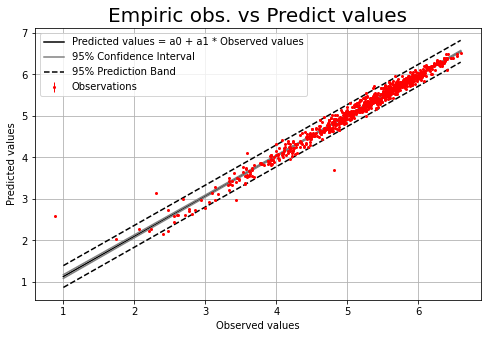

In [20]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y['LN_GS_cub_m']['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [21]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [22]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.348, median - 0.347, CI - [0.339-0.356]

SHAP-values for: DBH_cm: mean - 0.033, median - 0.03, CI - [0.024-0.041]

SHAP-values for: H_m: mean - 0.346, median - 0.345, CI - [0.327-0.367]

SHAP-values for: Origin_ID: mean - 0.009, median - 0.009, CI - [0.007-0.011]

SHAP-values for: Species_ID: mean - 0.019, median - 0.019, CI - [0.016-0.022]



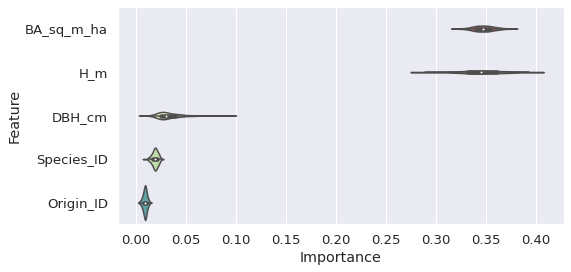

In [24]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [25]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [48]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 113.35, median: 111.5,
 pred. interval (P(0.025)-P(0.975)): 46.0-177.0, 
 conf. interval (p-value=0.95): 68.94-163.915 
***
Aggregate bias statistic: 
 mean: 0.001, median: 0.001,
 pred. interval (P(0.025)-P(0.975)): -0.027-0.02, 
 conf. interval (p-value=0.95): -0.008-0.009 
***
Aggregate RMSE statistic: 
 mean: 0.133, median: 0.122, pred. interval (P(0.025)-P(0.975)): 0.097-0.191, 
 conf. interval (p-value=0.95): 0.108-0.17 
***
Aggregate MSE statistic: 
 mean: 0.019, median: 0.015, pred. interval (P(0.025)-P(0.975)): 0.009-0.036, 
 conf. interval (p-value=0.95): 0.012-0.029 
***
Aggregate R^2 statistic: 
 mean: 0.974, median: 0.979, pred. interval (P(0.025)-P(0.975)): 0.953-0.987, 
 conf. interval (p-value=0.95): 0.962-0.983 
***
Aggregate bias(%) statistic: 
 mean: 0.011, median: 0.001, pred. interval (P(0.025)-P(0.975)): -0.526-0.384, 
 conf. interval (p-value=0.95): -0.161-0.1

# ***Creating final XGBoost model using all obs. for its training***

In [27]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [28]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [29]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.17393
[1]	validation_0-rmse:3.67691
[2]	validation_0-rmse:3.23614
[3]	validation_0-rmse:2.85061
[4]	validation_0-rmse:2.51049
[5]	validation_0-rmse:2.21099
[6]	validation_0-rmse:1.95006
[7]	validation_0-rmse:1.72010


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51612
[9]	validation_0-rmse:1.33900
[10]	validation_0-rmse:1.18151
[11]	validation_0-rmse:1.04287
[12]	validation_0-rmse:0.92149
[13]	validation_0-rmse:0.81433
[14]	validation_0-rmse:0.72112
[15]	validation_0-rmse:0.63856
[16]	validation_0-rmse:0.56581
[17]	validation_0-rmse:0.50315
[18]	validation_0-rmse:0.44747
[19]	validation_0-rmse:0.39785
[20]	validation_0-rmse:0.35576
[21]	validation_0-rmse:0.31870
[22]	validation_0-rmse:0.28684
[23]	validation_0-rmse:0.25930
[24]	validation_0-rmse:0.23492
[25]	validation_0-rmse:0.21412
[26]	validation_0-rmse:0.19633
[27]	validation_0-rmse:0.18053
[28]	validation_0-rmse:0.16721
[29]	validation_0-rmse:0.15633
[30]	validation_0-rmse:0.14713
[31]	validation_0-rmse:0.14000
[32]	validation_0-rmse:0.13305
[33]	validation_0-rmse:0.12768
[34]	validation_0-rmse:0.12280
[35]	validation_0-rmse:0.11894
[36]	validation_0-rmse:0.11599
[37]	validation_0-rmse:0.11309
[38]	validation_0-rmse:0.11062
[39]	validation_0-rmse:0.10862
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [30]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 177


In [31]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

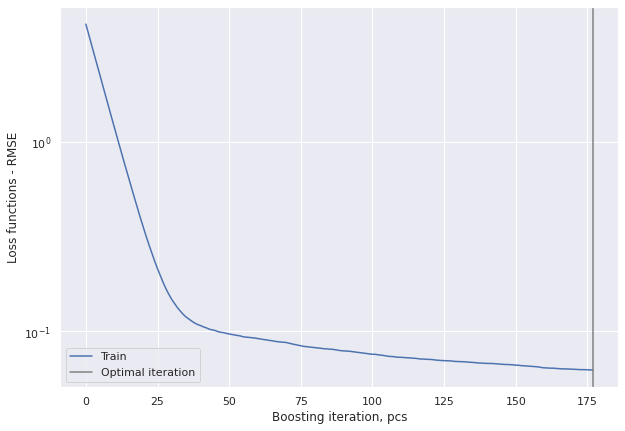

In [32]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [33]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.01
RMSE: 0.1
Relative RMSE(%):  1.210
MSE: 0.0
R square: 99.4%


In [34]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.994
Uncertainty
a0: 0.037+/-0.013
a1: 0.9929+/-0.0025


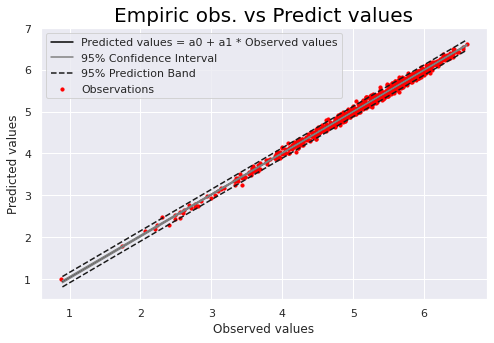

In [35]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

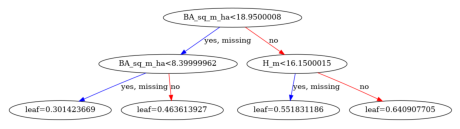

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

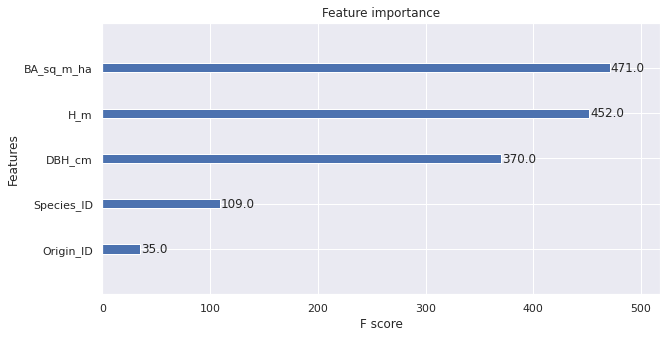

In [40]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

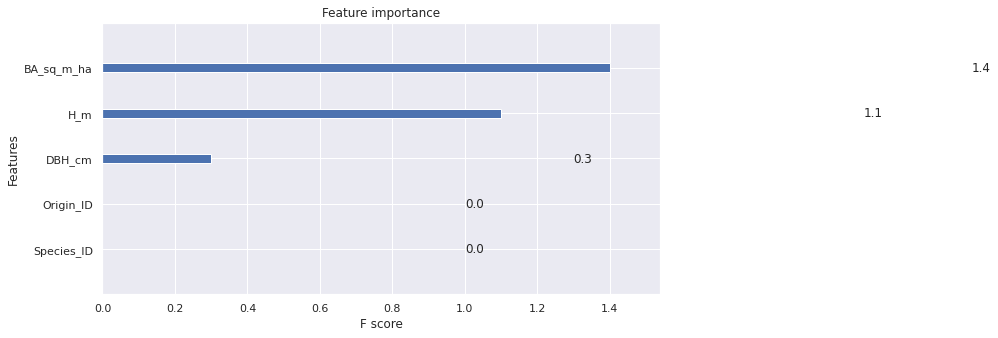

In [41]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

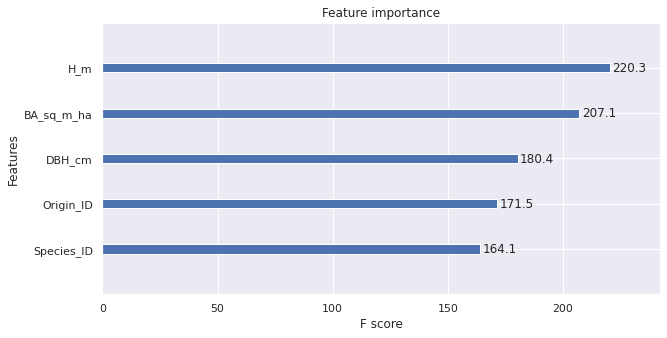

In [42]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


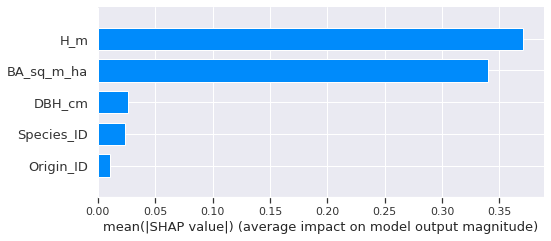

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

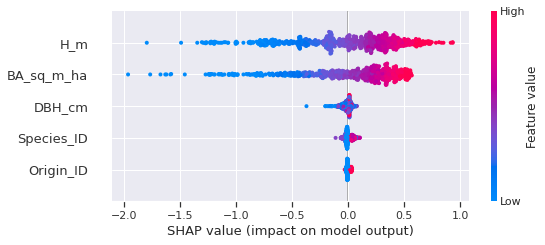

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

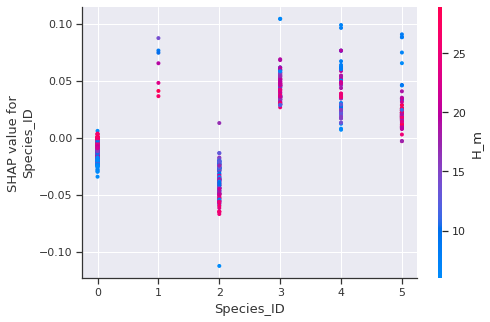

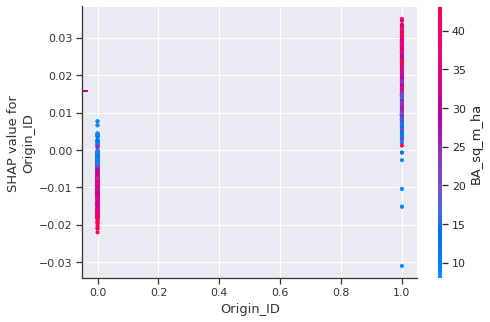

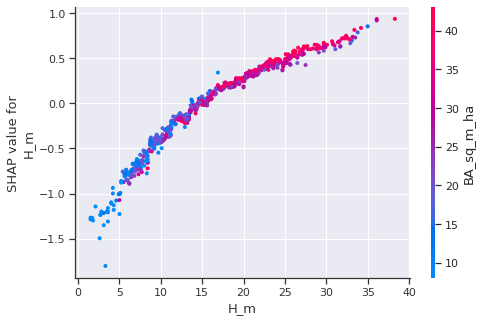

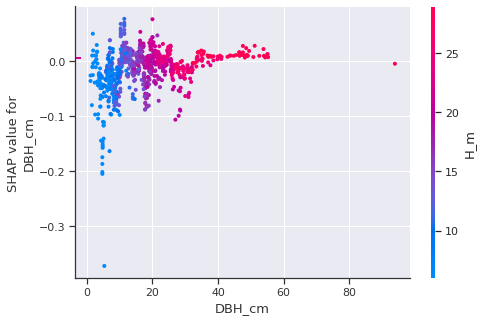

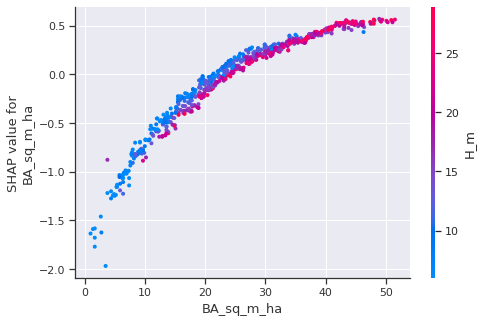

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.txt")